# Counterfeit Medicine Sales Prediction

**By:** Hedgar Ajakaiye, 
     **September 2019**  

## Introduction

Counterfeit medicines are fake medicines which are either contaminated or contain wrong or no active ingredient. They could have the right active ingredient but at the wrong dose. Counterfeit drugs are illegal and are harmful to health. `10%` of the world's medicine is counterfeit and the problem is even worse in developing countries. Up to `30%` of medicines in developing countries are counterfeit.

Millions of pills, bottles and sachets of counterfeit and illegal medicines are being traded across the world. The World Health Organization (WHO) is working with International Criminal Police Organization (Interpol) to dislodge the criminal networks raking in billions of dollars from this cynical trade.

Despite all these efforts, counterfeit medicine selling rackets don’t seem to stop popping here and there. It has become a challenge to deploy resources to counter these; without spreading them too thin and eventually rendering them ineffective. Government has decided that they should focus on illegal operations of high networth first instead of trying to control all of them. In order to do that they have collected data which will help them to predict sales figures given an illegal operation's characteristics


## Formal Problem Statement

We would like to make example out a few of these counterfeiters but the challenge is what yardstick can we employ to determine the 'big fish(es)' that we can use as scape goat to send a strong message to these clandestine communities and equally serve as deterrent. After considering numerous features and attributes of these counterfeiters, we resolved to zero in on their sales figures. To this end we shall put to use the power of machine learning to scientifically predict current and future counterfeiters and stop them in their tracks for good!

We would train a model on  data we have collected secretly over the years on their operations. The data dictionary of the data is as follows:

                                                                                                                     | Variable                   |                  Description/ values                                  |             
 -----------------------------------------------------------------------------------------------------
| Medicine_ID                |Alphanumeric identification number;Norminal Integer                    |  
|Counterfeit_weight          |weighted percentage attached to each medicine;continuous               |     
|District_ID                 |District identification number; alphanumeric                           |     
|Active since                |year monitoring started;Integer                                        |     
|Medicine MRP                |Medicine price list;continuous                                         |       
|Medicine type               |the form of the medicine;categorical                                   |     
|Side effect level           |the severity of the side effect associated with the medicine,categoric |   
|Availability rating         |the rate at which the medicine is available,continuous                 |     
|Area type                   |the level of development of an area,                                   |     
|Area city type              |the rating of the city;categorical                                     |     
|Area district level         |the level of the area district;categorical                             |     
|Counterfeit sales           |value of sales,continuous                                              |   

                           





## Load Library, Packages, Modules

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import  r2_score
from sklearn.metrics import  mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline


In [9]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
#plt.rcParams.update({'font.size':25})

## Load Data

In [10]:
# change directory
# point to the directory that house the data
os.chdir("/Users/ajakaiye/Documents/data")

In [11]:
# read data into pandas
train_data = pd.read_csv('counterfeit_train.csv')
test_data = pd.read_csv('counterfeit_test.csv')

In [12]:
#shape of test and train data
train_data.shape, test_data.shape

((6818, 12), (1705, 11))

In [13]:
train_data.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
       'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level',
       'Counterfeit_Sales'],
      dtype='object')

In [14]:
# combine test and train data to ensure uniform preprocessing
# to combine test and train data successfully, the value of the columns of test and train data must equal
test_data['Counterfeit_Sales'] =np.nan
test_data['data'] = 'test'
train_data['data'] = 'train'
test_data = test_data[train_data.columns]
all_data = pd.concat([test_data, train_data], axis=0)



In [15]:
all_data.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium,NaN,test
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown,NaN,test
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown,NaN,test
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown,NaN,test
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small,NaN,test


In [16]:
#check the dimension
all_data.shape

(8523, 13)

In [17]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 6817
Data columns (total 13 columns):
Medicine_ID            8523 non-null object
Counterfeit_Weight     7060 non-null float64
DistArea_ID            8523 non-null object
Active_Since           8523 non-null int64
Medicine_MRP           8523 non-null float64
Medicine_Type          8523 non-null object
SidEffect_Level        8523 non-null object
Availability_rating    8523 non-null float64
Area_Type              8523 non-null object
Area_City_Type         8523 non-null object
Area_dist_level        8523 non-null object
Counterfeit_Sales      6818 non-null float64
data                   8523 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 932.2+ KB


In [18]:
#make the column names uniform
def clean_colname(name):
    name = name.strip().lower()
    return name
all_data = all_data.rename(columns= clean_colname)
all_data.head()

,medicine_id,counterfeit_weight,distarea_id,active_since,medicine_mrp,medicine_type,sideffect_level,availability_rating,area_type,area_city_type,area_dist_level,counterfeit_sales,data
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium,NaN,test
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown,NaN,test
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown,NaN,test
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown,NaN,test
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small,NaN,test


In [19]:
#check and treat missing value. This value should exlude the counterfeit sale column as the na there is intentional
all_data.isnull().mean() * 100

medicine_id             0.000000
counterfeit_weight     17.165317
distarea_id             0.000000
active_since            0.000000
medicine_mrp            0.000000
medicine_type           0.000000
sideffect_level         0.000000
availability_rating     0.000000
area_type               0.000000
area_city_type          0.000000
area_dist_level         0.000000
counterfeit_sales      20.004693
data                    0.000000
dtype: float64

In [20]:
# fill missing values in counterfeit_weight columns with the mean weight
# the counterfeit_weight column portion of the training data set and not the combined portion shall be used to calculate the mean
# all_data['counterfeit_weight'].mean() # 14.158
# all_data['counterfeit_weight'].fillna(14.158, inplace = True)
# print('current number of missing value ', all_data['counterfeit_weight'].isnull().sum())
filt = all_data['data'] == 'train'
all_data.loc[filt, 'counterfeit_weight'].mean() # 14.115
all_data['counterfeit_weight'].fillna(14.115, inplace= True)
print('Total number of missing values after treatment:', all_data['counterfeit_weight'].isnull().sum())




Total number of missing values after treatment: 0


In [21]:
# display descriptive stats
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
counterfeit_weight,8523.0,14.150325,4.226154,5.855,10.610000,14.115000,17.300000,22.650000
active_since,8523.0,1995.831867,8.371760,1983.000,1985.000000,1997.000000,2002.000000,2007.000000
medicine_mrp,8523.0,151.292782,62.275067,41.590,104.126500,153.312800,195.943700,277.188400
availability_rating,8523.0,0.079132,0.051598,0.013,0.039989,0.066931,0.107585,0.341391
counterfeit_sales,6818.0,2280.583480,1693.354404,146.290,933.265600,1902.670400,3207.638400,13199.964800


In [22]:
# columns with float type
cont_features = all_data.select_dtypes(include=['float64']).columns

In [23]:
#column with integer data type
integer_features = all_data.select_dtypes(include=['int64']).columns

In [24]:
#columns with categorical type. This does not include the 'data' which serves the purpose of a separator
all_data.select_dtypes(include=['object']).columns

Index(['medicine_id', 'distarea_id', 'medicine_type', 'sideffect_level',
       'area_type', 'area_city_type', 'area_dist_level', 'data'],
      dtype='object')

## Data Exploration

#### How many unique medicine type are present?

In [25]:
# Number of unique medicine type
train_data['Medicine_Type'].nunique()

16

#### which area type has the highest counterfeit drug?
Down Town, Area has the highest number of counterfeited drugs and medicine

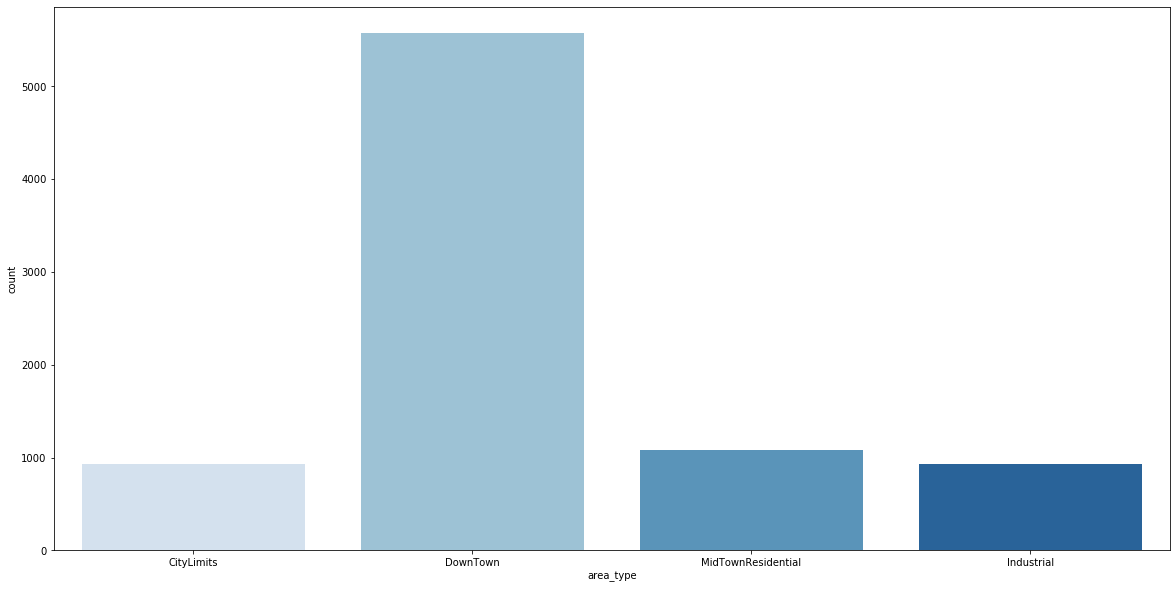

In [26]:
#which area type has the highest counterfeit drug

# train_data['Area_Type'].value_counts().plot(kind = 'bar')
# plt.xlabel('Area Type')
# plt.ylabel('count')
# plt.title('Counterfeit Drug Area Type Count');
sns.countplot(x ='area_type', data=all_data, palette='Blues');

### Which medicine type has the lowest count and their respective level of side effects?
Antiviral appears to be the least counterfeited medicine whereas Antibiotics are the third most counterfeited drug but with the most critical side effect level

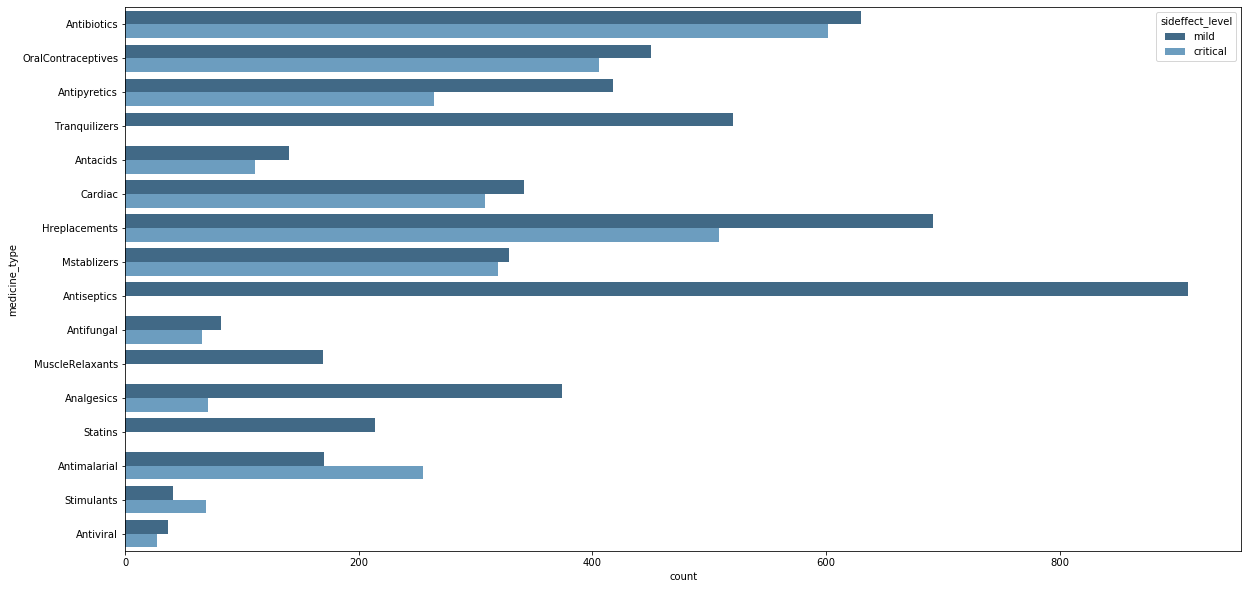

In [27]:
#which medicine type has the lowest count
#train_data['Medicine_Type'].value_counts(ascending=True)
sns.countplot(y='medicine_type', hue='sideffect_level', data=all_data, palette='Blues_d');

## How does the distribution of the counterfeit sale looks like
The distribution is not normal rather skewed to the right. This means that a handful of medicine have very high sales figures. This could also mean that there are alot of outliers in the counterfeit sale figure. lets check it out!

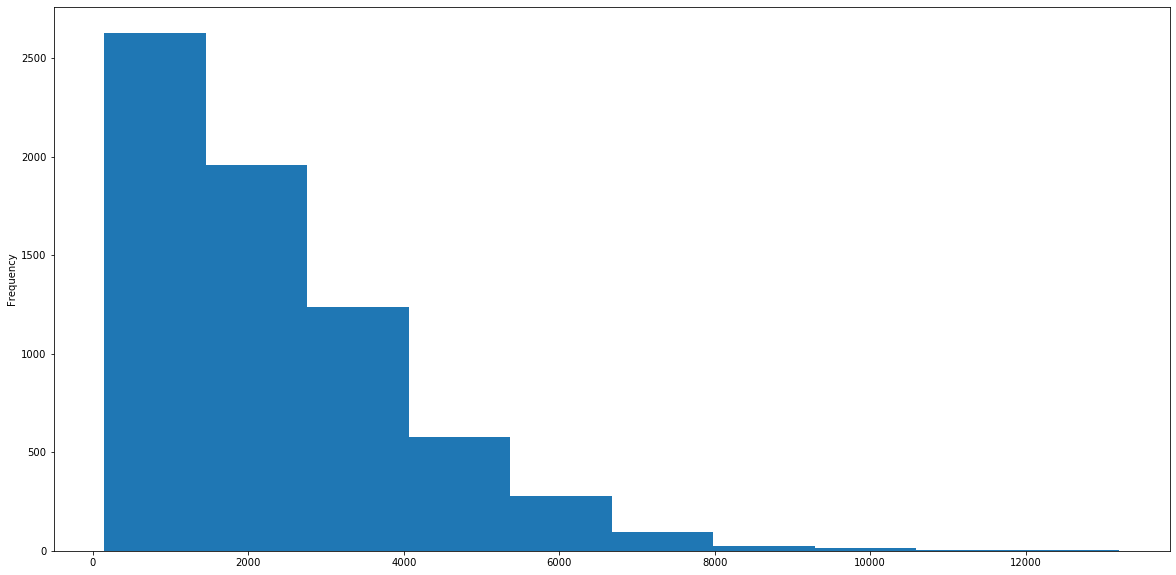

In [28]:
all_data['counterfeit_sales'].plot(kind = 'hist');

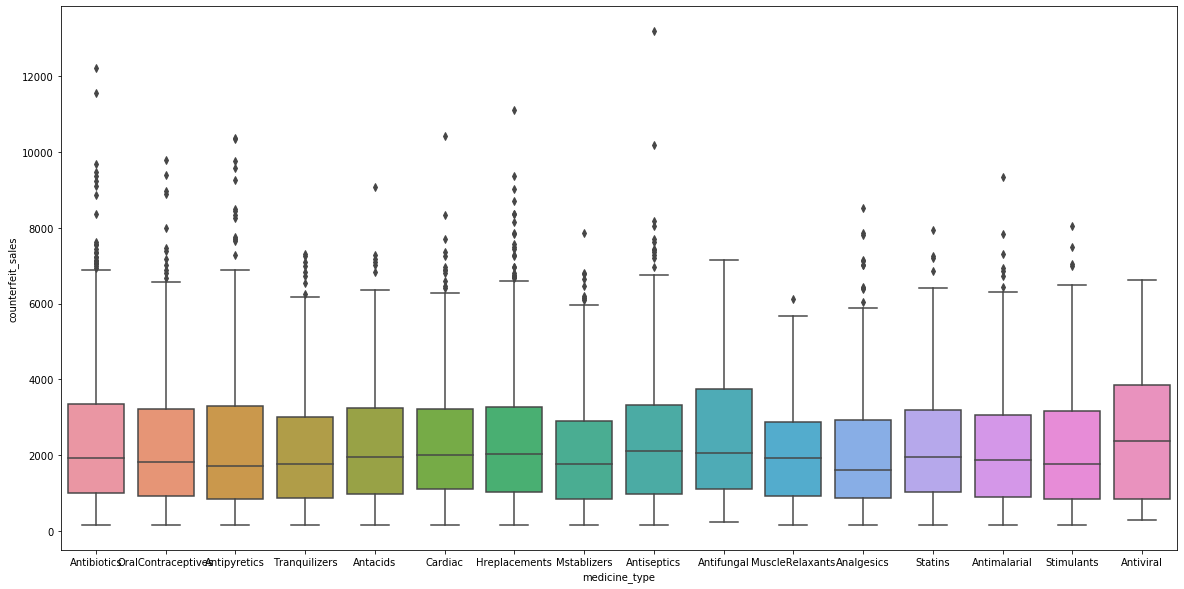

In [29]:
# checking the level of outlier of medicine type with respect to counterfeit sales
sns.boxplot(x = 'medicine_type', y = 'counterfeit_sales', data=all_data);

### What is the average sales figure of counterfeited medicine by medicine type
On average all the medicine type sale figure are above 2000 while **Antiviral** medicine type appears to command the highest average counterfeit sale. However this result should be taken with a pinch of salt until the outliers observed are treated appropriately!


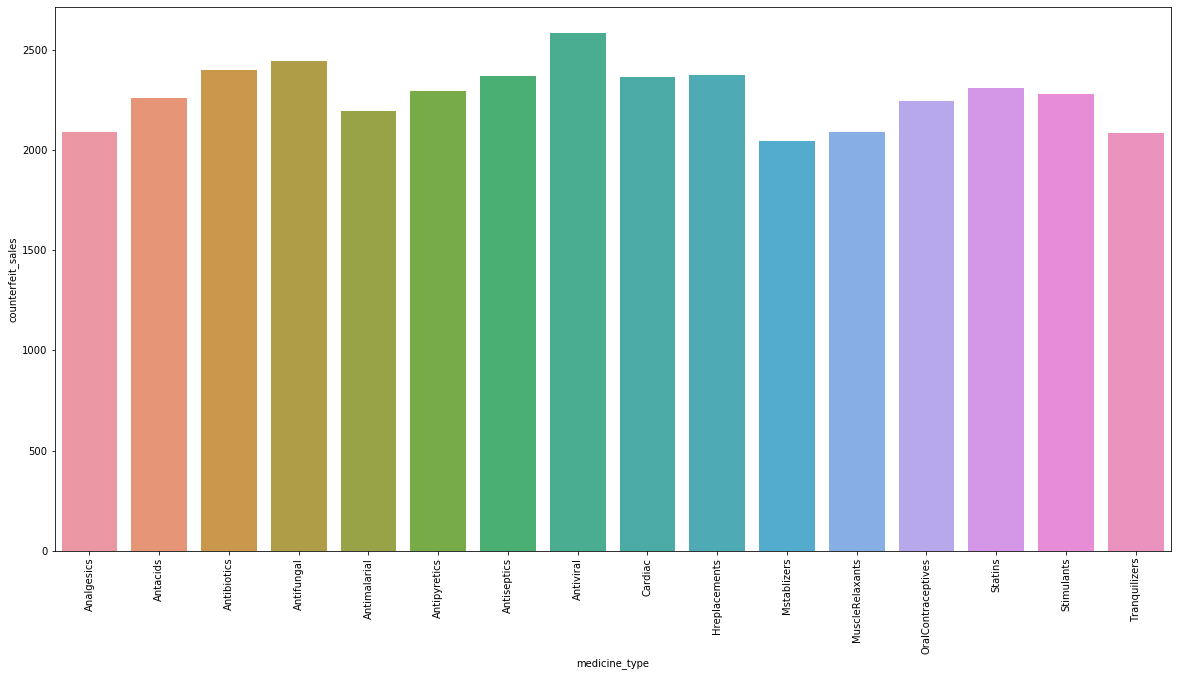

In [30]:
#average sales figure of counterfeited drugs 
filt = all_data['data'] == 'train'
adj_dat = all_data.loc[filt]
avg_sales = adj_dat.groupby('medicine_type').agg({'counterfeit_sales':'mean'}).reset_index()
sns.barplot(x = 'medicine_type', y='counterfeit_sales', data=avg_sales)
plt.xticks(rotation=90);


### Which medicine type has the highest counterfeit sales
While it appears that the **Antiviral** drug has the highest sales figure,this figure is suspect until the outliers observed are treated

In [31]:
filt = all_data['data'] == 'train'
highestsales = all_data.loc[filt]['counterfeit_sales']>= 13199.9648
print('The medicine with the highest sales figure is:',all_data.loc[filt]['medicine_type'][highestsales].values)

The medicine with the highest sales figure is: ['Antiseptics']


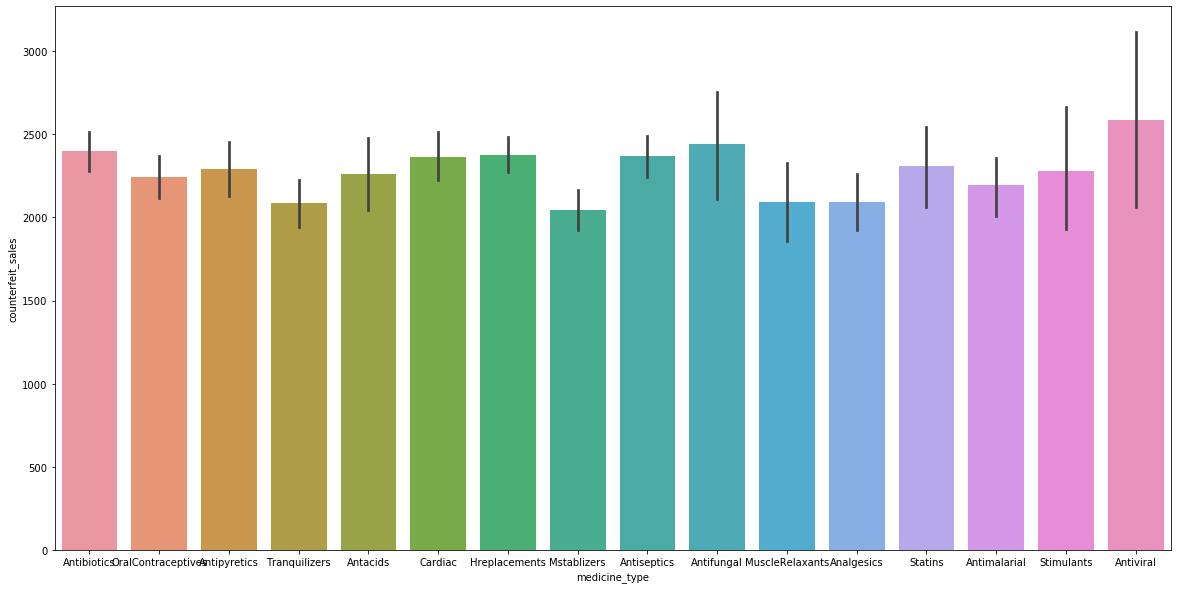

In [32]:
sns.barplot(x = 'medicine_type', y = 'counterfeit_sales', data=all_data);

In [33]:
all_data.columns

Index(['medicine_id', 'counterfeit_weight', 'distarea_id', 'active_since',
       'medicine_mrp', 'medicine_type', 'sideffect_level',
       'availability_rating', 'area_type', 'area_city_type', 'area_dist_level',
       'counterfeit_sales', 'data'],
      dtype='object')

### Data Preprocessing:Feature Engineering

In [34]:
# determine the period from the year since active till date
all_data['period_active'] =  2019 - all_data['active_since']

all_data = all_data.drop('active_since',1)
print('The number of columns after dropping the active_since column:',all_data.shape[1])


The number of columns after dropping the active_since column: 13


In [35]:
#check frequency of column
all_data['medicine_type'].value_counts()


Antibiotics           1232
Hreplacements         1200
Antiseptics            910
OralContraceptives     856
Antipyretics           682
Cardiac                649
Mstablizers            648
Tranquilizers          520
Analgesics             445
Antimalarial           425
Antacids               251
Statins                214
MuscleRelaxants        169
Antifungal             148
Stimulants             110
Antiviral               64
Name: medicine_type, dtype: int64

#### Treatment/transformation  of  categorical variable

In [36]:
# get dummy and drop Antiviral medicine for low frequency
medtypedummy = all_data['medicine_type'].str.get_dummies()


In [37]:
#add to the data frame accordingly
all_data = pd.concat([all_data, medtypedummy],1)
all_data = all_data.drop(['Antiviral','medicine_type'], 1)

In [38]:
all_data['area_type'].value_counts()

DownTown              5577
MidTownResidential    1083
CityLimits             935
Industrial             928
Name: area_type, dtype: int64

In [39]:
#create dummy of area_type
areatype_dummy = all_data['area_type'].str.get_dummies()


In [40]:
#drop industrial area type and add other area to data frame
all_data = pd.concat([all_data, areatype_dummy],1)
all_data = all_data.drop(['area_type', 'Industrial'],1)

In [41]:

pd.set_option('display.max_columns', 50)
all_data.head()

,medicine_id,counterfeit_weight,distarea_id,medicine_mrp,sideffect_level,availability_rating,area_city_type,area_dist_level,counterfeit_sales,data,period_active,Analgesics,Antacids,Antibiotics,Antifungal,Antimalarial,Antipyretics,Antiseptics,Cardiac,Hreplacements,Mstablizers,MuscleRelaxants,OralContraceptives,Statins,Stimulants,Tranquilizers,CityLimits,DownTown,MidTownResidential
0,HLZ81,14.115,Area027,85.5328,mild,0.112747,Tier 3,Medium,NaN,test,36,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,ECE94,13.450,Area045,257.1460,mild,0.144446,Tier 2,Unknown,NaN,test,19,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,SAD14,7.100,Area045,98.1172,mild,0.144221,Tier 2,Unknown,NaN,test,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,EQV63,18.300,Area010,135.3730,mild,0.100388,Tier 3,Unknown,NaN,test,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,AIR10,14.115,Area019,112.8016,mild,0.022585,Tier 1,Small,NaN,test,36,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [42]:
#create dummy for sideffect level columns of data frame
all_data['sideffect_level'].value_counts()

mild        5517
critical    3006
Name: sideffect_level, dtype: int64

In [43]:
#create dummy of sideffect column
all_data['sideffect_mc'] = np.where(all_data['sideffect_level'] == 'mild',1,0)
all_data = all_data.drop(['sideffect_level'], 1)

In [44]:
all_data['area_city_type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: area_city_type, dtype: int64

In [45]:
#create dummy for area city type
actype_dummy = all_data['area_city_type'].str.get_dummies()


In [46]:
#concat dummy with data frame and drop Tier one
all_data = pd.concat([all_data, actype_dummy],1)
all_data = all_data.drop(['Tier 1','area_city_type'], 1)

In [47]:
all_data['distarea_id'].value_counts()

Area027    935
Area013    932
Area035    930
Area046    930
Area049    930
Area045    929
Area018    928
Area017    926
Area010    555
Area019    528
Name: distarea_id, dtype: int64

In [48]:
# create dumy for district area id drop area019 and concatenate with data frame accordingly
distarea_dummy =  all_data['distarea_id'].str.get_dummies()


In [49]:
all_data = pd.concat([all_data, distarea_dummy],1)
all_data = all_data.drop(['Area019', 'distarea_id'],1)

In [50]:
all_data['area_dist_level'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: area_dist_level, dtype: int64

In [51]:
#create dummy of area distance level
ad_leve_dummy = all_data['area_dist_level'].str.get_dummies()


In [52]:


#concatenate dummy with data frame and drop high area distance
all_data = pd.concat([all_data, ad_leve_dummy],1)
all_data = all_data.drop(['High', 'area_dist_level'],1)

In [53]:

#dimemsion of combined data
all_data.shape

(8523, 40)

### Separate data into train and  test

In [54]:
#separate train data set from data frame and delete useless columns
counter_train = all_data[all_data['data'] == 'train']
del counter_train['data']


In [55]:
#separate test data from data frame and delete/drop useless columns
counter_test = all_data[all_data['data'] == 'test']
counter_test.drop(['data', 'counterfeit_sales'],axis = 1, inplace = True )



/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [56]:
#dimension of test and train data set
print('Our training data set has {} rows and {} columns'.format(counter_train.shape[0],counter_train.shape[1]))
print('Our testing data set has {} rows and {} columns'.format(counter_test.shape[0],counter_test.shape[1]))



Our training data set has 6818 rows and 39 columns
Our testing data set has 1705 rows and 38 columns


In [57]:
#check for missing values in test and train
print('Are there missing values in test data set:', counter_test.isnull().any().any())
print('Are there missing values in train data set:',counter_train.isnull().any().any())

Are there missing values in test data set: False
Are there missing values in train data set: False


### Feature Scaling and P.C.A
In order to train our data on many algorithm as possible and subsequently evaluate performance  we would create three copies of our training and test data set as follows:
* Training/testing data set that is scaled only
* Training/testing data set that is scaled and P.C.A applied with a cumulative explained ratio of at least 80%
* Training/testing data set free from the above operations

##### scaled Training and Test data set 

In [58]:
# before we proceed we would want to drop the medicine id from both data set as it does not have a predictive value
#we would also remove the target variable from the train set
sales_figures = counter_train[['counterfeit_sales']]
train_counter_w_o_spca = counter_train.drop(['medicine_id','counterfeit_sales'],axis =1)
test_counter_w_o_spca = counter_test.drop(['medicine_id'],axis =1)

In [59]:
train_counter_w_o_spca.head(2)

,counterfeit_weight,medicine_mrp,availability_rating,period_active,Analgesics,Antacids,Antibiotics,Antifungal,Antimalarial,Antipyretics,Antiseptics,Cardiac,Hreplacements,Mstablizers,MuscleRelaxants,OralContraceptives,Statins,Stimulants,Tranquilizers,CityLimits,DownTown,MidTownResidential,sideffect_mc,Tier 2,Tier 3,Area010,Area013,Area017,Area018,Area027,Area035,Area045,Area046,Area049,Medium,Small,Unknown
0,13.100,160.2366,0.070422,24,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,14.115,110.4384,0.013000,36,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [60]:
test_counter_w_o_spca.head(2)

,counterfeit_weight,medicine_mrp,availability_rating,period_active,Analgesics,Antacids,Antibiotics,Antifungal,Antimalarial,Antipyretics,Antiseptics,Cardiac,Hreplacements,Mstablizers,MuscleRelaxants,OralContraceptives,Statins,Stimulants,Tranquilizers,CityLimits,DownTown,MidTownResidential,sideffect_mc,Tier 2,Tier 3,Area010,Area013,Area017,Area018,Area027,Area035,Area045,Area046,Area049,Medium,Small,Unknown
0,14.115,85.5328,0.112747,36,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,13.450,257.1460,0.144446,19,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [61]:
sales_figures.head(2)

,counterfeit_sales
0,1775.5026
1,3069.1520


In [62]:
train_counter_w_o_spca.shape, test_counter_w_o_spca.shape

((6818, 37), (1705, 37))

In [63]:
#scaled train and test data frame
scaled_counter_train = pd.DataFrame(StandardScaler().fit_transform(train_counter_w_o_spca), columns=train_counter_w_o_spca.columns)
scaled_counter_test = pd.DataFrame(StandardScaler().fit_transform(test_counter_w_o_spca),columns=test_counter_w_o_spca.columns)

In [64]:
#lets have a peak of our scled data frame
scaled_counter_train.head()

,counterfeit_weight,medicine_mrp,availability_rating,period_active,Analgesics,Antacids,Antibiotics,Antifungal,Antimalarial,Antipyretics,Antiseptics,Cardiac,Hreplacements,Mstablizers,MuscleRelaxants,OralContraceptives,Statins,Stimulants,Tranquilizers,CityLimits,DownTown,MidTownResidential,sideffect_mc,Tier 2,Tier 3,Area010,Area013,Area017,Area018,Area027,Area035,Area045,Area046,Area049,Medium,Small,Unknown
0,-0.239789,0.142044,-0.170030,0.099938,-0.234715,-0.176509,-0.40727,-0.128646,4.371738,-0.292101,-0.344682,-0.287941,-0.408737,-0.285544,-0.144262,-0.336637,-0.158458,-0.118872,-0.256214,-0.347604,0.722174,-0.383205,-1.363781,-0.700428,-0.798600,-0.263292,-0.351303,-0.354195,-0.346012,-0.347604,-0.35104,-0.347869,2.846542,-0.348663,-0.690910,1.592579,-0.630183
1,-0.000011,-0.658577,-1.285498,1.533910,-0.234715,-0.176509,-0.40727,-0.128646,-0.228742,-0.292101,-0.344682,-0.287941,-0.408737,3.502084,-0.144262,-0.336637,-0.158458,-0.118872,-0.256214,2.876837,-1.384708,-0.383205,0.733255,-0.700428,1.252192,-0.263292,-0.351303,-0.354195,-0.346012,2.876837,-0.35104,-0.347869,-0.351303,-0.348663,1.447367,-0.627912,-0.630183
2,-1.202446,1.736475,-0.357270,0.099938,-0.234715,-0.176509,-0.40727,-0.128646,-0.228742,-0.292101,-0.344682,3.472939,-0.408737,-0.285544,-0.144262,-0.336637,-0.158458,-0.118872,-0.256214,-0.347604,0.722174,-0.383205,0.733255,-0.700428,-0.798600,-0.263292,-0.351303,-0.354195,-0.346012,-0.347604,-0.35104,-0.347869,2.846542,-0.348663,-0.690910,1.592579,-0.630183
3,-0.546895,-0.826672,-0.264562,0.099938,-0.234715,-0.176509,-0.40727,-0.128646,-0.228742,-0.292101,-0.344682,-0.287941,-0.408737,-0.285544,-0.144262,2.970557,-0.158458,-0.118872,-0.256214,-0.347604,0.722174,-0.383205,0.733255,-0.700428,-0.798600,-0.263292,-0.351303,-0.354195,-0.346012,-0.347604,-0.35104,-0.347869,2.846542,-0.348663,-0.690910,1.592579,-0.630183
4,-0.000011,-1.526724,3.296290,1.533910,-0.234715,-0.176509,-0.40727,-0.128646,-0.228742,-0.292101,-0.344682,-0.287941,2.446560,-0.285544,-0.144262,-0.336637,-0.158458,-0.118872,-0.256214,-0.347604,-1.384708,2.609569,-1.363781,-0.700428,-0.798600,-0.263292,-0.351303,-0.354195,-0.346012,-0.347604,-0.35104,-0.347869,-0.351303,-0.348663,-0.690910,1.592579,-0.630183


In [65]:
# the evidence of a scaled data set is that the mean must 0 and the stardard diviation must be 1
scaled_counter_train.describe().T

,count,mean,std,min,25%,50%,75%,max
counterfeit_weight,6818.0,-5.481747e-16,1.000073,-1.951311,-0.830377,-0.000011,0.752397,2.016253
medicine_mrp,6818.0,-8.233041e-17,1.000073,-1.762260,-0.753900,0.028846,0.719409,2.022317
availability_rating,6818.0,-3.074364e-16,1.000073,-1.285498,-0.759864,-0.237364,0.554070,5.093801
period_active,6818.0,-1.802932e-16,1.000073,-1.334034,-0.736546,-0.139058,1.294914,1.533910
Analgesics,6818.0,-3.855981e-17,1.000073,-0.234715,-0.234715,-0.234715,-0.234715,4.260479
Antacids,6818.0,-6.252943e-18,1.000073,-0.176509,-0.176509,-0.176509,-0.176509,5.665429
Antibiotics,6818.0,1.432966e-17,1.000073,-0.407270,-0.407270,-0.407270,-0.407270,2.455375
Antifungal,6818.0,-1.198481e-17,1.000073,-0.128646,-0.128646,-0.128646,-0.128646,7.773251
Antimalarial,6818.0,-4.872085e-17,1.000073,-0.228742,-0.228742,-0.228742,-0.228742,4.371738
Antipyretics,6818.0,-1.875883e-17,1.000073,-0.292101,-0.292101,-0.292101,-0.292101,3.423470


In [66]:
#pca and sclaed version of test and train set; Apply Principal Component Analysis, 
#a fancy name for reducing the number colums without loosing data. PCA uses scaled data only
pca = PCA(n_components=37)
pca_scaled_counter_test = pd.DataFrame(pca.fit_transform(scaled_counter_test), columns=scaled_counter_test.columns)
pca_scaled_counter_train = pd.DataFrame(pca.fit_transform(scaled_counter_train), columns=scaled_counter_train.columns)


In [67]:
#Let see the critical attributes of PCA: Explained Variance & Explained variance ratio
#expalined variance
pca.explained_variance_

array([4.62909965e+00, 2.69468786e+00, 2.50273279e+00, 2.04629901e+00,
       1.80330027e+00, 1.51225709e+00, 1.48483326e+00, 1.24130483e+00,
       1.19569542e+00, 1.16503110e+00, 1.14137367e+00, 1.11996342e+00,
       1.10427248e+00, 1.09911883e+00, 1.08591208e+00, 1.07923465e+00,
       1.06363119e+00, 1.04784011e+00, 1.03302307e+00, 1.02432398e+00,
       1.01882760e+00, 1.01612949e+00, 9.30410749e-01, 9.03332894e-01,
       8.60839639e-01, 6.05840014e-01, 5.88203011e-01, 7.90944370e-03,
       2.65613080e-30, 2.10488861e-30, 1.34364467e-30, 9.36321841e-31,
       6.82952828e-31, 4.97952544e-31, 1.95285746e-31, 7.60763518e-32,
       1.61270079e-32])

In [68]:
#explaned variance ratio
pca.explained_variance_ratio_

array([1.25092451e-01, 7.28187196e-02, 6.76315058e-02, 5.52972670e-02,
       4.87306966e-02, 4.08658186e-02, 4.01247428e-02, 3.35438586e-02,
       3.23113527e-02, 3.14827087e-02, 3.08434126e-02, 3.02648419e-02,
       2.98408249e-02, 2.97015573e-02, 2.93446706e-02, 2.91642259e-02,
       2.87425727e-02, 2.83158493e-02, 2.79154474e-02, 2.76803714e-02,
       2.75318424e-02, 2.74589312e-02, 2.51425483e-02, 2.44108217e-02,
       2.32625238e-02, 1.63716528e-02, 1.58950470e-02, 2.13737395e-04,
       7.17767897e-32, 5.68805374e-32, 3.63093944e-32, 2.53022840e-32,
       1.84554773e-32, 1.34562029e-32, 5.27721902e-33, 2.05581605e-33,
       4.35801149e-34])

#### P.C.A  Variance Report

In [69]:
#To make sense of of this bunch of numbers we would create a data frame that depict the cummulated explained variance ratio
data = {'Variance': pca.explained_variance_, '%Variance_ratio':pca.explained_variance_ratio_*100}
var_report = pd.DataFrame(data)
var_report['CumSum'] = var_report['%Variance_ratio'].cumsum()
print('Number of obervation n = {}'.format(pca.n_samples_))
var_report

Number of obervation n = 6818


,Variance,%Variance_ratio,CumSum
0,4.629100e+00,1.250925e+01,12.509245
1,2.694688e+00,7.281872e+00,19.791117
2,2.502733e+00,6.763151e+00,26.554268
3,2.046299e+00,5.529727e+00,32.083994
4,1.803300e+00,4.873070e+00,36.957064
5,1.512257e+00,4.086582e+00,41.043646
6,1.484833e+00,4.012474e+00,45.056120
7,1.241305e+00,3.354386e+00,48.410506
8,1.195695e+00,3.231135e+00,51.641641
9,1.165031e+00,3.148271e+00,54.789912


#### decision time:how many component should we settle for?
from the scree diagram, we may settle for 26 components with 99% of  


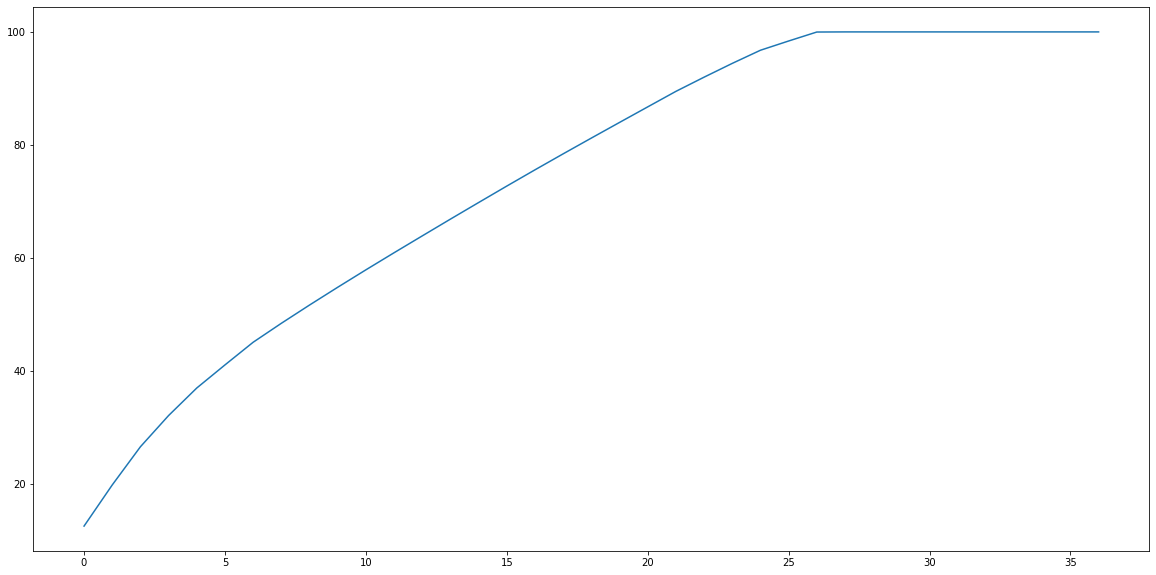

In [70]:
plt.plot(var_report['CumSum']);

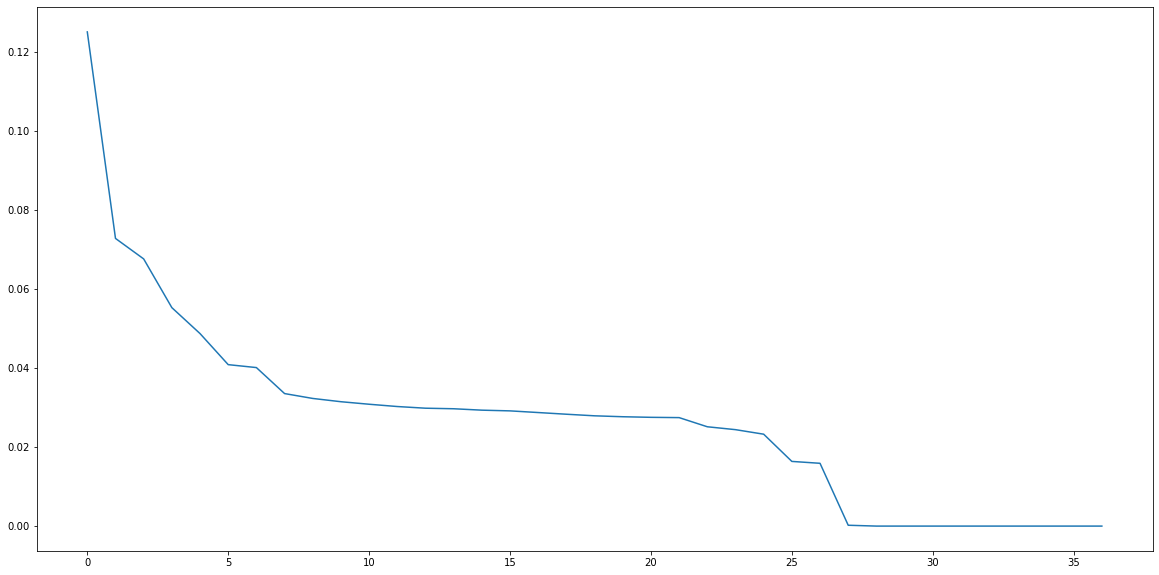

In [71]:
# let see it from another perspective
plt.plot(pca.explained_variance_ratio_)

In [72]:
#keep 26 components
pca_scaled_train = pca_scaled_counter_train.iloc[:,0:27]
pca_scaled_test = pca_scaled_counter_test.iloc[:,0:27]

In [73]:
pca_scaled_test.shape, pca_scaled_train.shape

((1705, 27), (6818, 27))

### Some exploration of train data set after standardizing data

IndexError: index 8 is out of bounds for axis 0 with size 8

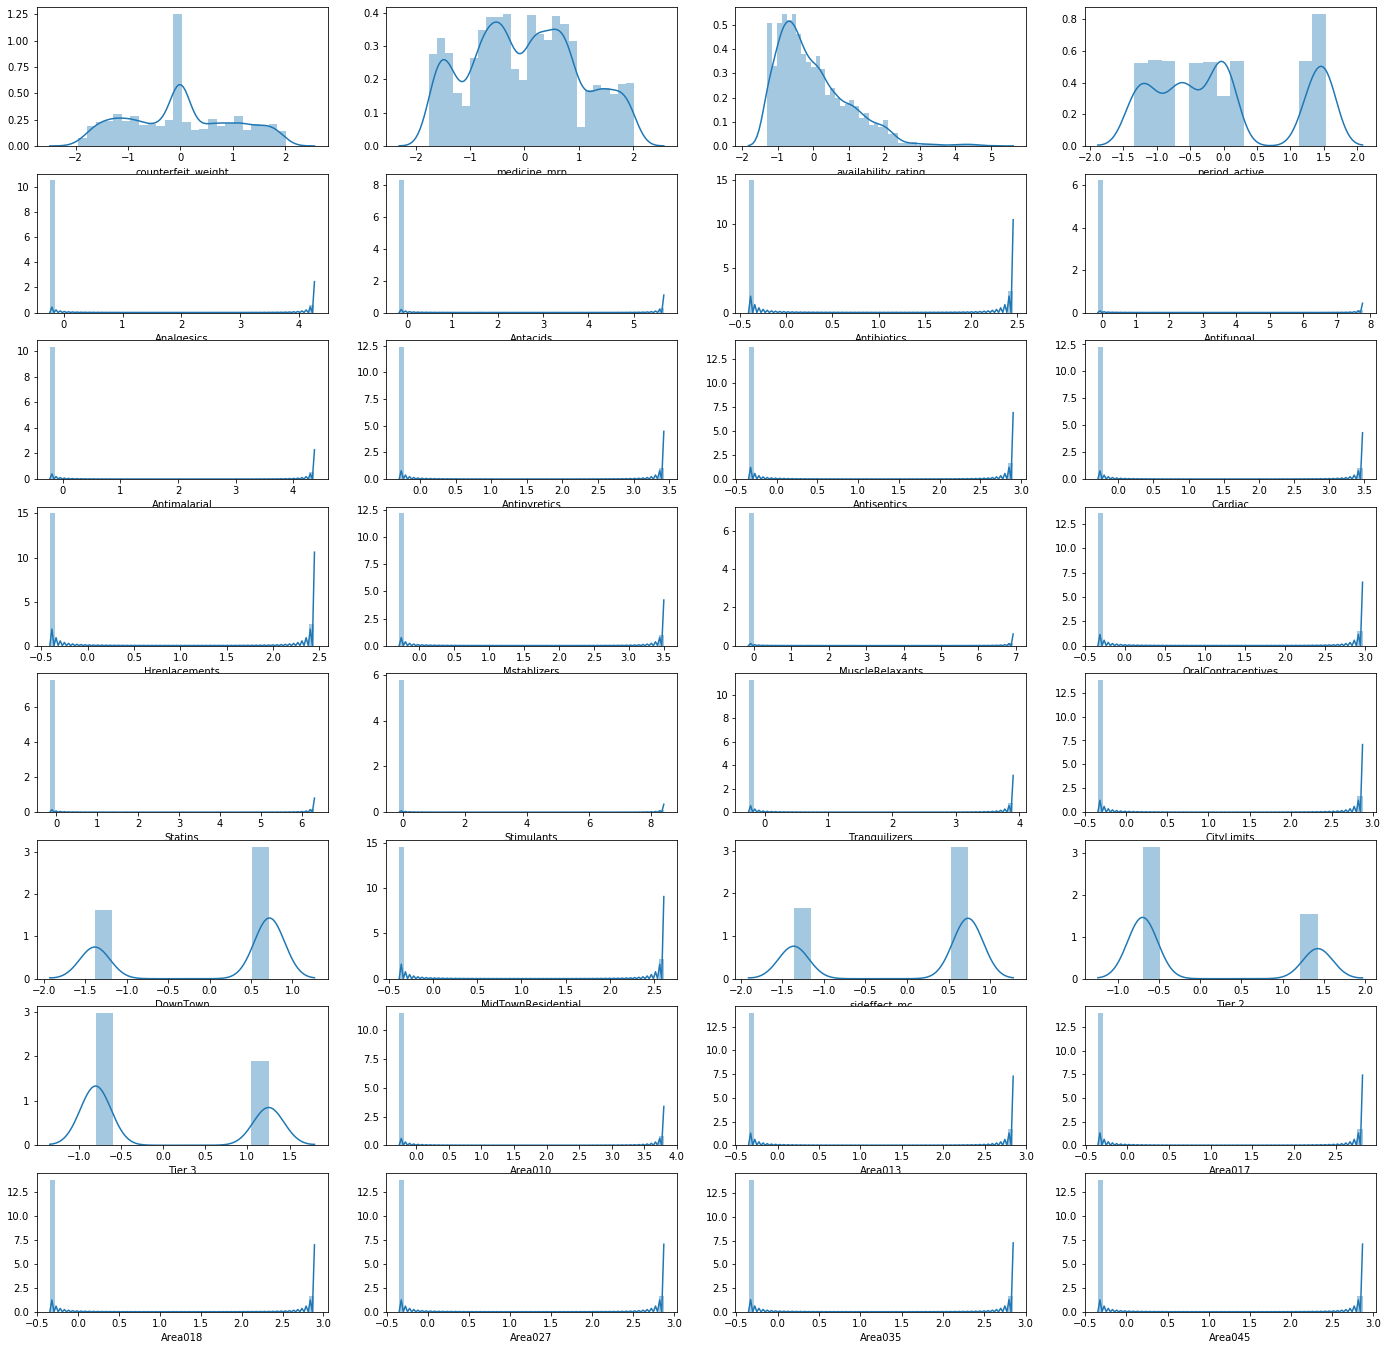

In [78]:
#Distribution of training data
fig, axs = plt.subplots(8, 4, figsize=(24,24))
for ix, col in enumerate(scaled_counter_train.columns):
    p0 = ix // 4
    p1 = ix % 4
    sns.distplot(scaled_counter_train[col], ax = axs[p0, p1])
    axs[p0, p1].set(xlabel=col)

IndexError: index 4 is out of bounds for axis 0 with size 4

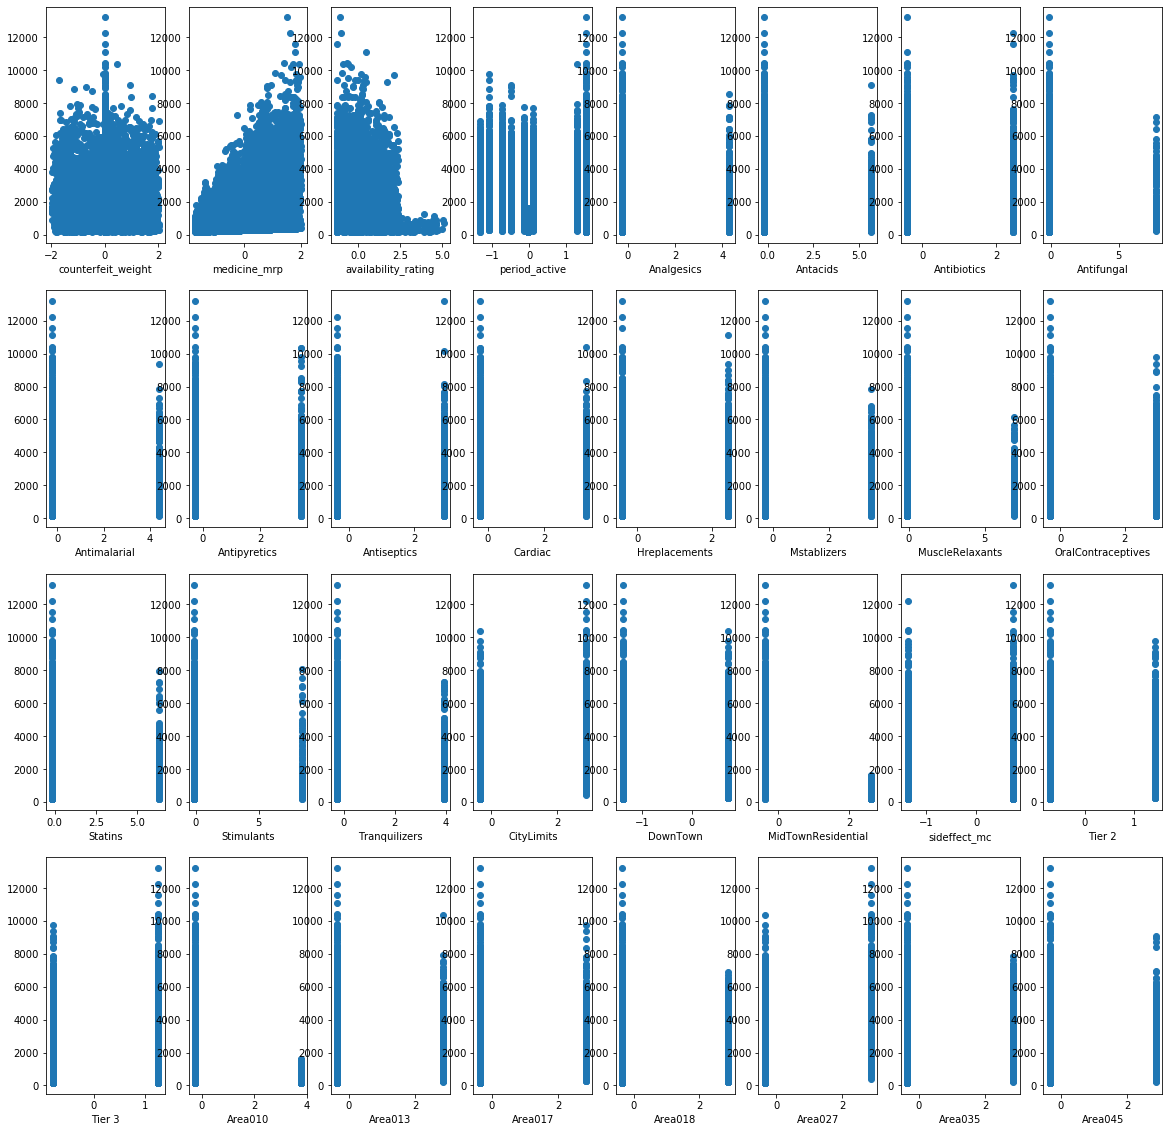

In [79]:
#features relationship with target: counterfeit sales figures
#
fig, axs = plt.subplots(4, 8, figsize=(20, 20))
for ix, feature in enumerate(scaled_counter_train.columns):
    p0 = ix // 8
    p1 = ix % 8
    axs[p0, p1].scatter(scaled_counter_train[feature], sales_figures)
    axs[p0, p1].set(xlabel=feature )


There is not much features relationship with the sales figure other than medicine_mrp which is somewhat positive. That is the rise in medicine mrp leads to increase in sales figures of counterfeit drugs. This should be further investigated

## Modeling
Under model building, we would adopt the iterative approach. We would build a basic model with a simple algorithm and evaluate performance therefrom accordingly. Then we would build a couple of 'out of the box models',evaluate the performance of these model and subsequently pick the two models with highest performance  metrics. We would then carryout hyper-parameter tuning of the two models to improve performance to satisfaction. This is further broken down below:

Basic  Model:
* Linear Regression

Out of the box model:
* Support Vector Machine
* Naive Bayes
* KN-Neighbor
* Decision Tree
* Random Forest

* Xgboost


#### Basic Model
**Linear Regression**
* Linear regression, simply put is about extracting a mathematical equation from the data,which explains how the variable of interest, in our current case, the counterfeit sales figure, is affected by other variables in the data.

Mathematical foundation
* Multiple Linear regression: 
$\displaystyle Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n$

$\displaystyle\beta_1 = \frac {\Sigma( x - \bar{x})(y - \bar{y})}{\Sigma( x  -\bar{x})^2}$ $\to$ $\displaystyle\beta_1 = 
\frac{\Sigma xy -\frac{\Sigma x\Sigma y}{n}}{\Sigma x^2 - \frac{(\Sigma x)^2}{n}}$  
$\beta_0 = \bar{y}-\beta_1\bar{x}$

The ultimate goal is to minimize the error : $\displaystyle\sum_{i = 0}^n(Y - \beta_0 - \beta_1 X)^2$

In [80]:
# we would be using a unique scoring metric which is 1-(mean absolute error/1660)
kf = KFold(n_splits=5, random_state=42, shuffle=True)
X = train_counter_w_o_spca.as_matrix()
Y = sales_figures.values.ravel()
X_test = test_counter_w_o_spca
model = LinearRegression()
scores = cross_val_score(model, X, Y, cv=kf, scoring= 'neg_mean_absolute_error')
print('MAE score - Linear Regression:', scores.mean())
print('Customise score(1-MAE/1660) - Linear Regression:',1-(scores/1660))


/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


MAE score - Linear Regression: -828.2347774265166
Customise score(1-MAE/1660) - Linear Regression: [1.50761815 1.50562401 1.48935551 1.49895664 1.49312876]


In [81]:
# manual cross validation procedure- with same Mean Absolute Error results
from sklearn.model_selection import KFold
counter = 0
for trainIdx, valIdx in KFold(n_splits = 5, random_state = 42, shuffle=True).split(X,Y):
    print('Running for fold:', counter)
    X_train, y_train, X_val, y_val = X[trainIdx, :], Y[trainIdx], X[valIdx, :], Y[valIdx]
    
    model = LinearRegression(fit_intercept=True, normalize=False)
    model.fit(X_train, y_train)
    predy_train = model.predict(X_train)
    mae = mean_absolute_error(y_train, predy_train)
    r2 = r2_score(y_train,predy_train)
    print('mae',mae)
    print('r2:', r2)
    predy_val = model.predict(X_val)
    mae_val = mean_absolute_error(y_val,predy_val)
    print('val mae:', mae_val.mean())
    print('val R2:', r2)
    
    counter += 1


Running for fold: 0
mae 820.0476642304728
r2: 0.5659752340926201
val mae: 842.6461308850078
val R2: 0.5659752340926201
Running for fold: 1
mae 820.7684249210408
r2: 0.5687383269423936
val mae: 839.3358544946492
val R2: 0.5687383269423936
Running for fold: 2
mae 828.5755935462258
r2: 0.567825716085963
val mae: 812.3301429658674
val R2: 0.567825716085963
Running for fold: 3
mae 824.1872371433382
r2: 0.5678206991361914
val mae: 828.2680236048674
val R2: 0.5678206991361914
Running for fold: 4
mae 828.3051400832718
r2: 0.5727339444338733
val mae: 818.5937351821915
val R2: 0.5727339444338733


### Out-of-the-box Models
As we earlier said we would build our model using the other versions of our data with five other algorithms and subsequently pick the two best in terms of performance for further tuning and processing.


In [82]:
scaled_train = scaled_counter_train.as_matrix()
pca_scaled_train = pca_scaled_counter_train.as_matrix()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [83]:
X_variants = [scaled_train, pca_scaled_train]
X_names = ['X with scaling only', 'X with pca']
for train_X, X_name in zip(X_variants, X_names):
    print('Data:', X_name)
    
    decision_tree = DecisionTreeRegressor()
    decision_tree_score = cross_val_score(decision_tree, train_X, Y, cv=kf, scoring='neg_mean_absolute_error')
    print('Mean MAE Score - Decision Trees:', decision_tree_score.mean())
    
    random_forest = RandomForestRegressor()
    random_forest_score = cross_val_score(random_forest, train_X, Y, cv=kf, scoring='neg_mean_absolute_error')
    print('Mean MAE Score - Random Forest:', random_forest_score.mean())
    
    #naive_bayes = GaussianNB()
    #naive_bayes_score = cross_val_score(naive_bayes, train_X, Y, cv=5, scoring='neg_mean_absolute_error')
    #print('Mean MEA Score- Naive Bayes:', naive_bayes_score.mean())
    
    knn = KNeighborsRegressor()
    knn_score = cross_val_score(knn, train_X, Y, cv=kf, scoring='neg_mean_absolute_error')
    print('Mean MAE Score - KNN:', knn_score.mean())

Data: X with scaling only
Mean MAE Score - Decision Trees: -1078.933182949527


/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.

Mean MAE Score - Random Forest: -816.8459309247326
Mean MAE Score - KNN: -899.3786646645725
Data: X with pca
Mean MAE Score - Decision Trees: -1098.1502844834472


/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.

Mean MAE Score - Random Forest: -834.1843942577182
Mean MAE Score - KNN: -899.3786646645725


### Evaluation
From the results above, since our metric is mean absolute error, the lower would be the better. To this end we can see that only Random Forest using the scaled version of our data has the lowest score which is an  improvement on our base model.

We would channel our effort to improve on these scores by fine tunning the hyper-parameters of the Linear regression and Random forest algorithms alternatively we may take a critical look at our features for possible re-engineering. We would have verified our performance on the test portion of the data if we had the target variable therein.Meanwhile we can rely on the performance from our validation portion of data through cross validation.

It is common knowledge that building models and applying algorithms is not a one size fit all scenario. This is the logic behind trying different model and the aim is really to see which model is better at this particular data at hand. To this end we would have to reconsider our earlier decision of picking two of the the best performing-in this case, the algorithm that reduces our Mean Absolute error the most- out of the bag models algorithms. From the result thus far we shall go ahead and fine tune the hyper-parameters of  the Linear regression and the Random Forest because the models built using these algorithms appears to produce results that are close to our objective of reducing the mean absolute error.


### Hyper-parameter tuning for Linear Regression and Random Forest

In [84]:
# Fine tune alpha hyper-parameter for linear regression
X_scale = scaled_counter_train.as_matrix()

best_alpha = None
best_mae = None
for alpha in [1e-6,1e-5,1e-4, 1e-3, 1e-2,1e-1, 1., 10., 1000.]:
    print('Training Linear model with L2 regularization for alpha=', alpha)
    counter = 0
    all_fold_mae = []
    
    for trainidx, validx in KFold(n_splits=5, random_state= 42).split(X_scale, Y):
        print('Running fold:', counter)
        X_train, y_train, X_val, y_val = X_scale[trainidx, :], Y[trainidx], X_scale[validx, :], Y[validx]
        
    
        #trainthe model
        model = Ridge(fit_intercept=True, normalize=False,alpha=alpha)
        model.fit(X_train, y_train)
    
        pred_train = model.predict(X_train)
    
        mae = mean_absolute_error(y_train, pred_train)
    
        pred_val = model.predict(X_val)
    
        mae = mean_absolute_error(y_val, pred_val)
        counter += 1
    
        all_fold_mae.append(mae)
    
        averagemae = np.mean(all_fold_mae)
        
        print('Avg CV mae', averagemae)
    
        if best_mae is None:
            best_alpha, best_mae = alpha, averagemae
        elif best_mae < averagemae:
            best_alpha, best_mae = alpha, averagemae
    
        print('Best alpha:', best_alpha)
        print('Best mae:', best_mae)
        
    
    



/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Training Linear model with L2 regularization for alpha= 1e-06
Running fold: 0
Avg CV mae 826.4929958329542
Best alpha: 1e-06
Best mae: 826.4929958329542
Running fold: 1
Avg CV mae 822.9175722613788
Best alpha: 1e-06
Best mae: 826.4929958329542
Running fold: 2
Avg CV mae 832.7902263817722
Best alpha: 1e-06
Best mae: 832.7902263817722
Running fold: 3
Avg CV mae 826.7539266459628
Best alpha: 1e-06
Best mae: 832.7902263817722
Running fold: 4
Avg CV mae 829.3504650111165
Best alpha: 1e-06
Best mae: 832.7902263817722
Training Linear model with L2 regularization for alpha= 1e-05
Running fold: 0
Avg CV mae 826.4929953615477
Best alpha: 1e-06
Best mae: 832.7902263817722
Running fold: 1
Avg CV mae 822.9175720578883
Best alpha: 1e-06
Best mae: 832.7902263817722
Running fold: 2
Avg CV mae 832.7902262389953
Best alpha: 1e-06
Best mae: 832.7902263817722
Running fold: 3
Avg CV mae 826.7539265180865
Best alpha: 1e-06
Best mae: 832.7902263817722
Running fold: 4
Avg CV mae 829.3504648634056
Best alpha: 

In [85]:
# hyper-parameter tunning for random forest
# check cross validation
foldmae = []
for trainIdx, ValidIdx in KFold(n_splits=10, random_state=42).split(X_scale, Y):
    X_train, y_train =  X_scale[trainIdx, :], Y[trainIdx]
    X_val, y_val =  X_scale[ValidIdx, :], Y[ValidIdx]
    
    model = RandomForestRegressor(n_estimators=100)

    #on train set
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    mean_abso = mean_absolute_error(y_train, pred_train)
    
    #on valid. set
    pred_val = model.predict(X_val)
    
    mean_abso = mean_absolute_error(y_val, pred_val)
    
    foldmae.append(mean_abso)
    print('val MAE:',mean_absolute_error(y_val, pred_val))
    print('Train MAE:',mean_absolute_error(y_train, pred_train))
    print('Mean MAE ---- Random Forest', np.mean(foldmae))
    
    
    


val MAE: 725.6893152727273
Train MAE: 291.8480849367666
Mean MAE ---- Random Forest 725.6893152727273
val MAE: 823.1813061143695
Train MAE: 287.92465444328553
Mean MAE ---- Random Forest 774.4353106935484
val MAE: 778.4400147126102
Train MAE: 292.0461680322686
Mean MAE ---- Random Forest 775.7702120332357
val MAE: 754.0454151114368
Train MAE: 290.3391202004563
Mean MAE ---- Random Forest 770.339012802786
val MAE: 829.0836816891496
Train MAE: 287.9931148725554
Mean MAE ---- Random Forest 782.0879465800588
val MAE: 760.9532170234604
Train MAE: 291.192772154824
Mean MAE ---- Random Forest 778.5654916539589
val MAE: 766.3377232052786
Train MAE: 292.4015572284876
Mean MAE ---- Random Forest 776.8186675898618
val MAE: 786.5909784692082
Train MAE: 293.1427100332465
Mean MAE ---- Random Forest 778.04020644978
val MAE: 797.7747684552129
Train MAE: 290.5689578344468
Mean MAE ---- Random Forest 780.2329355614949
val MAE: 809.6999308311308
Train MAE: 290.5285042734235
Mean MAE ---- Random Forest 7

Interesting results but it's obvious that it has over-fitting written all over it as there are significant differences between the validation results and the train results. Would need to carry out hyper-parameter tunning to see whether our results would improve i.e reduce the MAE

In [86]:
#Let test the result with the test data set before carrying out the hyper-parameter tuning 
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_scale, Y)
pred_test = rf_model.predict(scaled_counter_test)
pd.DataFrame(pred_test).to_csv('test_sub.csv',index=False) #0.507-(1-MAE/1660);goal >= 0.6

In [87]:
# Random forest Hyper Parameters
num_estimator_list = [5,10,12,15, 20]
max_depth_list = [2, 3, 4, 5,6,7,8,9,10]
min_samples_split_list = [2, 10, 20, 30, 40, 50]
max_features_list = [0.3, 0.5, 0.7, 0.9,0.10,0.11,0.12,0.15]

In [88]:
import itertools

In [89]:
# get the length of the grid
len(list(itertools.product(num_estimator_list, max_depth_list, min_samples_split_list, max_features_list)))

2160

In [90]:
best_params = None
best_score = None

for n_estimators, max_depth, min_samples_split, max_features in itertools.product(num_estimator_list, max_depth_list, min_samples_split_list, max_features_list):
    print("Evaluation max_depth, min_samples_split, max_features:", n_estimators, max_depth, min_samples_split, max_features)
    fold_wise_scores = []
    
    for train_ind, valid_ind in KFold(n_splits=10, random_state= 42).split(X_scale, Y):
        X_train, y_train = X_scale[train_ind, :], Y[train_ind]
        valid_X, valid_y = X_scale[valid_ind, :], Y[valid_ind]
        
        model = RandomForestRegressor(n_estimators=n_estimators,
                                      max_depth=max_depth,
                                      min_samples_split=min_samples_split,
                                      max_features=max_features)
        model.fit(X_train,y_train)
        
        #on train:
        preddy_train = model.predict(X_train)
        print('Train MAE:', mean_absolute_error(y_train, preddy_train))
        
        #on validation set
        
        predy_val = model.predict(valid_X)
        print('Valid MAE:', mean_absolute_error(valid_y, predy_val))
        
        #use validation scores only
        fold_wise_scores.append(mean_absolute_error(valid_y, predy_val))
        avg_Mae_score = np.mean(fold_wise_scores)
        if best_score is None:
            best_score = avg_Mae_score
            best_params = {'num_estimator':n_estimators, 'max_depth': max_depth, 'min_samples_split':min_samples_split, 'max_features': max_features}
            print('best score and params found', best_score, best_params)
        elif best_score > avg_Mae_score:
            best_score = avg_Mae_score
            best_params = {'num_estimator':n_estimators, 'max_depth':max_depth, 'min_samples_split': min_samples_split, 'max_features': max_features}
            print('Best score and params found', best_score, best_params)

Evaluation max_depth, min_samples_split, max_features: 5 2 2 0.3
Train MAE: 1113.7930155566446
Valid MAE: 1122.3949008036889
best score and params found 1122.3949008036889 {'num_estimator': 5, 'max_depth': 2, 'min_samples_split': 2, 'max_features': 0.3}
Train MAE: 920.9255188216332
Valid MAE: 970.8982604389782
Best score and params found 1046.6465806213337 {'num_estimator': 5, 'max_depth': 2, 'min_samples_split': 2, 'max_features': 0.3}
Train MAE: 972.6869838867127
Valid MAE: 914.9454336923721
Best score and params found 1002.7461983116799 {'num_estimator': 5, 'max_depth': 2, 'min_samples_split': 2, 'max_features': 0.3}
Train MAE: 1017.189371633987
Valid MAE: 1038.2166901206292
Train MAE: 973.2282724895091
Valid MAE: 1005.6548363450675
Train MAE: 1050.0500553968368
Valid MAE: 1040.1271379951734
Train MAE: 1061.1607904697967
Valid MAE: 1082.282837213938
Train MAE: 1053.8405350915425
Valid MAE: 996.4042831141986
Train MAE: 948.295028401751
Valid MAE: 957.8763835591668
Train MAE: 1098.478

Train MAE: 946.3151436201283
Valid MAE: 988.393394988433
Train MAE: 900.9819510907954
Valid MAE: 935.7533359691433
Train MAE: 907.0594763724032
Valid MAE: 882.3699521971234
Train MAE: 900.6238642645699
Valid MAE: 858.8162910627282
Train MAE: 896.0578229461499
Valid MAE: 910.9357939314497
Train MAE: 915.4579208976713
Valid MAE: 909.2361083587189
Evaluation max_depth, min_samples_split, max_features: 5 2 10 0.1
Train MAE: 1163.0877932030469
Valid MAE: 1198.2713017106928
Train MAE: 1217.428789416293
Valid MAE: 1254.0689525726532
Train MAE: 1142.249890726008
Valid MAE: 1075.757602640431
Train MAE: 1251.383605611072
Valid MAE: 1269.3074944524399
Train MAE: 1135.9204928512772
Valid MAE: 1164.1055374145515
Train MAE: 1139.6561576411377
Valid MAE: 1136.9417003105566
Train MAE: 1194.6699349800376
Valid MAE: 1221.087532582955
Train MAE: 1217.3217393300467
Valid MAE: 1165.075952545484
Train MAE: 1177.2351992552442
Valid MAE: 1153.951144191163
Train MAE: 1135.7437910823462
Valid MAE: 1141.36665777

Train MAE: 1023.8330026113742
Valid MAE: 1020.8253621769428
Train MAE: 1003.9192200612144
Valid MAE: 1053.5881583108483
Train MAE: 1002.482240394248
Valid MAE: 950.4945068311907
Train MAE: 1092.4140599368159
Valid MAE: 1108.5103594150112
Train MAE: 1057.1294632428603
Valid MAE: 1110.0946690423425
Train MAE: 1031.0084726387556
Valid MAE: 1024.1786242058902
Train MAE: 947.8921748845033
Valid MAE: 961.9424464636121
Train MAE: 1004.2127644242333
Valid MAE: 955.2020600902462
Train MAE: 940.7956081733402
Valid MAE: 956.0095647017827
Train MAE: 1024.0667903811566
Valid MAE: 1016.5528776572376
Evaluation max_depth, min_samples_split, max_features: 5 2 30 0.5
Train MAE: 1075.190812308495
Valid MAE: 1067.1364552505045
Train MAE: 911.3645798742606
Valid MAE: 976.7865519922656
Train MAE: 988.1083675075303
Valid MAE: 950.429778640677
Train MAE: 933.7341275902274
Valid MAE: 936.3197536894811
Train MAE: 936.7964001043482
Valid MAE: 976.2794383764151
Train MAE: 946.8711069389007
Valid MAE: 956.4097792

Train MAE: 1170.8290972331563
Valid MAE: 1215.206513414438
Train MAE: 1116.52026661419
Valid MAE: 1116.6784713907446
Train MAE: 1243.8897062726153
Valid MAE: 1282.6059383008105
Train MAE: 1179.1923246683357
Valid MAE: 1142.4746018024862
Train MAE: 1207.2721280712021
Valid MAE: 1185.977504615566
Train MAE: 1181.0692378040287
Valid MAE: 1177.2133043615424
Evaluation max_depth, min_samples_split, max_features: 5 2 40 0.12
Train MAE: 1140.5007072468916
Valid MAE: 1156.4180856159849
Train MAE: 1199.227742163748
Valid MAE: 1237.775879729669
Train MAE: 1178.3589763845794
Valid MAE: 1104.4651326314108
Train MAE: 1024.929537225715
Valid MAE: 1039.2920424688218
Train MAE: 1189.3963846179893
Valid MAE: 1234.4567942960637
Train MAE: 1251.2147436407413
Valid MAE: 1238.2627911356178
Train MAE: 1125.6946253586632
Valid MAE: 1151.9584420107615
Train MAE: 1169.2469123466294
Valid MAE: 1130.2241752387233
Train MAE: 1204.860051038872
Valid MAE: 1188.1655685773917
Train MAE: 1123.4951671755477
Valid MAE: 

Train MAE: 901.5802476393915
Valid MAE: 921.9145415195568
Train MAE: 819.9421297142827
Valid MAE: 823.8543424295148
Evaluation max_depth, min_samples_split, max_features: 5 3 2 0.7
Train MAE: 807.7005343875912
Valid MAE: 786.3184575946332
Best score and params found 786.3184575946332 {'num_estimator': 5, 'max_depth': 3, 'min_samples_split': 2, 'max_features': 0.7}
Train MAE: 798.1414749568229
Valid MAE: 849.437147767488
Train MAE: 839.8593860151244
Valid MAE: 814.4794322631885
Train MAE: 807.466755373816
Valid MAE: 794.5342904980456
Train MAE: 798.9907510196549
Valid MAE: 844.3679192195523
Train MAE: 872.8014154852252
Valid MAE: 881.4314484496364
Train MAE: 812.3881806891405
Valid MAE: 791.4687333573518
Train MAE: 805.5549595475763
Valid MAE: 792.4379876367234
Train MAE: 819.7046218305252
Valid MAE: 834.1750694754148
Train MAE: 802.1477283938891
Valid MAE: 825.8405081011904
Evaluation max_depth, min_samples_split, max_features: 5 3 2 0.9
Train MAE: 805.5587360336134
Valid MAE: 786.5227

Train MAE: 1043.5606213119709
Valid MAE: 1050.7179253735846
Evaluation max_depth, min_samples_split, max_features: 5 3 10 0.15
Train MAE: 984.6607015913647
Valid MAE: 977.3926887526395
Train MAE: 1021.9622711982987
Valid MAE: 1040.2050186721976
Train MAE: 1144.956298537939
Valid MAE: 1082.0523045735472
Train MAE: 1059.085235021751
Valid MAE: 1081.8353077667964
Train MAE: 1055.970644253413
Valid MAE: 1112.5693993291375
Train MAE: 997.9818822047351
Valid MAE: 992.6339380392249
Train MAE: 1083.2061865435098
Valid MAE: 1104.102026344321
Train MAE: 1060.6357795239976
Valid MAE: 1023.4762691740514
Train MAE: 1093.2613131618853
Valid MAE: 1093.1594120173756
Train MAE: 1046.5198372966772
Valid MAE: 1065.5050080757921
Evaluation max_depth, min_samples_split, max_features: 5 3 20 0.3
Train MAE: 910.4609340219404
Valid MAE: 885.5665475212107
Train MAE: 833.1984428910138
Valid MAE: 872.340417215378
Train MAE: 898.4045104703807
Valid MAE: 867.0734864423564
Train MAE: 973.2755260176846
Valid MAE: 98

Train MAE: 801.5528987400825
Valid MAE: 786.596741188466
Train MAE: 815.9283051500768
Valid MAE: 782.4531608516966
Train MAE: 808.3926672363178
Valid MAE: 839.4477779115147
Train MAE: 798.5778011619375
Valid MAE: 810.9678287597962
Evaluation max_depth, min_samples_split, max_features: 5 3 30 0.1
Train MAE: 1068.0643005176864
Valid MAE: 1073.7960494469926
Train MAE: 1233.3356629991706
Valid MAE: 1263.3620379844438
Train MAE: 1065.519364213048
Valid MAE: 1001.5689456571225
Train MAE: 1196.037487558808
Valid MAE: 1214.856872417098
Train MAE: 1147.337782040061
Valid MAE: 1195.4628640977055
Train MAE: 1125.4018878561515
Valid MAE: 1135.0996769729943
Train MAE: 1111.3236710092401
Valid MAE: 1131.5623199038293
Train MAE: 1138.5856418510805
Valid MAE: 1098.938856140185
Train MAE: 1223.5300831276024
Valid MAE: 1204.814661727206
Train MAE: 1113.6625890813832
Valid MAE: 1109.4934432873822
Evaluation max_depth, min_samples_split, max_features: 5 3 30 0.11
Train MAE: 1048.142313910171
Valid MAE: 10

Train MAE: 1001.8204367427624
Valid MAE: 975.5192098703059
Train MAE: 895.0173802653729
Valid MAE: 907.5558889060364
Train MAE: 917.0164749913312
Valid MAE: 917.8816426225973
Evaluation max_depth, min_samples_split, max_features: 5 3 50 0.5
Train MAE: 918.8050754237577
Valid MAE: 911.6988197805891
Train MAE: 858.989652322621
Valid MAE: 911.2738153455277
Train MAE: 881.8525936517661
Valid MAE: 852.1871604345645
Train MAE: 836.8212981394777
Valid MAE: 838.2671269242438
Train MAE: 829.3249614615847
Valid MAE: 878.4092661879159
Train MAE: 821.8683318484792
Valid MAE: 842.2714565880887
Train MAE: 870.2981706857671
Valid MAE: 865.7059748486505
Train MAE: 839.9949998455909
Valid MAE: 813.7687638157332
Train MAE: 892.1801214881639
Valid MAE: 908.764133222934
Train MAE: 880.6472192234737
Valid MAE: 886.5106864269876
Evaluation max_depth, min_samples_split, max_features: 5 3 50 0.7
Train MAE: 825.2942267224303
Valid MAE: 796.1432734530471
Train MAE: 807.9871448255691
Valid MAE: 849.7677832587586

Train MAE: 1010.5861878142349
Valid MAE: 1045.510268499297
Train MAE: 1010.9122503451651
Valid MAE: 952.3445532670763
Train MAE: 990.6219153155565
Valid MAE: 1002.0540694473488
Train MAE: 933.9654451744574
Valid MAE: 986.3043783850827
Train MAE: 1093.1295520199214
Valid MAE: 1068.6635822759622
Train MAE: 1104.2352023958883
Valid MAE: 1138.6325300979227
Train MAE: 1027.810055093758
Valid MAE: 1001.4074194746087
Train MAE: 989.6721696663565
Valid MAE: 1003.1543201967386
Train MAE: 986.022292601453
Valid MAE: 987.2565427170252
Evaluation max_depth, min_samples_split, max_features: 5 4 2 0.12
Train MAE: 1044.3748154269797
Valid MAE: 1044.0859995647627
Train MAE: 1038.376458069714
Valid MAE: 1064.5709695915934
Train MAE: 957.1051368174504
Valid MAE: 913.3400770011713
Train MAE: 1021.3993031031798
Valid MAE: 1032.1194202827614
Train MAE: 895.1802245168707
Valid MAE: 973.8451975037633
Train MAE: 1005.9520884743425
Valid MAE: 993.4769801497879
Train MAE: 1053.6100448927684
Valid MAE: 1075.9973

Train MAE: 806.9340993804518
Valid MAE: 861.7491813656222
Train MAE: 786.3409600501726
Valid MAE: 788.1178014772955
Train MAE: 833.2131979387358
Valid MAE: 837.3305253008458
Train MAE: 808.0399546001921
Valid MAE: 800.5368051816212
Train MAE: 843.8309908982416
Valid MAE: 876.4470385143796
Train MAE: 792.6834687864882
Valid MAE: 805.5662053810067
Evaluation max_depth, min_samples_split, max_features: 5 4 20 0.7
Train MAE: 766.1026562830996
Valid MAE: 727.6361163193372
Train MAE: 754.0757347663615
Valid MAE: 789.598083183437
Train MAE: 760.4187512367209
Valid MAE: 752.0976533831221
Train MAE: 761.6321202067285
Valid MAE: 738.0339360166936
Train MAE: 784.9528543053558
Valid MAE: 839.8965813566591
Train MAE: 768.8392470032179
Valid MAE: 765.1421078477916
Train MAE: 765.4163052466992
Valid MAE: 772.7028804289012
Train MAE: 761.961406635935
Valid MAE: 756.0324324610499
Train MAE: 752.9535662437731
Valid MAE: 793.1943175873649
Train MAE: 767.8201906695319
Valid MAE: 783.2453135857567
Evaluati

Valid MAE: 1024.161578033182
Train MAE: 944.4834269214865
Valid MAE: 1013.3016959085985
Train MAE: 1133.4818469612562
Valid MAE: 1132.165048690655
Train MAE: 966.9702313591798
Valid MAE: 975.6261767105092
Train MAE: 1063.9979722376763
Valid MAE: 1027.2811186238255
Train MAE: 941.400661852985
Valid MAE: 950.5586658229354
Train MAE: 1013.3961118290383
Valid MAE: 1019.1131612234802
Evaluation max_depth, min_samples_split, max_features: 5 4 30 0.15
Train MAE: 948.8736550969779
Valid MAE: 943.6313696648954
Train MAE: 994.4193876531964
Valid MAE: 1040.713087292284
Train MAE: 919.3760855049126
Valid MAE: 881.5286714368862
Train MAE: 991.1243227401328
Valid MAE: 1014.7232376919183
Train MAE: 977.6125351807987
Valid MAE: 1040.4251858391867
Train MAE: 921.379012284859
Valid MAE: 932.7597742482516
Train MAE: 943.2347979121384
Valid MAE: 945.5654192223085
Train MAE: 952.0762790799939
Valid MAE: 925.250571354054
Train MAE: 947.2457444994766
Valid MAE: 977.5485093200742
Train MAE: 966.0919929145501


Train MAE: 756.9681766382386
Valid MAE: 748.2950701227779
Train MAE: 763.2628838086844
Valid MAE: 737.153864106244
Train MAE: 752.8707737290623
Valid MAE: 804.853231976371
Train MAE: 757.4449210471925
Valid MAE: 750.8455574934785
Train MAE: 763.1699720100655
Valid MAE: 765.4757266174473
Train MAE: 758.7983588259084
Valid MAE: 760.4543239930581
Train MAE: 753.9961648309437
Valid MAE: 792.2406763869806
Train MAE: 751.963195857313
Valid MAE: 779.8067467886817
Evaluation max_depth, min_samples_split, max_features: 5 4 50 0.1
Train MAE: 1097.7536675182753
Valid MAE: 1094.0479375929594
Train MAE: 1129.660618928513
Valid MAE: 1181.6831933166923
Train MAE: 1055.2783843311913
Valid MAE: 992.737681228164
Train MAE: 1062.9186093428805
Valid MAE: 1088.2242005503822
Train MAE: 1145.296910747212
Valid MAE: 1208.3508004135879
Train MAE: 1110.815896425492
Valid MAE: 1089.890149679029
Train MAE: 964.8626667173793
Valid MAE: 958.603544167754
Train MAE: 1084.2756579183224
Valid MAE: 1048.8787461498432
Tr

Train MAE: 839.5883191041466
Valid MAE: 898.0010813906315
Train MAE: 825.9002215521934
Valid MAE: 832.955268863182
Train MAE: 863.7437239701391
Valid MAE: 868.7238637774983
Train MAE: 789.6769263680575
Valid MAE: 781.7601845319086
Train MAE: 782.0235129360591
Valid MAE: 813.7457467943603
Train MAE: 815.853748552277
Valid MAE: 829.3255573871417
Evaluation max_depth, min_samples_split, max_features: 5 5 10 0.5
Train MAE: 752.2567449522277
Valid MAE: 722.2144749478307
Train MAE: 751.7192416302635
Valid MAE: 803.4308803133202
Train MAE: 756.8946200846898
Valid MAE: 757.5576039879534
Train MAE: 768.5843644223387
Valid MAE: 756.844601045261
Train MAE: 738.4359884858583
Valid MAE: 800.0023515968684
Train MAE: 748.4404995298569
Valid MAE: 761.000493693782
Train MAE: 754.0247610229981
Valid MAE: 767.41118010639
Train MAE: 756.3278330601797
Valid MAE: 760.2977085561093
Train MAE: 773.8646220987468
Valid MAE: 807.5951276124662
Train MAE: 762.0426835725511
Valid MAE: 803.7085355490312
Evaluation m

Train MAE: 980.6537805148773
Valid MAE: 996.77544107022
Train MAE: 1000.5206121360143
Valid MAE: 976.3805197224916
Train MAE: 945.2113044053922
Valid MAE: 964.8119061203812
Train MAE: 996.1143852582079
Valid MAE: 1012.4674342022778
Evaluation max_depth, min_samples_split, max_features: 5 5 20 0.12
Train MAE: 997.4942597533543
Valid MAE: 989.514661703435
Train MAE: 962.7651787190323
Valid MAE: 1000.7657143815368
Train MAE: 947.8462434422096
Valid MAE: 908.0046405083009
Train MAE: 888.1792621729738
Valid MAE: 893.2321846956481
Train MAE: 979.747024264087
Valid MAE: 1047.3676623173424
Train MAE: 957.7506297587258
Valid MAE: 949.1708328545908
Train MAE: 1006.3458731854168
Valid MAE: 1024.5878102535817
Train MAE: 1089.2161406945559
Valid MAE: 1061.559509986053
Train MAE: 974.8379845485578
Valid MAE: 989.2116874362781
Train MAE: 1073.7368717351771
Valid MAE: 1082.1702578481472
Evaluation max_depth, min_samples_split, max_features: 5 5 20 0.15
Train MAE: 971.4782343380963
Valid MAE: 964.69299

Train MAE: 747.0635185965461
Valid MAE: 746.899358728155
Train MAE: 762.7367577726412
Valid MAE: 769.7566415092807
Train MAE: 748.5156370814685
Valid MAE: 757.2931388542938
Train MAE: 740.2147536505677
Valid MAE: 779.2212013205155
Train MAE: 738.7008119008376
Valid MAE: 778.8465371515688
Evaluation max_depth, min_samples_split, max_features: 5 5 40 0.9
Train MAE: 741.8760708191128
Valid MAE: 706.3437581982348
Train MAE: 742.3096884394224
Valid MAE: 783.9353074406696
Train MAE: 741.0810606156754
Valid MAE: 743.0620683156692
Train MAE: 748.8065046880209
Valid MAE: 729.6419309151049
Train MAE: 733.3114394010597
Valid MAE: 789.7152354748557
Train MAE: 739.4519979036355
Valid MAE: 745.0144206792693
Train MAE: 738.8095210820517
Valid MAE: 742.9867278030999
Train MAE: 741.3117669312046
Valid MAE: 745.4109085118279
Train MAE: 738.0403496097936
Valid MAE: 783.6819951196588
Train MAE: 735.258582051421
Valid MAE: 766.3023652300822
Evaluation max_depth, min_samples_split, max_features: 5 5 40 0.1


Valid MAE: 915.892574932223
Train MAE: 888.6046080578458
Valid MAE: 854.0071882922947
Train MAE: 976.7633826046966
Valid MAE: 994.7734901514826
Train MAE: 916.791769353478
Valid MAE: 999.7943896825201
Train MAE: 852.0331526417349
Valid MAE: 870.4726233555617
Train MAE: 961.095451189156
Valid MAE: 964.522459457617
Train MAE: 919.456939010827
Valid MAE: 909.1936786989296
Train MAE: 1007.6879368953774
Valid MAE: 1009.8444186074805
Train MAE: 865.2849520578345
Valid MAE: 863.4313864136457
Evaluation max_depth, min_samples_split, max_features: 5 6 2 0.3
Train MAE: 778.1456665532181
Valid MAE: 765.6513161859613
Train MAE: 794.6957659544423
Valid MAE: 841.7705436410826
Train MAE: 773.3058938584834
Valid MAE: 781.4403077374895
Train MAE: 849.0838551289779
Valid MAE: 859.1621356037042
Train MAE: 788.6225959780659
Valid MAE: 850.4441524849652
Train MAE: 764.3630808021368
Valid MAE: 777.3544169137866
Train MAE: 791.3320941747467
Valid MAE: 800.3213662978332
Train MAE: 778.3948690310455
Valid MAE:

Train MAE: 997.7198172209021
Valid MAE: 1082.6329686640681
Train MAE: 1015.9484731591156
Valid MAE: 1014.7959642246552
Train MAE: 942.6142700217677
Valid MAE: 967.5640316563297
Train MAE: 953.7341710497284
Valid MAE: 944.9988806571884
Train MAE: 903.347079921539
Valid MAE: 924.0318061208513
Train MAE: 842.3653346647077
Valid MAE: 844.9618021407754
Evaluation max_depth, min_samples_split, max_features: 5 6 10 0.11
Train MAE: 957.0648533726322
Valid MAE: 940.6224247931594
Train MAE: 867.4709205791602
Valid MAE: 931.1171726051498
Train MAE: 866.2454623778125
Valid MAE: 852.0213471163484
Train MAE: 991.7302610221345
Valid MAE: 1026.7658530465337
Train MAE: 971.7352865549086
Valid MAE: 1067.666234990852
Train MAE: 980.5658478587262
Valid MAE: 974.5838407177974
Train MAE: 999.1918707207445
Valid MAE: 1027.995549259951
Train MAE: 1006.113031283268
Valid MAE: 993.6628466710974
Train MAE: 934.4623074409999
Valid MAE: 968.9035747347925
Train MAE: 991.8039401680162
Valid MAE: 1024.5820784344257
E

Valid MAE: 810.4212372948832
Train MAE: 737.670609806834
Valid MAE: 805.4491602717943
Train MAE: 741.1778388205819
Valid MAE: 763.4764839339778
Train MAE: 758.6005478212448
Valid MAE: 762.5725566380247
Train MAE: 743.99532963559
Valid MAE: 769.4007526578989
Train MAE: 746.7427974182876
Valid MAE: 791.7421694287272
Train MAE: 751.0886331530769
Valid MAE: 779.6555587123318
Evaluation max_depth, min_samples_split, max_features: 5 6 30 0.7
Train MAE: 733.8331465491838
Valid MAE: 707.218475971549
Train MAE: 736.3774515268345
Valid MAE: 784.0026465888895
Train MAE: 738.2385416519597
Valid MAE: 749.5843431326255
Train MAE: 733.2853748044163
Valid MAE: 722.2199336561821
Train MAE: 725.5124733784854
Valid MAE: 794.6605906029873
Train MAE: 729.7978559380817
Valid MAE: 762.1668511688704
Train MAE: 738.2926197711963
Valid MAE: 746.3340994226696
Train MAE: 730.9958115579421
Valid MAE: 745.1109826720929
Train MAE: 729.5881204722169
Valid MAE: 775.8913190605301
Train MAE: 725.2362171276574
Valid MAE:

Valid MAE: 889.8231808178467
Train MAE: 1000.1341848601136
Valid MAE: 1082.6777245733492
Train MAE: 937.0066485203611
Valid MAE: 917.6539527572166
Train MAE: 1015.863950709417
Valid MAE: 1043.543484986091
Train MAE: 994.1993578273264
Valid MAE: 977.2181089990072
Train MAE: 903.2300023613108
Valid MAE: 920.9284534792436
Train MAE: 964.1137260731872
Valid MAE: 977.6958763166925
Evaluation max_depth, min_samples_split, max_features: 5 6 40 0.15
Train MAE: 929.8692408958012
Valid MAE: 929.2959877986132
Train MAE: 851.3667281505703
Valid MAE: 910.2416262737412
Train MAE: 864.7955764408027
Valid MAE: 847.3317419249471
Train MAE: 868.2956572932627
Valid MAE: 876.2379572821079
Train MAE: 910.5120334120224
Valid MAE: 992.1603849836273
Train MAE: 915.5640271825323
Valid MAE: 921.1907171163417
Train MAE: 964.9211299982821
Valid MAE: 986.0848350920394
Train MAE: 893.2675152701173
Valid MAE: 889.0264393688664
Train MAE: 901.0133913001226
Valid MAE: 944.5131536297192
Train MAE: 944.5382225484443
Val

Valid MAE: 780.2461370185388
Train MAE: 714.0897389746018
Valid MAE: 746.495548864512
Train MAE: 715.6866568208735
Valid MAE: 733.1775153896841
Train MAE: 706.113963304636
Valid MAE: 790.7145218562828
Train MAE: 714.2693070061441
Valid MAE: 760.0864357107549
Train MAE: 714.8733560582283
Valid MAE: 739.41038834631
Train MAE: 710.4803405233046
Valid MAE: 747.8475785105111
Train MAE: 709.6427060368694
Valid MAE: 775.4139733335994
Train MAE: 705.4201898415644
Valid MAE: 766.5514760299516
Evaluation max_depth, min_samples_split, max_features: 5 7 2 0.1
Train MAE: 1012.5419713745486
Valid MAE: 1026.5043934854307
Train MAE: 890.1459615845091
Valid MAE: 977.2262854077204
Train MAE: 905.6476742653448
Valid MAE: 890.6992241191533
Train MAE: 932.4529259234848
Valid MAE: 969.8658923117375
Train MAE: 917.2041110770963
Valid MAE: 987.3291358916971
Train MAE: 946.479940727201
Valid MAE: 953.51262887387
Train MAE: 863.8104164077214
Valid MAE: 899.2105168588821
Train MAE: 923.2863302600601
Valid MAE: 9

Valid MAE: 801.3766837748431
Train MAE: 751.0489644510593
Valid MAE: 769.2025133686781
Train MAE: 751.2424327731798
Valid MAE: 843.10243265142
Train MAE: 750.8785627176167
Valid MAE: 789.6428347135127
Train MAE: 754.7046825450221
Valid MAE: 770.0765594351851
Train MAE: 749.908308242057
Valid MAE: 765.3812802295972
Train MAE: 758.9331194256629
Valid MAE: 811.5375275096395
Train MAE: 778.8665226595617
Valid MAE: 811.9027383939555
Evaluation max_depth, min_samples_split, max_features: 5 7 20 0.5
Train MAE: 728.7905852373169
Valid MAE: 710.5028464463921
Train MAE: 738.3236108414537
Valid MAE: 793.8795602387884
Train MAE: 722.6831048061855
Valid MAE: 745.1214315399517
Train MAE: 733.1867612338556
Valid MAE: 735.62170698181
Train MAE: 718.5361065528436
Valid MAE: 786.7860969823247
Train MAE: 726.782377496531
Valid MAE: 749.9746836558276
Train MAE: 722.2980217926615
Valid MAE: 749.4376618953426
Train MAE: 726.5829519137455
Valid MAE: 749.1319879346927
Train MAE: 722.7289761892218
Valid MAE: 7

Train MAE: 909.8676483025824
Valid MAE: 934.2771787807203
Train MAE: 993.4000697740192
Valid MAE: 1097.018344749431
Train MAE: 853.513753624041
Valid MAE: 853.5995053814436
Train MAE: 888.2110829446715
Valid MAE: 900.4795858940264
Train MAE: 830.5883487657015
Valid MAE: 831.2439989079146
Train MAE: 925.7000093974073
Valid MAE: 968.9796264634653
Train MAE: 831.3019909176551
Valid MAE: 859.3522471573465
Evaluation max_depth, min_samples_split, max_features: 5 7 30 0.12
Train MAE: 963.6126587506308
Valid MAE: 960.7212507632773
Train MAE: 891.7637048052452
Valid MAE: 937.3160507366761
Train MAE: 863.0533548737336
Valid MAE: 851.5201259192204
Train MAE: 882.9425062924734
Valid MAE: 899.8968452605311
Train MAE: 847.0680653657017
Valid MAE: 913.2760470390966
Train MAE: 896.7669016822668
Valid MAE: 894.5977575055356
Train MAE: 922.0773776555162
Valid MAE: 939.6773402340433
Train MAE: 898.7283126413975
Valid MAE: 899.7945053819775
Train MAE: 888.2575752229401
Valid MAE: 927.1261361065458
Train 

Train MAE: 724.3373841926876
Valid MAE: 748.7533928626016
Train MAE: 725.4005114526171
Valid MAE: 719.0654275215757
Train MAE: 715.9843775963312
Valid MAE: 793.2777549791209
Train MAE: 727.455052349601
Valid MAE: 753.3909554759032
Train MAE: 722.1799939834577
Valid MAE: 738.1957171077865
Train MAE: 722.1537349046638
Valid MAE: 752.9888490093288
Train MAE: 722.4233819710494
Valid MAE: 775.5325787341299
Train MAE: 721.860345041659
Valid MAE: 772.8466689022687
Evaluation max_depth, min_samples_split, max_features: 5 7 50 0.9
Train MAE: 726.307115300319
Valid MAE: 701.9403278728535
Train MAE: 718.7954507086613
Valid MAE: 781.9757148818032
Train MAE: 722.2526463403784
Valid MAE: 752.3903638935592
Train MAE: 725.141245731123
Valid MAE: 729.7109185413425
Train MAE: 714.4879439548763
Valid MAE: 794.036232926821
Train MAE: 726.2180511829182
Valid MAE: 754.4414066894014
Train MAE: 721.2586431421184
Valid MAE: 734.7807265210506
Train MAE: 721.7653306580771
Valid MAE: 750.1697512634197
Train MAE: 

Valid MAE: 836.1302490947006
Train MAE: 801.0716506265406
Valid MAE: 872.2615862526521
Train MAE: 790.965583254846
Valid MAE: 828.5379515076688
Train MAE: 840.3163579481088
Valid MAE: 889.5914521656905
Train MAE: 825.5837773340216
Valid MAE: 936.9595869250635
Train MAE: 781.7398153836505
Valid MAE: 823.7629527671832
Train MAE: 770.2184862166016
Valid MAE: 801.1755795244959
Train MAE: 814.5717686735928
Valid MAE: 845.8437269508055
Train MAE: 858.0190544702454
Valid MAE: 935.6446956033949
Train MAE: 757.1386240388574
Valid MAE: 816.6803800340946
Evaluation max_depth, min_samples_split, max_features: 5 8 10 0.3
Train MAE: 731.9169328191388
Valid MAE: 723.5040597589514
Train MAE: 719.7105634642013
Valid MAE: 805.3386932025285
Train MAE: 738.4825802258133
Valid MAE: 768.9327760648673
Train MAE: 746.5570424293921
Valid MAE: 771.4139193254432
Train MAE: 735.7878343093786
Valid MAE: 826.6885831254245
Train MAE: 781.4311484003074
Valid MAE: 809.9042057207635
Train MAE: 723.2488192804365
Valid M

Train MAE: 885.0359794217386
Valid MAE: 939.2270980652919
Train MAE: 871.6725681322437
Valid MAE: 850.5412689119867
Train MAE: 932.6589241391347
Valid MAE: 979.8782698855315
Train MAE: 884.4725820128928
Valid MAE: 977.7420744159707
Train MAE: 901.9130349075905
Valid MAE: 932.2278921338444
Train MAE: 907.1422934187714
Valid MAE: 939.9963682558893
Train MAE: 931.2251822283592
Valid MAE: 941.0368591111871
Train MAE: 847.5364553388806
Valid MAE: 882.8303669032349
Train MAE: 884.2801517664213
Valid MAE: 909.6414778982648
Evaluation max_depth, min_samples_split, max_features: 5 8 20 0.11
Train MAE: 871.0558965887755
Valid MAE: 884.7279746938528
Train MAE: 858.1948577713697
Valid MAE: 917.9958961275573
Train MAE: 944.5446646506662
Valid MAE: 915.3133670874485
Train MAE: 885.535732289137
Valid MAE: 924.4068605257405
Train MAE: 813.0422680974854
Valid MAE: 910.0044322060918
Train MAE: 889.9088747993701
Valid MAE: 887.0779774013885
Train MAE: 913.3865275539717
Valid MAE: 952.8277903186598
Train 

Train MAE: 726.5202095121389
Valid MAE: 706.0149087930698
Train MAE: 708.2988560943836
Valid MAE: 791.3100675531449
Train MAE: 715.1378073177206
Valid MAE: 749.5891773403222
Train MAE: 722.1801642342389
Valid MAE: 741.0407604677611
Train MAE: 715.0977974328541
Valid MAE: 811.0065304233182
Train MAE: 724.1521435223482
Valid MAE: 756.1148933145823
Train MAE: 726.6167375394632
Valid MAE: 756.9487328733418
Train MAE: 717.360052258141
Valid MAE: 745.0663084068104
Train MAE: 722.1571666456307
Valid MAE: 777.6185184380541
Train MAE: 717.4551016864692
Valid MAE: 773.01025948219
Evaluation max_depth, min_samples_split, max_features: 5 8 40 0.7
Train MAE: 715.0337266202623
Valid MAE: 705.7755310322854
Train MAE: 710.8767293242314
Valid MAE: 776.9442373185323
Train MAE: 712.0537702840548
Valid MAE: 755.6067372159557
Train MAE: 712.6671687005764
Valid MAE: 720.6465625943687
Train MAE: 705.3783655137518
Valid MAE: 806.2714321584539
Train MAE: 713.1545405543326
Valid MAE: 749.4749356826255
Train MAE

Train MAE: 970.3466697431148
Valid MAE: 1008.0983901648552
Train MAE: 894.6815259960554
Valid MAE: 936.5066694916635
Evaluation max_depth, min_samples_split, max_features: 5 8 50 0.12
Train MAE: 919.393329778896
Valid MAE: 904.0030090955995
Train MAE: 920.3358038756477
Valid MAE: 983.49177612312
Train MAE: 834.8680930704531
Valid MAE: 817.9361986476857
Train MAE: 864.7033697576529
Valid MAE: 877.2250458392099
Train MAE: 952.0947872295923
Valid MAE: 1057.1140398459916
Train MAE: 851.7750716838127
Valid MAE: 858.7160644690251
Train MAE: 911.4407685802954
Valid MAE: 946.935072245559
Train MAE: 923.5135642129788
Valid MAE: 937.4697406465124
Train MAE: 912.3394455590229
Valid MAE: 939.871005725341
Train MAE: 896.0825408054895
Valid MAE: 922.5207484362656
Evaluation max_depth, min_samples_split, max_features: 5 8 50 0.15
Train MAE: 794.0276858226666
Valid MAE: 783.503551042606
Train MAE: 853.239081296184
Valid MAE: 924.9398131013829
Train MAE: 849.7795112953637
Valid MAE: 820.8921954129195
T

Train MAE: 684.8491772143656
Valid MAE: 722.0186652612113
Train MAE: 676.2891412934205
Valid MAE: 798.4544275170852
Train MAE: 680.9237517000805
Valid MAE: 755.5596931003968
Train MAE: 684.9184214855132
Valid MAE: 752.4118213211759
Train MAE: 683.9953411598237
Valid MAE: 751.8724430755598
Train MAE: 680.6735710404497
Valid MAE: 794.4520816693946
Train MAE: 680.7239685594162
Valid MAE: 796.5161086349577
Evaluation max_depth, min_samples_split, max_features: 5 9 10 0.9
Train MAE: 683.41750141486
Valid MAE: 712.8382084712786
Train MAE: 671.8400202768524
Valid MAE: 786.5969855147833
Train MAE: 675.2444449261064
Valid MAE: 772.8176360296982
Train MAE: 684.4454736878353
Valid MAE: 745.7055580357802
Train MAE: 671.212076443005
Valid MAE: 810.7722234492387
Train MAE: 683.6522276004567
Valid MAE: 757.7979910899079
Train MAE: 684.6137164411986
Valid MAE: 733.5689753951223
Train MAE: 680.1697182161845
Valid MAE: 767.3031724426478
Train MAE: 679.9731555016771
Valid MAE: 775.6557290190171
Train MAE

Train MAE: 772.1674684105328
Valid MAE: 795.874119347825
Train MAE: 750.1079428681319
Valid MAE: 777.1394092723793
Train MAE: 812.4892320654163
Valid MAE: 881.0821009483824
Train MAE: 799.4227718102657
Valid MAE: 863.2532563195483
Evaluation max_depth, min_samples_split, max_features: 5 9 30 0.3
Train MAE: 728.7966872080929
Valid MAE: 728.3853347487524
Train MAE: 726.5899023345961
Valid MAE: 809.423829688756
Train MAE: 722.2215439558582
Valid MAE: 768.0355409759939
Train MAE: 733.5443639478516
Valid MAE: 754.1332108818602
Train MAE: 718.0402251346276
Valid MAE: 818.4310584861161
Train MAE: 749.2240417249421
Valid MAE: 789.7623940944952
Train MAE: 722.2678605809133
Valid MAE: 767.5863953144103
Train MAE: 721.5946796894692
Valid MAE: 751.2991097021003
Train MAE: 722.4521045829091
Valid MAE: 778.7540345137284
Train MAE: 739.186269577196
Valid MAE: 805.5910544318274
Evaluation max_depth, min_samples_split, max_features: 5 9 30 0.5
Train MAE: 709.6222646020294
Valid MAE: 712.9450530777688
T

Train MAE: 904.9319602972394
Valid MAE: 1003.3851141968235
Train MAE: 836.6874236547885
Valid MAE: 856.9201257716727
Train MAE: 874.4373556694917
Valid MAE: 890.0374359469591
Train MAE: 870.5878196565297
Valid MAE: 888.1222418894795
Train MAE: 853.2101096472569
Valid MAE: 897.5778695363049
Train MAE: 896.7947150702305
Valid MAE: 927.4031406035466
Evaluation max_depth, min_samples_split, max_features: 5 9 40 0.11
Train MAE: 897.8537881161409
Valid MAE: 918.1723058365973
Train MAE: 834.3098180197766
Valid MAE: 888.8152529039052
Train MAE: 840.4573750703994
Valid MAE: 836.3188527739792
Train MAE: 907.5355710431
Valid MAE: 936.3487319103939
Train MAE: 879.9743649393898
Valid MAE: 960.9971042048547
Train MAE: 965.1407475224402
Valid MAE: 952.2914861076562
Train MAE: 917.9478686086547
Valid MAE: 959.2363200830067
Train MAE: 908.0773782143178
Valid MAE: 921.4493938265329
Train MAE: 872.3210442878411
Valid MAE: 912.5043186957486
Train MAE: 900.2269188264045
Valid MAE: 935.7261707050116
Evaluat

Train MAE: 651.7391675097064
Valid MAE: 752.6182716853469
Train MAE: 662.0900894803406
Valid MAE: 741.3562406412133
Train MAE: 649.3606783167113
Valid MAE: 804.7083359984633
Train MAE: 664.548052418831
Valid MAE: 748.9721333769792
Train MAE: 652.3382636243936
Valid MAE: 751.9190092215972
Train MAE: 651.2778510285095
Valid MAE: 781.5514302551968
Train MAE: 655.2753338522544
Valid MAE: 805.6362866909585
Train MAE: 647.1736488498988
Valid MAE: 803.9390457469536
Evaluation max_depth, min_samples_split, max_features: 5 10 2 0.7
Train MAE: 647.8252496511362
Valid MAE: 713.6332869384602
Train MAE: 644.0707696643201
Valid MAE: 801.011765607294
Train MAE: 645.4143738063607
Valid MAE: 767.7201523572479
Train MAE: 654.3764295144633
Valid MAE: 734.6032445396576
Train MAE: 639.4651765355404
Valid MAE: 809.2753473288881
Train MAE: 647.6111284338551
Valid MAE: 759.3203939490435
Train MAE: 649.8373153338451
Valid MAE: 749.4777121827635
Train MAE: 641.6046136335643
Valid MAE: 764.5641606479351
Train MA

Train MAE: 773.8266088610437
Valid MAE: 814.9428177990253
Train MAE: 773.5360232232666
Valid MAE: 831.5679290479219
Train MAE: 777.1116071007656
Valid MAE: 896.5093301059429
Train MAE: 799.919660953712
Valid MAE: 851.8194187666288
Train MAE: 797.6931302983536
Valid MAE: 883.1446828394121
Train MAE: 811.9391030829562
Valid MAE: 862.5410200435656
Train MAE: 822.2870748027797
Valid MAE: 888.3173773173621
Train MAE: 832.3311437125103
Valid MAE: 925.8419816310809
Evaluation max_depth, min_samples_split, max_features: 5 10 10 0.15
Train MAE: 787.0753860791083
Valid MAE: 829.7835754416222
Train MAE: 735.0019678927018
Valid MAE: 854.8329386930873
Train MAE: 749.6119564396998
Valid MAE: 788.7437791111511
Train MAE: 758.3535964890544
Valid MAE: 802.8823633640243
Train MAE: 787.6434924510622
Valid MAE: 910.3310748711372
Train MAE: 791.6278167115363
Valid MAE: 834.8638887640022
Train MAE: 795.3041741590475
Valid MAE: 850.3888286642512
Train MAE: 855.5253437889912
Valid MAE: 889.1721805981684
Train

Train MAE: 679.4606546591368
Valid MAE: 790.8975827532466
Train MAE: 681.1452835181005
Valid MAE: 778.1865894474803
Train MAE: 682.6029049969369
Valid MAE: 737.8870935655654
Train MAE: 672.9985524713618
Valid MAE: 807.0531348028208
Train MAE: 684.7219768429877
Valid MAE: 757.650268079759
Train MAE: 678.4761216112009
Valid MAE: 769.8227062643871
Train MAE: 681.937574612434
Valid MAE: 761.983893673917
Train MAE: 679.8513962312079
Valid MAE: 779.0704289094651
Train MAE: 676.4751480545849
Valid MAE: 785.5706383579408
Evaluation max_depth, min_samples_split, max_features: 5 10 30 0.1
Train MAE: 866.8468522407908
Valid MAE: 887.759094735794
Train MAE: 877.9821424799619
Valid MAE: 940.0063378771762
Train MAE: 847.6835123698265
Valid MAE: 859.9859652514143
Train MAE: 924.0384218233656
Valid MAE: 985.9367623959167
Train MAE: 886.0442431580395
Valid MAE: 983.2546270837607
Train MAE: 834.4907646212026
Valid MAE: 855.5248818614776
Train MAE: 873.2859810472805
Valid MAE: 920.1095378284808
Train MAE

Train MAE: 801.8491314613698
Valid MAE: 851.5523788182389
Evaluation max_depth, min_samples_split, max_features: 5 10 50 0.3
Train MAE: 720.6565275834904
Valid MAE: 731.6448071121744
Train MAE: 714.585326722295
Valid MAE: 794.7149167275609
Train MAE: 717.1177230252702
Valid MAE: 769.871226872501
Train MAE: 728.8232037986752
Valid MAE: 749.990219823883
Train MAE: 754.4047216339618
Valid MAE: 860.5697422013642
Train MAE: 716.8448813090914
Valid MAE: 745.5096988838507
Train MAE: 722.3391375492125
Valid MAE: 775.6945184724188
Train MAE: 720.3513937155489
Valid MAE: 762.5000641056907
Train MAE: 717.7921050909005
Valid MAE: 788.982718834315
Train MAE: 720.6736901367631
Valid MAE: 786.0094748969436
Evaluation max_depth, min_samples_split, max_features: 5 10 50 0.5
Train MAE: 706.6152473419202
Valid MAE: 710.9921795111488
Train MAE: 707.0593997810623
Valid MAE: 779.3409486813481
Train MAE: 704.1862787199152
Valid MAE: 739.7702005862774
Train MAE: 709.8167081570592
Valid MAE: 734.2472989147404


Train MAE: 1119.5034280056989
Valid MAE: 1168.115872098527
Train MAE: 1251.8455914775402
Valid MAE: 1177.8609921043005
Train MAE: 1145.4428508909843
Valid MAE: 1157.040366355837
Train MAE: 1161.178062551913
Valid MAE: 1217.380545424895
Train MAE: 1137.252993038898
Valid MAE: 1133.5887105776958
Train MAE: 1198.5172075296975
Valid MAE: 1237.0925759325692
Train MAE: 1150.8558245882425
Valid MAE: 1112.286306638118
Train MAE: 1200.9454192974185
Valid MAE: 1174.0705258688595
Train MAE: 1203.941812913008
Valid MAE: 1198.2582564096208
Evaluation max_depth, min_samples_split, max_features: 10 2 2 0.12
Train MAE: 1137.9031869218236
Valid MAE: 1144.6249131483878
Train MAE: 1179.0157974035542
Valid MAE: 1226.3393465259796
Train MAE: 1160.43070946212
Valid MAE: 1095.753841824085
Train MAE: 1126.1548961445699
Valid MAE: 1150.1936098247024
Train MAE: 1216.8762352217768
Valid MAE: 1257.111217291389
Train MAE: 1148.2333156412083
Valid MAE: 1149.2281382264362
Train MAE: 1109.5149160961641
Valid MAE: 112

Train MAE: 964.8238177101333
Valid MAE: 962.8676211938991
Evaluation max_depth, min_samples_split, max_features: 10 2 20 0.7
Train MAE: 898.1233550479834
Valid MAE: 883.8289478393898
Train MAE: 936.0344255747445
Valid MAE: 981.5325671422192
Train MAE: 917.1919546532105
Valid MAE: 896.4491588623315
Train MAE: 899.1566562492573
Valid MAE: 887.0891283974519
Train MAE: 896.0982460690759
Valid MAE: 945.2843699342434
Train MAE: 920.0939146649629
Valid MAE: 933.6128108239765
Train MAE: 905.1551152286888
Valid MAE: 886.971541083525
Train MAE: 925.2626509539391
Valid MAE: 892.0043515951436
Train MAE: 894.6210660485423
Valid MAE: 905.8288192257439
Train MAE: 887.962249179875
Valid MAE: 882.2924805527296
Evaluation max_depth, min_samples_split, max_features: 10 2 20 0.9
Train MAE: 890.7814895959012
Valid MAE: 877.2098207357155
Train MAE: 910.2275060100992
Valid MAE: 968.6359467962767
Train MAE: 894.7122065987338
Valid MAE: 878.1581026545983
Train MAE: 908.5675199100799
Valid MAE: 879.784528230919

Train MAE: 1097.9213863614461
Valid MAE: 1111.3486111044213
Train MAE: 1107.4695545299355
Valid MAE: 1164.320479726241
Train MAE: 1158.6451263205893
Valid MAE: 1091.3507218909685
Train MAE: 1135.709154724756
Valid MAE: 1157.39556567186
Train MAE: 1129.4565826662636
Valid MAE: 1190.1732891950887
Train MAE: 1041.3679036410076
Valid MAE: 1046.899585270536
Train MAE: 1119.7172292429148
Valid MAE: 1138.7971592722931
Train MAE: 1127.8930044165431
Valid MAE: 1085.6248309048547
Train MAE: 1173.728097225768
Valid MAE: 1145.0928805409053
Train MAE: 1172.7051128995836
Valid MAE: 1170.0141682277444
Evaluation max_depth, min_samples_split, max_features: 10 2 40 0.3
Train MAE: 1024.5558548513018
Valid MAE: 1027.1977333769075
Train MAE: 1070.9911580385283
Valid MAE: 1103.5457798450616
Train MAE: 1070.6074890710556
Valid MAE: 1000.9089386197146
Train MAE: 1033.580163068856
Valid MAE: 1050.4874343676397
Train MAE: 1026.975418618356
Valid MAE: 1088.1588055475838
Train MAE: 949.5579840954736
Valid MAE: 9

Train MAE: 898.1093258812276
Valid MAE: 912.0296670932145
Train MAE: 897.5143596358071
Valid MAE: 895.2538219632106
Evaluation max_depth, min_samples_split, max_features: 10 2 50 0.1
Train MAE: 1187.091053312126
Valid MAE: 1216.1787156525606
Train MAE: 1185.4662922614905
Valid MAE: 1229.4058089314929
Train MAE: 1183.7982315168151
Valid MAE: 1117.052306248321
Train MAE: 1234.3743503938422
Valid MAE: 1270.825067856441
Train MAE: 1221.0638080252925
Valid MAE: 1268.828277530279
Train MAE: 1239.4462543241941
Valid MAE: 1235.7791022955314
Train MAE: 1144.9471572962705
Valid MAE: 1173.7492271856954
Train MAE: 1229.5918827694215
Valid MAE: 1181.5239501636559
Train MAE: 1163.8416016282988
Valid MAE: 1138.334333700365
Train MAE: 1159.771329241815
Valid MAE: 1156.699185546262
Evaluation max_depth, min_samples_split, max_features: 10 2 50 0.11
Train MAE: 1097.9315213752861
Valid MAE: 1115.6435061108234
Train MAE: 1131.2566516896236
Valid MAE: 1181.591539290065
Train MAE: 1121.9183936756092
Valid M

Train MAE: 907.7560933858534
Valid MAE: 881.5954706126698
Train MAE: 911.4200561156216
Valid MAE: 927.0738550281031
Train MAE: 894.5296815722329
Valid MAE: 890.9880353667098
Evaluation max_depth, min_samples_split, max_features: 10 3 10 0.5
Train MAE: 833.088372309358
Valid MAE: 814.057898866351
Train MAE: 862.9423289812693
Valid MAE: 899.1536006133817
Train MAE: 890.3119094497025
Valid MAE: 837.7714564790673
Train MAE: 847.5862890945128
Valid MAE: 841.6490623982029
Train MAE: 843.925610011733
Valid MAE: 899.9656331506854
Train MAE: 867.0919639149367
Valid MAE: 876.1122279109134
Train MAE: 838.9558430837517
Valid MAE: 835.1463038027706
Train MAE: 857.9704623734546
Valid MAE: 857.662198676626
Train MAE: 827.9750757794855
Valid MAE: 852.2121334409679
Train MAE: 818.227873158556
Valid MAE: 818.4859053582865
Evaluation max_depth, min_samples_split, max_features: 10 3 10 0.7
Train MAE: 827.3797445114858
Valid MAE: 807.2786057770172
Train MAE: 804.8457009938708
Valid MAE: 852.2786536876916
T

Train MAE: 1098.7719672851588
Valid MAE: 1162.718810320042
Train MAE: 1069.5576824781701
Valid MAE: 1063.5241469507307
Train MAE: 1027.3575799160635
Valid MAE: 1046.0959016021568
Train MAE: 1020.5800662411242
Valid MAE: 979.5284399209709
Train MAE: 1091.7182603315546
Valid MAE: 1078.9947239062317
Train MAE: 1061.1895067185387
Valid MAE: 1056.1736016633831
Evaluation max_depth, min_samples_split, max_features: 10 3 20 0.12
Train MAE: 1123.7783747728126
Valid MAE: 1119.9319207986787
Train MAE: 1098.0858858201666
Valid MAE: 1139.7404519593483
Train MAE: 1161.869792644643
Valid MAE: 1089.3785545685753
Train MAE: 1083.971243372735
Valid MAE: 1104.4884872888074
Train MAE: 1135.3145823225257
Valid MAE: 1212.151955902557
Train MAE: 1058.1398857044164
Valid MAE: 1039.2762738288527
Train MAE: 1032.3214436619687
Valid MAE: 1056.229820973135
Train MAE: 1027.0410917728302
Valid MAE: 994.2668004205609
Train MAE: 1116.7316571763781
Valid MAE: 1102.5211508798754
Train MAE: 1087.6260273314674
Valid MAE

Train MAE: 806.6569262942145
Valid MAE: 784.453946988707
Train MAE: 836.7200525021402
Valid MAE: 833.3155866654652
Train MAE: 797.1298523251797
Valid MAE: 844.4898487280235
Train MAE: 810.3547656804697
Valid MAE: 825.8326522274969
Train MAE: 807.0881789207417
Valid MAE: 783.9406762518005
Train MAE: 811.561185391672
Valid MAE: 794.397605787468
Train MAE: 805.9279001601042
Valid MAE: 829.0631001709438
Train MAE: 815.7689199598335
Valid MAE: 816.0948222823555
Evaluation max_depth, min_samples_split, max_features: 10 3 40 0.9
Train MAE: 802.1229328898984
Valid MAE: 786.0600253591815
Train MAE: 804.9099397065738
Valid MAE: 850.4762638412866
Train MAE: 801.3163277576022
Valid MAE: 781.9106118404784
Train MAE: 803.0327468666875
Valid MAE: 785.5816172675073
Train MAE: 807.3667709840053
Valid MAE: 852.0927560532118
Train MAE: 807.4602054172534
Valid MAE: 827.7803506248097
Train MAE: 802.6697114840276
Valid MAE: 780.3544508048952
Train MAE: 809.3027451691404
Valid MAE: 789.6485542307117
Train MA

Valid MAE: 1163.0987587331138
Train MAE: 1126.2198929857163
Valid MAE: 1119.4717484101602
Evaluation max_depth, min_samples_split, max_features: 10 3 50 0.15
Train MAE: 966.9429549283824
Valid MAE: 964.9415508982431
Train MAE: 997.6100383486001
Valid MAE: 1047.9505968260983
Train MAE: 1066.167943501925
Valid MAE: 1006.887158794968
Train MAE: 1095.8832168123784
Valid MAE: 1121.956990045161
Train MAE: 1137.6513144467272
Valid MAE: 1193.6853422221136
Train MAE: 1088.3898394346459
Valid MAE: 1079.2637242167411
Train MAE: 929.0286782035827
Valid MAE: 926.8823841159837
Train MAE: 1086.0753720598682
Valid MAE: 1047.7937523089404
Train MAE: 1048.3919666807706
Valid MAE: 1058.7596682432074
Train MAE: 1020.3576389161619
Valid MAE: 1017.5128087514041
Evaluation max_depth, min_samples_split, max_features: 10 4 2 0.3
Train MAE: 835.6876251852179
Valid MAE: 811.433757713633
Train MAE: 866.2040873407019
Valid MAE: 911.8440560606471
Train MAE: 824.4113926989609
Valid MAE: 800.4388394738338
Train MAE: 

Train MAE: 755.4990871705533
Valid MAE: 754.0424838319533
Train MAE: 759.3650423012309
Valid MAE: 753.1019715965234
Train MAE: 752.9394170526498
Valid MAE: 788.3862546524193
Train MAE: 752.3771161752338
Valid MAE: 785.7028008417933
Evaluation max_depth, min_samples_split, max_features: 10 4 10 0.1
Train MAE: 1066.2617967721862
Valid MAE: 1072.0228328542464
Train MAE: 997.4706882327814
Valid MAE: 1053.7858910067414
Train MAE: 1039.6977605571153
Valid MAE: 985.4892615942222
Train MAE: 1047.2819951275703
Valid MAE: 1075.3180860176362
Train MAE: 1057.1589061961909
Valid MAE: 1120.512504818615
Train MAE: 1137.7944030777137
Valid MAE: 1122.8266321302197
Train MAE: 1092.8994019447323
Valid MAE: 1118.2700213569556
Train MAE: 1064.9414168586752
Valid MAE: 1026.508740447313
Train MAE: 1060.1651863001937
Valid MAE: 1053.7524128613609
Train MAE: 1139.1203966593341
Valid MAE: 1138.68628964605
Evaluation max_depth, min_samples_split, max_features: 10 4 10 0.11
Train MAE: 1032.2690460397807
Valid MAE

Train MAE: 853.7435279649444
Valid MAE: 852.9077790165878
Train MAE: 869.1773841204882
Valid MAE: 877.7298904364834
Train MAE: 815.5994326335516
Valid MAE: 828.3217791092251
Train MAE: 860.9977586462277
Valid MAE: 886.7275472420337
Train MAE: 847.9737819948482
Valid MAE: 862.6655278361163
Evaluation max_depth, min_samples_split, max_features: 10 4 30 0.5
Train MAE: 781.2763723560564
Valid MAE: 748.0010007552949
Train MAE: 821.9182602885571
Valid MAE: 866.4007726957693
Train MAE: 766.2059049480885
Valid MAE: 764.3983589812724
Train MAE: 801.6526018678829
Valid MAE: 789.6903661747225
Train MAE: 791.6550960648209
Valid MAE: 849.9063372569047
Train MAE: 776.1619396777864
Valid MAE: 777.7630729379936
Train MAE: 773.6036827652775
Valid MAE: 775.797420417408
Train MAE: 807.5641015225616
Valid MAE: 803.4136348372467
Train MAE: 795.9220244167454
Valid MAE: 826.2190330968407
Train MAE: 783.354998311157
Valid MAE: 801.1616181727043
Evaluation max_depth, min_samples_split, max_features: 10 4 30 0.

Train MAE: 1018.6061322854224
Valid MAE: 971.2958697119897
Train MAE: 1064.2629544978622
Valid MAE: 1091.9765599007283
Train MAE: 1060.3922165684198
Valid MAE: 1134.9747679694608
Train MAE: 1035.3561207732025
Valid MAE: 1039.994765561592
Train MAE: 1017.2263036530894
Valid MAE: 1042.8143045643849
Train MAE: 1048.1283879733267
Valid MAE: 1020.9102402880484
Train MAE: 981.0153585595741
Valid MAE: 992.6474530657592
Train MAE: 994.8934581992444
Valid MAE: 1007.214527575892
Evaluation max_depth, min_samples_split, max_features: 10 4 40 0.12
Train MAE: 999.6645891975238
Valid MAE: 987.8178407125663
Train MAE: 944.3792642012438
Valid MAE: 984.6786067704513
Train MAE: 1001.1986219430706
Valid MAE: 954.4308977145338
Train MAE: 1014.5325762019037
Valid MAE: 1034.2016066437816
Train MAE: 943.4183506608592
Valid MAE: 999.5038453744959
Train MAE: 949.5176391162934
Valid MAE: 967.774431466599
Train MAE: 955.4674699656995
Valid MAE: 963.7149415817834
Train MAE: 1016.8857313932305
Valid MAE: 989.68985

Train MAE: 736.8164652938702
Valid MAE: 779.807806870477
Train MAE: 747.8506613180525
Valid MAE: 749.1810535782998
Train MAE: 742.1211496853847
Valid MAE: 727.9724123911722
Train MAE: 736.1811891242696
Valid MAE: 796.9838882556306
Train MAE: 744.1539445363097
Valid MAE: 755.7132184835498
Train MAE: 738.449121172896
Valid MAE: 746.0054229039839
Train MAE: 743.3031704062672
Valid MAE: 745.1227027946996
Train MAE: 736.3585857184935
Valid MAE: 780.5248768803583
Train MAE: 736.9830598537247
Valid MAE: 769.2871672265047
Evaluation max_depth, min_samples_split, max_features: 10 5 2 0.9
Train MAE: 742.3008780424715
Valid MAE: 698.2741396370085
Train MAE: 734.5300014733783
Valid MAE: 772.1737294518609
Train MAE: 739.0210492618082
Valid MAE: 742.2451408975921
Train MAE: 741.4137496492057
Valid MAE: 718.8896077723415
Train MAE: 732.415111563805
Valid MAE: 795.0339774403891
Train MAE: 739.5437522275465
Valid MAE: 748.1021271270224
Train MAE: 737.552159040177
Valid MAE: 750.8569654980628
Train MAE:

Valid MAE: 987.683498152209
Train MAE: 889.0228696267259
Valid MAE: 856.0393215889436
Train MAE: 972.3187093512478
Valid MAE: 986.8412832684628
Train MAE: 898.8071195438724
Valid MAE: 971.2016428037385
Train MAE: 986.4316179729619
Valid MAE: 983.8446731817638
Train MAE: 936.3018517593633
Valid MAE: 951.5127576842018
Train MAE: 946.4065042489428
Valid MAE: 922.540698451875
Train MAE: 972.1900489540078
Valid MAE: 997.8967807792936
Train MAE: 957.6379241400248
Valid MAE: 970.335811686604
Evaluation max_depth, min_samples_split, max_features: 10 5 20 0.3
Train MAE: 797.5725057233258
Valid MAE: 769.8536778790927
Train MAE: 819.6049040151643
Valid MAE: 859.1272454583598
Train MAE: 805.8050774893499
Valid MAE: 784.7553281379658
Train MAE: 826.875487848861
Valid MAE: 831.1818762613673
Train MAE: 820.1839568740415
Valid MAE: 887.7480351976789
Train MAE: 794.1527688516425
Valid MAE: 803.4772516387335
Train MAE: 810.066546906232
Valid MAE: 806.8757001858065
Train MAE: 834.1725071754314
Valid MAE:

Train MAE: 736.0458685590978
Valid MAE: 768.9907817456552
Evaluation max_depth, min_samples_split, max_features: 10 5 30 0.1
Train MAE: 1033.141218362808
Valid MAE: 1032.229048892589
Train MAE: 1043.839444162303
Valid MAE: 1087.6959340070914
Train MAE: 1005.791473973837
Valid MAE: 959.659929163936
Train MAE: 999.6641634492582
Valid MAE: 1015.229605176726
Train MAE: 1000.9685574176398
Valid MAE: 1088.0866829403694
Train MAE: 1052.665917950729
Valid MAE: 1049.0956945570429
Train MAE: 1059.464108813276
Valid MAE: 1078.8364571375612
Train MAE: 964.9643999783581
Valid MAE: 939.6173239778734
Train MAE: 1010.2301571444196
Valid MAE: 1027.8759844685974
Train MAE: 1040.7102147983428
Valid MAE: 1058.3912768581772
Evaluation max_depth, min_samples_split, max_features: 10 5 30 0.11
Train MAE: 947.6586079663549
Valid MAE: 937.2260262912785
Train MAE: 954.4370621211435
Valid MAE: 997.9225063746098
Train MAE: 952.230302272428
Valid MAE: 903.7282887511203
Train MAE: 946.0065969603954
Valid MAE: 961.70

Train MAE: 784.6324358947995
Valid MAE: 816.483593720715
Train MAE: 817.5651259545267
Valid MAE: 840.1188845150715
Evaluation max_depth, min_samples_split, max_features: 10 5 50 0.5
Train MAE: 784.8641122387679
Valid MAE: 765.9791600821121
Train MAE: 756.3884499173996
Valid MAE: 793.2513506867394
Train MAE: 755.2199136253703
Valid MAE: 752.7548150846609
Train MAE: 754.2315973142132
Valid MAE: 742.0899050009195
Train MAE: 741.8772651373907
Valid MAE: 801.1215777217502
Train MAE: 752.861280171863
Valid MAE: 757.7800673948988
Train MAE: 740.1912452937829
Valid MAE: 747.9010734687527
Train MAE: 758.0457914536288
Valid MAE: 765.6651551437789
Train MAE: 744.4978793760753
Valid MAE: 784.0492892755058
Train MAE: 772.5457821782085
Valid MAE: 794.65243454
Evaluation max_depth, min_samples_split, max_features: 10 5 50 0.7
Train MAE: 746.8341638403471
Valid MAE: 708.7165303700123
Train MAE: 748.007132773819
Valid MAE: 786.287183708883
Train MAE: 739.8126336765121
Valid MAE: 744.1087869258236
Train

Train MAE: 926.1289512487259
Valid MAE: 948.3219096544885
Train MAE: 930.9706824044611
Valid MAE: 907.6564131266362
Train MAE: 972.4647086501141
Valid MAE: 999.420322582524
Train MAE: 951.0201795249616
Valid MAE: 984.638396902281
Evaluation max_depth, min_samples_split, max_features: 10 6 2 0.12
Train MAE: 910.2359211004765
Valid MAE: 899.9007430587147
Train MAE: 919.5632345233549
Valid MAE: 979.142441950638
Train MAE: 921.5282190822628
Valid MAE: 890.604565888182
Train MAE: 886.7768015026077
Valid MAE: 900.8395705640838
Train MAE: 877.5303500396699
Valid MAE: 953.5906882595849
Train MAE: 855.6406780104841
Valid MAE: 873.177462748867
Train MAE: 950.6742723691696
Valid MAE: 972.1331863683336
Train MAE: 885.0569442786859
Valid MAE: 866.9341603405348
Train MAE: 888.222487822311
Valid MAE: 916.2650681744058
Train MAE: 882.0569005956535
Valid MAE: 904.5366700260935
Evaluation max_depth, min_samples_split, max_features: 10 6 2 0.15
Train MAE: 884.574021762415
Valid MAE: 886.1068152262999
Tra

Train MAE: 733.6507065371189
Valid MAE: 715.1773080890767
Train MAE: 719.7559913565315
Valid MAE: 793.5747252977197
Train MAE: 728.2885524269085
Valid MAE: 750.47378217258
Train MAE: 728.3065923988594
Valid MAE: 736.7020711085768
Train MAE: 731.8138495443841
Valid MAE: 748.3281428474029
Train MAE: 724.864899723496
Valid MAE: 774.4108240279021
Train MAE: 724.3178209257686
Valid MAE: 771.3026218525874
Evaluation max_depth, min_samples_split, max_features: 10 6 20 0.9
Train MAE: 731.4627962073116
Valid MAE: 704.0482899661691
Train MAE: 721.3984157131575
Valid MAE: 776.4081639551533
Train MAE: 726.1914952015383
Valid MAE: 749.7542506504332
Train MAE: 728.9439862336319
Valid MAE: 718.8878428771392
Train MAE: 720.2934995189745
Valid MAE: 790.5952948067389
Train MAE: 726.4755709506177
Valid MAE: 743.43287647438
Train MAE: 727.208468123625
Valid MAE: 741.858479540746
Train MAE: 727.7896663623409
Valid MAE: 739.6820651082679
Train MAE: 724.3261993092357
Valid MAE: 772.5469809503229
Train MAE: 7

Train MAE: 941.6029440214159
Valid MAE: 979.6515466681799
Train MAE: 869.9388372349338
Valid MAE: 840.5066125585364
Train MAE: 904.7216916315359
Valid MAE: 933.6253351706379
Train MAE: 876.5109085486134
Valid MAE: 957.3279637657236
Train MAE: 890.7772958373291
Valid MAE: 890.2849683080816
Train MAE: 863.939939282545
Valid MAE: 876.0432989377299
Train MAE: 905.9413018692117
Valid MAE: 886.0828130553716
Train MAE: 896.4319056692244
Valid MAE: 925.6562407270761
Train MAE: 880.5142469204251
Valid MAE: 911.2358169604732
Evaluation max_depth, min_samples_split, max_features: 10 6 40 0.3
Train MAE: 815.5098173815824
Valid MAE: 795.3306578644582
Train MAE: 779.2492666062146
Valid MAE: 825.5956441055675
Train MAE: 783.0323611730402
Valid MAE: 771.5490873246194
Train MAE: 798.158458224737
Valid MAE: 797.5656853100907
Train MAE: 802.2274859986618
Valid MAE: 876.7477561535571
Train MAE: 755.5631044744923
Valid MAE: 770.1409952683174
Train MAE: 803.6964183302703
Valid MAE: 797.4133080041082
Train M

Train MAE: 953.2706362073353
Valid MAE: 909.1271490404803
Train MAE: 997.7315051471202
Valid MAE: 1018.8849614465279
Train MAE: 1015.8543817253862
Valid MAE: 1108.3314109060327
Train MAE: 938.6246795121478
Valid MAE: 943.7032993720352
Train MAE: 1003.5189285515916
Valid MAE: 1022.0238354173449
Train MAE: 1008.535763031943
Valid MAE: 980.5922493042488
Train MAE: 965.2322639721964
Valid MAE: 987.6711138790934
Train MAE: 951.2824071862543
Valid MAE: 964.4026956353824
Evaluation max_depth, min_samples_split, max_features: 10 6 50 0.11
Train MAE: 957.4271716087502
Valid MAE: 946.6672833260897
Train MAE: 946.3283330281854
Valid MAE: 996.0874656515015
Train MAE: 969.4776188093599
Valid MAE: 916.9061422242888
Train MAE: 886.9522427809209
Valid MAE: 893.8876670083496
Train MAE: 954.7059029583942
Valid MAE: 1032.3855134516773
Train MAE: 892.0930934382552
Valid MAE: 900.0014101581386
Train MAE: 913.8251541496171
Valid MAE: 922.8849705204688
Train MAE: 889.8289402244374
Valid MAE: 876.023990010914

Train MAE: 725.151854917696
Valid MAE: 714.7020338762136
Train MAE: 717.8379224917333
Valid MAE: 779.1218191299374
Train MAE: 717.0207495369913
Valid MAE: 748.7074177643204
Train MAE: 736.7079472281181
Valid MAE: 740.3139788468476
Train MAE: 720.4719559795146
Valid MAE: 804.6530695817952
Train MAE: 726.4727951710433
Valid MAE: 755.6729358501035
Train MAE: 726.8486339749835
Valid MAE: 742.4692504680645
Train MAE: 721.4583750340383
Valid MAE: 756.1752656251856
Train MAE: 714.80928047503
Valid MAE: 773.2713029236699
Train MAE: 722.2710668268285
Valid MAE: 777.7562004862426
Evaluation max_depth, min_samples_split, max_features: 10 7 10 0.7
Train MAE: 719.3775935989215
Valid MAE: 702.130146812428
Train MAE: 711.4610969490393
Valid MAE: 782.9515475125769
Train MAE: 714.2915235900911
Valid MAE: 743.9831493102741
Train MAE: 716.1816953992665
Valid MAE: 719.9060916989655
Train MAE: 709.7510948094376
Valid MAE: 797.0458499983577
Train MAE: 715.3227032141575
Valid MAE: 749.5262888805029
Train MAE

Train MAE: 918.1805538866433
Valid MAE: 953.0945211915492
Evaluation max_depth, min_samples_split, max_features: 10 7 20 0.12
Train MAE: 929.1402728037082
Valid MAE: 928.864063506803
Train MAE: 915.4338862216525
Valid MAE: 963.914355494468
Train MAE: 874.3284140525205
Valid MAE: 850.514186556831
Train MAE: 886.5230144557092
Valid MAE: 905.2569077165296
Train MAE: 839.9035673754556
Valid MAE: 918.3781768305922
Train MAE: 856.4925055487607
Valid MAE: 868.0853624493068
Train MAE: 867.2565695325538
Valid MAE: 887.1169248528647
Train MAE: 873.5478844521466
Valid MAE: 869.2411676251945
Train MAE: 855.3621518032525
Valid MAE: 890.6362926061419
Train MAE: 895.9979200377282
Valid MAE: 922.7430024222813
Evaluation max_depth, min_samples_split, max_features: 10 7 20 0.15
Train MAE: 897.9654276820165
Valid MAE: 885.2269504401382
Train MAE: 812.9958182720624
Valid MAE: 874.6575789067596
Train MAE: 911.6305723919728
Valid MAE: 880.7999996639743
Train MAE: 873.7833458300496
Valid MAE: 885.68471437596

Train MAE: 719.2215060697062
Valid MAE: 743.3170774674267
Train MAE: 717.3575650931746
Valid MAE: 777.064236651044
Train MAE: 716.6086781112857
Valid MAE: 771.4119007018519
Evaluation max_depth, min_samples_split, max_features: 10 7 40 0.9
Train MAE: 719.9025097190345
Valid MAE: 701.6643326137493
Train MAE: 714.0609674341268
Valid MAE: 778.6445175933101
Train MAE: 715.7706920162997
Valid MAE: 752.7326613988691
Train MAE: 720.0987892113699
Valid MAE: 724.3498545353756
Train MAE: 709.4207251982863
Valid MAE: 794.7488972802945
Train MAE: 718.30533609529
Valid MAE: 749.6798957706907
Train MAE: 716.4518309417135
Valid MAE: 741.8451526161754
Train MAE: 716.4983467265063
Valid MAE: 743.1968341420879
Train MAE: 713.4561003029593
Valid MAE: 774.2565895059921
Train MAE: 716.4818061318102
Valid MAE: 764.6652635773125
Evaluation max_depth, min_samples_split, max_features: 10 7 40 0.1
Train MAE: 987.3526213851137
Valid MAE: 1006.852806017459
Train MAE: 934.6273841829068
Valid MAE: 992.5552818497422

Train MAE: 862.8435416199966
Valid MAE: 861.6139126677156
Train MAE: 951.9169054414727
Valid MAE: 981.2411520850732
Train MAE: 905.0408825978232
Valid MAE: 905.724860723145
Train MAE: 813.2410469536793
Valid MAE: 849.3453482615014
Train MAE: 812.1506483380485
Valid MAE: 834.5299103976041
Evaluation max_depth, min_samples_split, max_features: 10 8 2 0.3
Train MAE: 736.9946321626677
Valid MAE: 741.0077115934444
Train MAE: 719.7105327613352
Valid MAE: 801.8478556102572
Train MAE: 719.8045123271718
Valid MAE: 758.9918937893009
Train MAE: 732.1560176507967
Valid MAE: 746.599561791484
Train MAE: 718.8964673572257
Valid MAE: 816.5445770045067
Train MAE: 708.9758120601819
Valid MAE: 759.4667184369359
Train MAE: 717.2540325486741
Valid MAE: 747.6520527208698
Train MAE: 714.7497376038875
Valid MAE: 744.7011032051252
Train MAE: 710.0260934982939
Valid MAE: 780.8782889985051
Train MAE: 716.310532413386
Valid MAE: 783.742625794044
Evaluation max_depth, min_samples_split, max_features: 10 8 2 0.5
Tr

Train MAE: 857.5940143910703
Valid MAE: 899.0796947759233
Train MAE: 891.1549160147334
Valid MAE: 890.324711441059
Train MAE: 906.6671492837835
Valid MAE: 961.0952074898919
Train MAE: 858.7649629460058
Valid MAE: 908.5435370586896
Evaluation max_depth, min_samples_split, max_features: 10 8 10 0.11
Train MAE: 849.5854583533298
Valid MAE: 869.3819709193268
Train MAE: 895.867327092553
Valid MAE: 953.687775800985
Train MAE: 883.0304282814832
Valid MAE: 872.3639876478874
Train MAE: 885.0586772998666
Valid MAE: 922.9803984164143
Train MAE: 863.5429771565115
Valid MAE: 950.7061586985848
Train MAE: 835.4617165974735
Valid MAE: 858.4720088519049
Train MAE: 835.8102034930007
Valid MAE: 861.8297396272601
Train MAE: 902.8218019136751
Valid MAE: 897.867494204692
Train MAE: 852.6763177504274
Valid MAE: 902.8151445399318
Train MAE: 900.3977036677522
Valid MAE: 948.6443454337475
Evaluation max_depth, min_samples_split, max_features: 10 8 10 0.12
Train MAE: 919.0098759230242
Valid MAE: 924.286742959321

Train MAE: 714.947332707916
Valid MAE: 794.8201155829718
Train MAE: 709.8868086479154
Valid MAE: 741.2867011808967
Train MAE: 712.1671860248781
Valid MAE: 738.0852525377621
Train MAE: 718.8001881730828
Valid MAE: 758.7469659551252
Train MAE: 708.463091123902
Valid MAE: 788.8414827921758
Train MAE: 708.1773823975302
Valid MAE: 782.5709739498782
Evaluation max_depth, min_samples_split, max_features: 10 8 30 0.7
Train MAE: 711.6796089446235
Valid MAE: 702.502190356461
Train MAE: 703.4909949550361
Valid MAE: 781.5705081928032
Train MAE: 704.911060521011
Valid MAE: 753.52779863875
Train MAE: 708.4687994300539
Valid MAE: 728.1040925517419
Train MAE: 697.5538705237533
Valid MAE: 792.4827524869119
Train MAE: 708.6421942976839
Valid MAE: 739.2243442289046
Train MAE: 705.3073589086639
Valid MAE: 743.746297361076
Train MAE: 708.2643508043591
Valid MAE: 751.3072111359604
Train MAE: 703.4138529610047
Valid MAE: 776.1593352803875
Train MAE: 706.693065074777
Valid MAE: 780.0989573470212
Evaluation ma

Train MAE: 838.9945060136683
Valid MAE: 897.7638455154951
Train MAE: 915.6276177804291
Valid MAE: 884.6365629352349
Train MAE: 858.0501985956375
Valid MAE: 885.780254662593
Train MAE: 814.931388186986
Valid MAE: 895.811316318043
Train MAE: 876.7059129041778
Valid MAE: 885.6670030414077
Train MAE: 857.3487644752211
Valid MAE: 872.1970161804236
Train MAE: 888.4381728633792
Valid MAE: 869.0181074218102
Train MAE: 890.635532986695
Valid MAE: 928.2350998605857
Train MAE: 884.7585546313027
Valid MAE: 920.5815581195155
Evaluation max_depth, min_samples_split, max_features: 10 8 40 0.15
Train MAE: 828.1657561335088
Valid MAE: 827.8258241254224
Train MAE: 833.3755874544257
Valid MAE: 892.9728969095701
Train MAE: 894.5521426199178
Valid MAE: 874.2628277410839
Train MAE: 845.4640698219334
Valid MAE: 869.7918803803017
Train MAE: 872.7145444796602
Valid MAE: 970.2822713971203
Train MAE: 861.3734371728832
Valid MAE: 864.7198688268454
Train MAE: 882.402516331429
Valid MAE: 903.0462249432408
Train MAE

Train MAE: 668.1910810465298
Valid MAE: 711.7589281787282
Train MAE: 657.8212743849375
Valid MAE: 789.3666596202128
Train MAE: 665.4110104119775
Valid MAE: 759.7000226955671
Train MAE: 663.7989220604047
Valid MAE: 736.5861631885344
Train MAE: 652.8569986270642
Valid MAE: 812.6206645181496
Train MAE: 662.9218045793182
Valid MAE: 751.41398155518
Train MAE: 665.5348382455828
Valid MAE: 743.1337659768375
Train MAE: 661.3197010783766
Valid MAE: 758.2581221720787
Train MAE: 663.7220167373073
Valid MAE: 780.6036852228475
Train MAE: 653.7446988476463
Valid MAE: 784.3875676324193
Evaluation max_depth, min_samples_split, max_features: 10 9 2 0.1
Train MAE: 832.8443737663799
Valid MAE: 869.8276380867794
Train MAE: 840.677847871528
Valid MAE: 941.6511875084624
Train MAE: 879.1438753395712
Valid MAE: 907.4619446592416
Train MAE: 828.4270449439924
Valid MAE: 902.7645887899494
Train MAE: 819.12322234706
Valid MAE: 940.3183146027317
Train MAE: 798.0185849730728
Valid MAE: 855.2467807783308
Train MAE: 

Train MAE: 724.5990164416631
Valid MAE: 726.2274840068786
Train MAE: 720.2194695419861
Valid MAE: 798.7016240017297
Train MAE: 719.847792653932
Valid MAE: 761.7035981529259
Train MAE: 725.3220317186277
Valid MAE: 748.8513287776364
Train MAE: 707.2558062511292
Valid MAE: 813.3206052086678
Train MAE: 718.6813267201924
Valid MAE: 754.5811496377519
Train MAE: 717.0115287959065
Valid MAE: 760.9302124182973
Train MAE: 718.6160317468915
Valid MAE: 760.9308565773177
Train MAE: 706.1081690611735
Valid MAE: 784.4009400947258
Train MAE: 717.5648274960058
Valid MAE: 789.1417596135052
Evaluation max_depth, min_samples_split, max_features: 10 9 20 0.5
Train MAE: 703.7048113443958
Valid MAE: 714.9822018772715
Train MAE: 691.4152829162261
Valid MAE: 778.4704899310143
Train MAE: 694.8807605332051
Valid MAE: 753.0967838690894
Train MAE: 696.4639486851279
Valid MAE: 739.1224695911534
Train MAE: 681.5777499876295
Valid MAE: 795.1576943110251
Train MAE: 695.6103763286651
Valid MAE: 744.0318635955861
Train 

Train MAE: 870.143660516333
Valid MAE: 896.430797198059
Evaluation max_depth, min_samples_split, max_features: 10 9 30 0.11
Train MAE: 851.567666506484
Valid MAE: 865.0451760861862
Train MAE: 826.4667818643981
Valid MAE: 888.3130176187943
Train MAE: 842.2732607914008
Valid MAE: 841.8802434486676
Train MAE: 860.8832308415276
Valid MAE: 891.8171269312676
Train MAE: 804.299058958042
Valid MAE: 897.9322085756821
Train MAE: 853.2763639252114
Valid MAE: 868.4599360700663
Train MAE: 867.0618175574641
Valid MAE: 894.659973978465
Train MAE: 846.1830183590962
Valid MAE: 866.1637487313054
Train MAE: 836.8638470140239
Valid MAE: 871.0969693441804
Train MAE: 802.4418115273976
Valid MAE: 844.6549284590053
Evaluation max_depth, min_samples_split, max_features: 10 9 30 0.12
Train MAE: 864.3883845306804
Valid MAE: 858.2243975909095
Train MAE: 903.3715406406458
Valid MAE: 979.2647556331503
Train MAE: 921.4460555205505
Valid MAE: 899.7459111052217
Train MAE: 883.7670581020612
Valid MAE: 908.7731419517447

Train MAE: 709.6371162000185
Valid MAE: 743.8967226650192
Train MAE: 711.7224396146885
Valid MAE: 761.9201921603524
Train MAE: 705.531167932618
Valid MAE: 779.0474702029526
Train MAE: 704.5044722121822
Valid MAE: 773.8240811409868
Evaluation max_depth, min_samples_split, max_features: 10 9 50 0.7
Train MAE: 708.2848641471014
Valid MAE: 698.3169951154113
Train MAE: 701.92520561735
Valid MAE: 788.8675130397679
Train MAE: 701.1504827960384
Valid MAE: 752.70437996493
Train MAE: 705.6282240553987
Valid MAE: 724.0812307556823
Train MAE: 696.3697321302907
Valid MAE: 787.2134789438157
Train MAE: 703.0370101835882
Valid MAE: 754.2934979314277
Train MAE: 703.2205251758785
Valid MAE: 736.4930923891027
Train MAE: 704.8744848413716
Valid MAE: 755.8877137513568
Train MAE: 699.142080714985
Valid MAE: 783.0835271257098
Train MAE: 704.3903688684501
Valid MAE: 778.764215812812
Evaluation max_depth, min_samples_split, max_features: 10 9 50 0.9
Train MAE: 704.1369128303107
Valid MAE: 705.9540515720006
Tra

Train MAE: 784.0916771203065
Valid MAE: 858.4438568364906
Train MAE: 750.3393339056627
Valid MAE: 896.3635761125012
Train MAE: 790.2530944570768
Valid MAE: 866.5374272492393
Train MAE: 769.853325979924
Valid MAE: 858.3222487868513
Train MAE: 758.1117132133932
Valid MAE: 820.38468121665
Train MAE: 763.2855583231266
Valid MAE: 868.24091793738
Train MAE: 730.9150993045193
Valid MAE: 834.8194735696046
Evaluation max_depth, min_samples_split, max_features: 10 10 2 0.15
Train MAE: 734.4160351654435
Valid MAE: 786.5182741205331
Train MAE: 738.2038851688902
Valid MAE: 868.8672343886702
Train MAE: 755.5568584444114
Valid MAE: 815.5908530079287
Train MAE: 738.0502943536179
Valid MAE: 825.0996694635505
Train MAE: 738.5338806132039
Valid MAE: 877.9859472459851
Train MAE: 724.2814040662976
Valid MAE: 809.6298904099906
Train MAE: 726.5335732054482
Valid MAE: 818.8154751315474
Train MAE: 784.5496232675721
Valid MAE: 859.1773591174582
Train MAE: 737.0303294716649
Valid MAE: 839.7557354875547
Train MAE

Train MAE: 660.8672132630232
Valid MAE: 798.8858760046724
Train MAE: 672.2525220639873
Valid MAE: 763.4224275747795
Train MAE: 670.4132615203836
Valid MAE: 729.697820708272
Train MAE: 664.4189560692956
Valid MAE: 810.4021298298431
Train MAE: 665.227713235757
Valid MAE: 750.5051037896478
Train MAE: 669.3188316784501
Valid MAE: 748.1518798497134
Train MAE: 670.1652317414773
Valid MAE: 755.4626983293016
Train MAE: 662.5695413859222
Valid MAE: 785.1528500768745
Train MAE: 661.8259693829074
Valid MAE: 793.9120767034977
Evaluation max_depth, min_samples_split, max_features: 10 10 20 0.1
Train MAE: 851.9152891336608
Valid MAE: 867.6280325410036
Train MAE: 866.2716382939142
Valid MAE: 934.5527987644364
Train MAE: 807.8078508150057
Valid MAE: 831.8050533807965
Train MAE: 825.8300213466179
Valid MAE: 873.2307617550597
Train MAE: 871.5752623245567
Valid MAE: 988.5062712061176
Train MAE: 869.9213989551696
Valid MAE: 889.2211901229773
Train MAE: 831.9732418094468
Valid MAE: 869.387143903962
Train M

Train MAE: 807.6433820811252
Valid MAE: 864.1234095767215
Evaluation max_depth, min_samples_split, max_features: 10 10 40 0.3
Train MAE: 720.4456461379881
Valid MAE: 731.4060472236018
Train MAE: 706.1462092798266
Valid MAE: 797.5178832831824
Train MAE: 716.2067659949595
Valid MAE: 746.5298280364229
Train MAE: 724.2571057627325
Valid MAE: 747.8748105244658
Train MAE: 711.5107395205958
Valid MAE: 812.9224180608641
Train MAE: 717.7432821332925
Valid MAE: 756.8815383044357
Train MAE: 724.3863495369885
Valid MAE: 758.2903131146231
Train MAE: 717.0221650400159
Valid MAE: 765.4539096953735
Train MAE: 705.391082748271
Valid MAE: 790.2899630846539
Train MAE: 715.6980759019385
Valid MAE: 797.3337455406862
Evaluation max_depth, min_samples_split, max_features: 10 10 40 0.5
Train MAE: 703.7118176452165
Valid MAE: 716.2889657216609
Train MAE: 691.567795501362
Valid MAE: 789.230064018057
Train MAE: 695.5484941038854
Valid MAE: 747.4104622862963
Train MAE: 698.2893886846925
Valid MAE: 736.63949830314

Train MAE: 887.7045566259644
Valid MAE: 925.9843484958998
Train MAE: 847.6389405976034
Valid MAE: 877.1749771138966
Evaluation max_depth, min_samples_split, max_features: 10 10 50 0.11
Train MAE: 859.7634056673082
Valid MAE: 856.06355577126
Train MAE: 873.019903118652
Valid MAE: 937.2808186367891
Train MAE: 859.0795807534738
Valid MAE: 845.1305236805714
Train MAE: 907.5958156254796
Valid MAE: 942.9708028994371
Train MAE: 842.3110103264904
Valid MAE: 943.2663410949777
Train MAE: 855.1869710507805
Valid MAE: 855.0683676897904
Train MAE: 863.7618602086231
Valid MAE: 896.1349984407783
Train MAE: 862.01686532027
Valid MAE: 876.3169252109127
Train MAE: 861.1820213762948
Valid MAE: 913.3132098877475
Train MAE: 827.0671770667803
Valid MAE: 875.1786906345817
Evaluation max_depth, min_samples_split, max_features: 10 10 50 0.12
Train MAE: 862.1861313390187
Valid MAE: 863.8292402245277
Train MAE: 865.4137380952521
Valid MAE: 937.5318559178135
Train MAE: 851.3740059158624
Valid MAE: 830.20078296768

Train MAE: 951.3486924584776
Valid MAE: 967.3701954093742
Train MAE: 921.2645521646325
Valid MAE: 885.804189634986
Train MAE: 914.6338814469608
Valid MAE: 920.8894313717519
Train MAE: 926.7869351287986
Valid MAE: 922.747170674525
Evaluation max_depth, min_samples_split, max_features: 12 2 10 0.7
Train MAE: 899.027329102414
Valid MAE: 887.8897850200195
Train MAE: 903.2044009641298
Valid MAE: 956.7804947769621
Train MAE: 915.0516174011684
Valid MAE: 879.399543552724
Train MAE: 928.1407700882522
Valid MAE: 927.9021776015526
Train MAE: 897.5729114947061
Valid MAE: 934.7418216037019
Train MAE: 898.8221576573561
Valid MAE: 918.8368567461501
Train MAE: 910.0173896062109
Valid MAE: 907.1346985968697
Train MAE: 918.3014118846729
Valid MAE: 885.4940796398926
Train MAE: 897.1767508851387
Valid MAE: 912.9215656699628
Train MAE: 928.1236100214251
Valid MAE: 930.933826847378
Evaluation max_depth, min_samples_split, max_features: 12 2 10 0.9
Train MAE: 895.3079106136839
Valid MAE: 872.3836778969687
T

Train MAE: 1108.9815706710722
Valid MAE: 1037.6557341856555
Train MAE: 1133.4391102819336
Valid MAE: 1157.950922187901
Train MAE: 1135.214647922801
Valid MAE: 1179.5064550646098
Train MAE: 1171.6737224690787
Valid MAE: 1162.527081642601
Train MAE: 1159.770795371269
Valid MAE: 1192.1849845205256
Train MAE: 1198.947144797477
Valid MAE: 1143.0512649245077
Train MAE: 1172.744366712946
Valid MAE: 1147.9252624809621
Train MAE: 1062.0894628013584
Valid MAE: 1052.1208375900258
Evaluation max_depth, min_samples_split, max_features: 12 2 20 0.15
Train MAE: 1091.9883933551187
Valid MAE: 1110.0684877859712
Train MAE: 1048.2130883544128
Valid MAE: 1088.6070056917733
Train MAE: 1144.6324915324503
Valid MAE: 1074.2788063087621
Train MAE: 1066.9439403084334
Valid MAE: 1088.6082377509547
Train MAE: 1079.4203451053725
Valid MAE: 1119.6441839723025
Train MAE: 1187.7074986692626
Valid MAE: 1179.2850665323374
Train MAE: 1109.4305035141992
Valid MAE: 1132.922383556674
Train MAE: 1123.8751682175518
Valid MAE

Train MAE: 901.0957882493866
Valid MAE: 896.4190536346257
Evaluation max_depth, min_samples_split, max_features: 12 2 40 0.9
Train MAE: 888.9661806414588
Valid MAE: 881.4211357750041
Train MAE: 894.4716248827394
Valid MAE: 956.580537808281
Train MAE: 910.5811909954783
Valid MAE: 886.4992195700464
Train MAE: 891.3290855889056
Valid MAE: 862.2079754207346
Train MAE: 883.760427128693
Valid MAE: 921.3292145627154
Train MAE: 892.2444026519506
Valid MAE: 926.408770300304
Train MAE: 900.1332272381371
Valid MAE: 873.5624928775441
Train MAE: 900.4622422570136
Valid MAE: 860.220803835369
Train MAE: 893.864028140326
Valid MAE: 905.2166660278906
Train MAE: 897.7361672001856
Valid MAE: 896.6595657824715
Evaluation max_depth, min_samples_split, max_features: 12 2 40 0.1
Train MAE: 1171.7325971415487
Valid MAE: 1199.9714771138424
Train MAE: 1170.1351720640505
Valid MAE: 1204.448586782346
Train MAE: 1196.1943280990452
Valid MAE: 1126.7993845053654
Train MAE: 1193.4614348868802
Valid MAE: 1214.38497383

Train MAE: 1144.4770336208326
Valid MAE: 1125.868716388874
Train MAE: 1096.1276353104015
Valid MAE: 1095.4297167140185
Evaluation max_depth, min_samples_split, max_features: 12 3 2 0.3
Train MAE: 879.9461885377513
Valid MAE: 870.3776244173554
Train MAE: 900.2151719264142
Valid MAE: 937.7896595356455
Train MAE: 904.9060898194796
Valid MAE: 858.643180582687
Train MAE: 872.1863251417578
Valid MAE: 874.9103035578091
Train MAE: 915.6886042923638
Valid MAE: 967.0764142802473
Train MAE: 932.1418653332587
Valid MAE: 935.934634817499
Train MAE: 884.7059893745409
Valid MAE: 879.4203966654254
Train MAE: 927.4541288664948
Valid MAE: 908.3494717100095
Train MAE: 911.2167714621452
Valid MAE: 925.4038673250847
Train MAE: 934.4032725174513
Valid MAE: 943.2303321944466
Evaluation max_depth, min_samples_split, max_features: 12 3 2 0.5
Train MAE: 855.005553602901
Valid MAE: 837.6327666180451
Train MAE: 841.4079055018933
Valid MAE: 887.3083806008864
Train MAE: 821.6606033593614
Valid MAE: 790.886102563365

Train MAE: 1147.8269057811976
Valid MAE: 1147.3049345988945
Evaluation max_depth, min_samples_split, max_features: 12 3 10 0.11
Train MAE: 1100.6017850822707
Valid MAE: 1111.1882938547817
Train MAE: 1093.3752733289743
Valid MAE: 1124.4546476582616
Train MAE: 1077.5720276638635
Valid MAE: 1023.7339638643939
Train MAE: 1128.6301731196386
Valid MAE: 1156.3512343177215
Train MAE: 1049.7502285305486
Valid MAE: 1119.1793468718565
Train MAE: 1151.2223226235542
Valid MAE: 1156.948098642891
Train MAE: 1085.8676379452663
Valid MAE: 1108.8041133473712
Train MAE: 1101.1247773797952
Valid MAE: 1060.0638021045263
Train MAE: 1068.5181740677642
Valid MAE: 1058.8147329165672
Train MAE: 1090.4683661027752
Valid MAE: 1098.1845572847315
Evaluation max_depth, min_samples_split, max_features: 12 3 10 0.12
Train MAE: 1092.5856729837274
Valid MAE: 1105.492502210406
Train MAE: 1079.5348041245102
Valid MAE: 1120.294647204553
Train MAE: 1036.9101801824277
Valid MAE: 975.4741653495088
Train MAE: 1069.56796127618


Train MAE: 824.7923389535083
Valid MAE: 877.0063506589947
Train MAE: 839.0549032964448
Valid MAE: 852.0726323608994
Train MAE: 819.1519091895698
Valid MAE: 807.6977230094436
Train MAE: 858.8238307936102
Valid MAE: 865.4679838729974
Train MAE: 825.5214182546503
Valid MAE: 849.0707236639412
Train MAE: 829.1026608051835
Valid MAE: 820.6835261609004
Evaluation max_depth, min_samples_split, max_features: 12 3 30 0.7
Train MAE: 817.6727966860427
Valid MAE: 790.5418059203266
Train MAE: 795.807601304338
Valid MAE: 845.152914685488
Train MAE: 820.8475202901803
Valid MAE: 789.8408972317676
Train MAE: 799.8612965716482
Valid MAE: 786.0735277796596
Train MAE: 805.2208687005531
Valid MAE: 855.8928345149616
Train MAE: 812.347717891873
Valid MAE: 834.0891834491645
Train MAE: 823.1531603265911
Valid MAE: 810.7737455193943
Train MAE: 807.0472385398618
Valid MAE: 791.6296822619969
Train MAE: 821.6679980025901
Valid MAE: 849.3377990219223
Train MAE: 826.5052815678349
Valid MAE: 823.1462220250603
Evaluati

Train MAE: 1168.8539962439504
Valid MAE: 1211.023551044405
Train MAE: 1075.5403450666804
Valid MAE: 1006.0338334640378
Train MAE: 1092.6600826487495
Valid MAE: 1120.1905339352647
Train MAE: 1124.999117653352
Valid MAE: 1185.172854197229
Train MAE: 1035.3047093843902
Valid MAE: 1033.5347859059007
Train MAE: 1083.325328887729
Valid MAE: 1108.0711671064098
Train MAE: 1094.6629939385377
Valid MAE: 1054.1521292144778
Train MAE: 1089.54502763673
Valid MAE: 1079.1630647327431
Train MAE: 1117.4132494881774
Valid MAE: 1114.0624577734807
Evaluation max_depth, min_samples_split, max_features: 12 3 40 0.15
Train MAE: 1042.9190765888138
Valid MAE: 1034.113702000079
Train MAE: 1096.2179898446507
Valid MAE: 1135.2847937967808
Train MAE: 1144.515259317517
Valid MAE: 1075.1037144617978
Train MAE: 1031.631720390696
Valid MAE: 1048.593850344176
Train MAE: 993.6770105930309
Valid MAE: 1042.9216565143697
Train MAE: 1091.1344513294862
Valid MAE: 1072.5907285502883
Train MAE: 1058.5561032173491
Valid MAE: 10

Train MAE: 758.7591791728107
Valid MAE: 780.8050698273471
Evaluation max_depth, min_samples_split, max_features: 12 4 2 0.9
Train MAE: 760.6864917751167
Valid MAE: 717.4617256644162
Train MAE: 750.1524446465626
Valid MAE: 790.2982700240684
Train MAE: 755.0713262215291
Valid MAE: 756.117490342302
Train MAE: 759.3457901831777
Valid MAE: 734.694738083875
Train MAE: 749.6745902608313
Valid MAE: 800.1535318436108
Train MAE: 753.812026349182
Valid MAE: 748.2429838855097
Train MAE: 755.288975163773
Valid MAE: 754.0037930269883
Train MAE: 760.9526533325205
Valid MAE: 762.140340284999
Train MAE: 751.6328257560883
Valid MAE: 791.7761751370557
Train MAE: 752.6742476760302
Valid MAE: 784.3100936686232
Evaluation max_depth, min_samples_split, max_features: 12 4 2 0.1
Train MAE: 1066.64914679854
Valid MAE: 1075.638518059434
Train MAE: 1043.2626294408365
Valid MAE: 1093.5835050256849
Train MAE: 1060.4527581130558
Valid MAE: 1002.7095600587027
Train MAE: 1039.9518703454246
Valid MAE: 1064.539467911568

Train MAE: 1013.5690675485672
Valid MAE: 1029.29936218912
Evaluation max_depth, min_samples_split, max_features: 12 4 20 0.3
Train MAE: 852.8291631498656
Valid MAE: 823.2894432072732
Train MAE: 797.9583594722062
Valid MAE: 847.3254143386906
Train MAE: 863.1598738442109
Valid MAE: 823.6625997169438
Train MAE: 833.1127133282233
Valid MAE: 835.338561957921
Train MAE: 843.5551162974674
Valid MAE: 918.850259331618
Train MAE: 866.4938063260632
Valid MAE: 869.6866735834772
Train MAE: 910.5815745779885
Valid MAE: 922.7547815130225
Train MAE: 849.0035754413407
Valid MAE: 841.2473216234503
Train MAE: 819.4005971042001
Valid MAE: 846.1841406666615
Train MAE: 843.4329603694189
Valid MAE: 848.4437251241521
Evaluation max_depth, min_samples_split, max_features: 12 4 20 0.5
Train MAE: 794.7412923551287
Valid MAE: 761.707025534655
Train MAE: 767.8181872845183
Valid MAE: 812.8091405923703
Train MAE: 771.1072928660955
Valid MAE: 758.6004468123176
Train MAE: 771.9672582379161
Valid MAE: 757.4170062331782

Train MAE: 1062.0529007065977
Valid MAE: 1072.3315020054572
Evaluation max_depth, min_samples_split, max_features: 12 4 30 0.11
Train MAE: 1053.1637108301052
Valid MAE: 1044.5200115498403
Train MAE: 1013.9918943008568
Valid MAE: 1057.222926003347
Train MAE: 1058.3293836802354
Valid MAE: 992.088100277045
Train MAE: 1005.1814981247398
Valid MAE: 1028.1052841285718
Train MAE: 1025.753518815834
Valid MAE: 1087.2676043621896
Train MAE: 979.9567690908121
Valid MAE: 965.2504014256433
Train MAE: 1006.8094575873957
Valid MAE: 1021.1198161105814
Train MAE: 1063.04608500846
Valid MAE: 1028.0960110076128
Train MAE: 989.5172422062433
Valid MAE: 993.7611316532093
Train MAE: 981.1842739301633
Valid MAE: 986.3777165166024
Evaluation max_depth, min_samples_split, max_features: 12 4 30 0.12
Train MAE: 975.4943025284884
Valid MAE: 968.1925761186752
Train MAE: 1037.9323431515402
Valid MAE: 1082.8079710969926
Train MAE: 1056.3284884959971
Valid MAE: 995.4476536841922
Train MAE: 1127.3023044017482
Valid MAE

Train MAE: 810.2109159424407
Valid MAE: 817.822116457027
Train MAE: 776.4563830865907
Valid MAE: 813.6445497621901
Train MAE: 789.2863572146191
Valid MAE: 803.3452702606924
Evaluation max_depth, min_samples_split, max_features: 12 4 50 0.7
Train MAE: 765.7452376188384
Valid MAE: 732.7017642025451
Train MAE: 754.2616182443163
Valid MAE: 783.4186090934191
Train MAE: 762.5536446540715
Valid MAE: 758.1543544384448
Train MAE: 762.8363395810114
Valid MAE: 745.0544624214316
Train MAE: 759.5767693723191
Valid MAE: 812.5478804284287
Train MAE: 761.5814562556805
Valid MAE: 764.6471647774299
Train MAE: 758.5713678205931
Valid MAE: 762.9695011850049
Train MAE: 763.6869729383671
Valid MAE: 756.5201299967708
Train MAE: 763.8394773725834
Valid MAE: 794.3863975414534
Train MAE: 770.3323461367225
Valid MAE: 785.1008751337354
Evaluation max_depth, min_samples_split, max_features: 12 4 50 0.9
Train MAE: 759.9461610871758
Valid MAE: 718.7080996048262
Train MAE: 751.939419205744
Valid MAE: 787.161653741984

Train MAE: 911.5378646474271
Valid MAE: 977.4084876845444
Train MAE: 976.0607266140873
Valid MAE: 979.3787946303764
Train MAE: 929.2395835853144
Valid MAE: 933.3433343609396
Train MAE: 955.751725128925
Valid MAE: 922.4572538329924
Train MAE: 971.2884360475201
Valid MAE: 1000.6433766029453
Train MAE: 951.7259506004934
Valid MAE: 967.1070643350745
Evaluation max_depth, min_samples_split, max_features: 12 5 2 0.15
Train MAE: 935.6119033550079
Valid MAE: 924.4261792309461
Train MAE: 874.1717490824157
Valid MAE: 924.9590017177636
Train MAE: 925.4790844590881
Valid MAE: 887.6597597967461
Train MAE: 900.1574798182826
Valid MAE: 914.6129334669077
Train MAE: 923.3141848539018
Valid MAE: 995.0940084563827
Train MAE: 921.752238559485
Valid MAE: 927.3435235981528
Train MAE: 950.5139676671095
Valid MAE: 959.2907294254546
Train MAE: 909.9784562595482
Valid MAE: 889.4292499555543
Train MAE: 958.3007692912424
Valid MAE: 976.5229217553298
Train MAE: 920.2085351077841
Valid MAE: 930.6310862641407
Evalua

Train MAE: 735.0166436624673
Valid MAE: 771.6947231466247
Train MAE: 737.5415478256667
Valid MAE: 742.2902421302707
Train MAE: 740.7224664174208
Valid MAE: 719.3575213321014
Train MAE: 731.8033027244911
Valid MAE: 792.6809787317798
Train MAE: 737.8919354441339
Valid MAE: 751.4644360382924
Train MAE: 736.940230619883
Valid MAE: 740.7729914027395
Train MAE: 738.0207130936338
Valid MAE: 744.2848179384058
Train MAE: 733.3862163035121
Valid MAE: 772.39912426851
Train MAE: 735.0013879266805
Valid MAE: 762.8648239076773
Evaluation max_depth, min_samples_split, max_features: 12 5 20 0.1
Train MAE: 1033.6219522328859
Valid MAE: 1028.3776003765195
Train MAE: 991.2930546710884
Valid MAE: 1044.3049554710947
Train MAE: 1016.2202699559492
Valid MAE: 958.9452588124799
Train MAE: 1055.2078500253979
Valid MAE: 1083.1106518885551
Train MAE: 965.4878610842729
Valid MAE: 1033.1741164000894
Train MAE: 1007.3747333249677
Valid MAE: 1009.5966304082492
Train MAE: 1053.5447285692383
Valid MAE: 1081.52219463926

Train MAE: 894.6938793082574
Valid MAE: 913.795772147198
Evaluation max_depth, min_samples_split, max_features: 12 5 40 0.3
Train MAE: 799.2672612116684
Valid MAE: 769.1987981813461
Train MAE: 798.2520226237372
Valid MAE: 847.223529421637
Train MAE: 789.3964344780286
Valid MAE: 775.3146974758065
Train MAE: 784.2170214080759
Valid MAE: 776.6012016115751
Train MAE: 819.8438371833187
Valid MAE: 889.391084219878
Train MAE: 829.0129119791774
Valid MAE: 834.1375544795665
Train MAE: 811.1583646957442
Valid MAE: 813.8213284268219
Train MAE: 801.3358745805721
Valid MAE: 807.271788976251
Train MAE: 811.7309803763173
Valid MAE: 840.0843602553599
Train MAE: 852.5828493073217
Valid MAE: 875.1673525867743
Evaluation max_depth, min_samples_split, max_features: 12 5 40 0.5
Train MAE: 775.7523768025723
Valid MAE: 744.2128351840356
Train MAE: 748.8161968951772
Valid MAE: 789.0503670096834
Train MAE: 763.1985182279647
Valid MAE: 752.8230088228132
Train MAE: 804.0620105084305
Valid MAE: 801.7170232223667


Train MAE: 1006.7910091024488
Valid MAE: 1023.3008289554133
Train MAE: 984.9473522796856
Valid MAE: 949.3968804797705
Train MAE: 999.900563687365
Valid MAE: 1011.0414069443236
Train MAE: 1079.1615532250555
Valid MAE: 1089.7967507573437
Evaluation max_depth, min_samples_split, max_features: 12 5 50 0.11
Train MAE: 937.5327216736014
Valid MAE: 928.8897945864741
Train MAE: 972.4651470677775
Valid MAE: 1010.1833103533759
Train MAE: 927.9799028823015
Valid MAE: 885.1730252985831
Train MAE: 977.4842935420704
Valid MAE: 998.7897970048681
Train MAE: 897.6396238176277
Valid MAE: 971.5337316845595
Train MAE: 976.4910228437942
Valid MAE: 971.7518845876442
Train MAE: 999.3631041036685
Valid MAE: 1013.3781853867895
Train MAE: 920.2581293506348
Valid MAE: 896.1200264030349
Train MAE: 934.3322747084195
Valid MAE: 944.6202953444345
Train MAE: 946.3192358726207
Valid MAE: 958.0981229927869
Evaluation max_depth, min_samples_split, max_features: 12 5 50 0.12
Train MAE: 979.308651037819
Valid MAE: 967.059

Train MAE: 732.5888421761921
Valid MAE: 801.6581341335005
Train MAE: 731.3676831594828
Valid MAE: 743.9069542798029
Train MAE: 738.905144319616
Valid MAE: 750.8097327149712
Train MAE: 740.4221567279526
Valid MAE: 756.8521789079244
Train MAE: 729.8844239596743
Valid MAE: 784.4013611649916
Train MAE: 727.0455691517958
Valid MAE: 779.5526837607301
Evaluation max_depth, min_samples_split, max_features: 12 6 10 0.7
Train MAE: 728.776847995897
Valid MAE: 701.2089122140925
Train MAE: 722.8509024468219
Valid MAE: 775.4512109953794
Train MAE: 725.3592057363899
Valid MAE: 747.747934772134
Train MAE: 730.2068396978204
Valid MAE: 718.9110123492441
Train MAE: 718.06177090345
Valid MAE: 791.6797385634942
Train MAE: 728.9559115640745
Valid MAE: 742.4708608521114
Train MAE: 730.5499834172655
Valid MAE: 753.1925865992221
Train MAE: 726.076304403429
Valid MAE: 747.5584539644151
Train MAE: 724.2922220320952
Valid MAE: 779.2994882785828
Train MAE: 722.0532704058741
Valid MAE: 773.6023648739276
Evaluation 

Train MAE: 982.8759174957062
Valid MAE: 996.6352214404438
Train MAE: 882.5756727262032
Valid MAE: 957.0946527596774
Train MAE: 903.0595069147529
Valid MAE: 912.8710919383147
Train MAE: 923.0702787394656
Valid MAE: 943.3980424567072
Train MAE: 955.7544210928719
Valid MAE: 940.8460818518355
Train MAE: 965.0157027346536
Valid MAE: 993.9387972795698
Train MAE: 947.6237384665014
Valid MAE: 972.2004516730146
Evaluation max_depth, min_samples_split, max_features: 12 6 20 0.15
Train MAE: 880.7097751089772
Valid MAE: 876.6419696370222
Train MAE: 917.4817984129033
Valid MAE: 965.9369950089638
Train MAE: 947.9210415922988
Valid MAE: 911.4935862891367
Train MAE: 930.1698708970192
Valid MAE: 948.0367555438054
Train MAE: 859.884061989263
Valid MAE: 940.5570613940993
Train MAE: 895.6734674664544
Valid MAE: 901.9307247061519
Train MAE: 922.12586803474
Valid MAE: 937.4431176090441
Train MAE: 900.9562984440415
Valid MAE: 903.1551849391974
Train MAE: 880.810004328173
Valid MAE: 916.5085795162394
Train MA

Train MAE: 731.7529521652983
Valid MAE: 705.6424590582881
Train MAE: 724.3221652603203
Valid MAE: 775.025822027853
Train MAE: 727.2113321088403
Valid MAE: 742.9839269702738
Train MAE: 730.3633638389816
Valid MAE: 715.9491709916508
Train MAE: 720.8501567076122
Valid MAE: 787.6968162637856
Train MAE: 726.9348046125137
Valid MAE: 745.7211589457489
Train MAE: 727.5954830232771
Valid MAE: 743.6392885930429
Train MAE: 729.5343640734762
Valid MAE: 740.516285559424
Train MAE: 725.1994934283205
Valid MAE: 774.7132535980161
Train MAE: 722.8310006133413
Valid MAE: 773.9503817388767
Evaluation max_depth, min_samples_split, max_features: 12 6 40 0.1
Train MAE: 925.979102464486
Valid MAE: 915.2531232933957
Train MAE: 945.0971825627912
Valid MAE: 996.2527310238663
Train MAE: 939.2958003578957
Valid MAE: 898.8398671071154
Train MAE: 948.5382934932778
Valid MAE: 964.5248110109139
Train MAE: 970.8723784926032
Valid MAE: 1048.0061575414206
Train MAE: 969.4299604761604
Valid MAE: 964.7994194078332
Train M

Train MAE: 859.9295255177268
Valid MAE: 879.0694638882745
Evaluation max_depth, min_samples_split, max_features: 12 7 2 0.3
Train MAE: 741.3597440715728
Valid MAE: 737.2274492317318
Train MAE: 751.1017930566647
Valid MAE: 804.7842921357199
Train MAE: 740.0873596808956
Valid MAE: 747.6185171983673
Train MAE: 737.2522516520444
Valid MAE: 749.0928872434941
Train MAE: 739.8831081214079
Valid MAE: 821.2130503428424
Train MAE: 738.0307037390606
Valid MAE: 753.9253009925707
Train MAE: 753.4833539431844
Valid MAE: 771.1084489761618
Train MAE: 752.8754740657832
Valid MAE: 787.7715068341458
Train MAE: 752.2158270505671
Valid MAE: 812.718515977738
Train MAE: 751.8392505464659
Valid MAE: 810.4558318453822
Evaluation max_depth, min_samples_split, max_features: 12 7 2 0.5
Train MAE: 720.26723450619
Valid MAE: 703.902765783601
Train MAE: 714.3205488402772
Valid MAE: 776.1475205542639
Train MAE: 719.2272420190454
Valid MAE: 744.0036356605176
Train MAE: 720.7599778179617
Valid MAE: 722.4488567534044
Tr

Valid MAE: 971.5459346598884
Evaluation max_depth, min_samples_split, max_features: 12 7 10 0.11
Train MAE: 846.839721829249
Valid MAE: 851.8935869598141
Train MAE: 861.2358123467066
Valid MAE: 923.4758005673332
Train MAE: 822.8864137670079
Valid MAE: 817.2414409968261
Train MAE: 906.0283095083782
Valid MAE: 929.8321649039581
Train MAE: 888.2407315162176
Valid MAE: 980.0927336615923
Train MAE: 879.9508976356881
Valid MAE: 895.1431049694296
Train MAE: 889.0227779692372
Valid MAE: 918.8845969770448
Train MAE: 913.7196873927943
Valid MAE: 910.6974559107775
Train MAE: 899.4773623563698
Valid MAE: 943.6030137880897
Train MAE: 864.6292894539524
Valid MAE: 892.6804227735611
Evaluation max_depth, min_samples_split, max_features: 12 7 10 0.12
Train MAE: 868.1661557217373
Valid MAE: 858.6649205758365
Train MAE: 863.2576702597885
Valid MAE: 928.4175446803351
Train MAE: 875.2356169766244
Valid MAE: 860.6833920898633
Train MAE: 869.0553785480522
Valid MAE: 890.6895269486414
Train MAE: 901.546871223

Train MAE: 726.0513035187987
Valid MAE: 790.2955346381927
Train MAE: 720.637211207682
Valid MAE: 771.1989308630809
Evaluation max_depth, min_samples_split, max_features: 12 7 30 0.7
Train MAE: 721.2776650561814
Valid MAE: 699.6568154401056
Train MAE: 712.1120936261051
Valid MAE: 778.4399912874695
Train MAE: 714.4631378125601
Valid MAE: 749.4251315707205
Train MAE: 719.6317353860865
Valid MAE: 720.9912715409223
Train MAE: 713.742048393813
Valid MAE: 795.0419243710229
Train MAE: 719.0502605080362
Valid MAE: 745.624929967503
Train MAE: 718.1876865399564
Valid MAE: 733.8940061718544
Train MAE: 716.7310283914156
Valid MAE: 754.6895311542236
Train MAE: 713.8375316684011
Valid MAE: 777.2993939091351
Train MAE: 713.7101637059479
Valid MAE: 767.0493315020453
Evaluation max_depth, min_samples_split, max_features: 12 7 30 0.9
Train MAE: 719.4776311820066
Valid MAE: 699.9746434964138
Train MAE: 713.039501987335
Valid MAE: 780.0417286376912
Train MAE: 714.3993782424826
Valid MAE: 750.8478594410757


Train MAE: 933.1029830614851
Valid MAE: 955.893315472509
Train MAE: 915.7451150903349
Valid MAE: 906.2266092015041
Train MAE: 880.8334096627277
Valid MAE: 910.937773600311
Train MAE: 872.4646619923452
Valid MAE: 903.925242295759
Evaluation max_depth, min_samples_split, max_features: 12 7 40 0.15
Train MAE: 919.3667145341036
Valid MAE: 911.5295734230099
Train MAE: 845.6178545877682
Valid MAE: 904.7055036569949
Train MAE: 817.9783322837676
Valid MAE: 803.2858970598809
Train MAE: 858.2321409233648
Valid MAE: 877.8028129190448
Train MAE: 826.4913258647174
Valid MAE: 906.8658500956926
Train MAE: 834.5229892161523
Valid MAE: 837.2833315752562
Train MAE: 887.1862765072799
Valid MAE: 900.5880727389489
Train MAE: 856.3595453358304
Valid MAE: 848.2335885926569
Train MAE: 883.2216873618402
Valid MAE: 911.7097679883158
Train MAE: 838.3499193061074
Valid MAE: 861.0601727909805
Evaluation max_depth, min_samples_split, max_features: 12 7 50 0.3
Train MAE: 757.4006298434166
Valid MAE: 750.217955111493

Train MAE: 689.9594314240879
Valid MAE: 724.8590911857957
Train MAE: 681.7102005721441
Valid MAE: 799.9076290690537
Train MAE: 694.2013823622985
Valid MAE: 742.2214952353668
Train MAE: 689.4894550247569
Valid MAE: 737.7112529720312
Train MAE: 686.6398287116938
Valid MAE: 749.0410710765088
Train MAE: 683.5256558092564
Valid MAE: 782.6212300499103
Train MAE: 685.0667254581701
Valid MAE: 793.4491233727789
Evaluation max_depth, min_samples_split, max_features: 12 8 2 0.1
Train MAE: 874.4905599898093
Valid MAE: 898.3722997552661
Train MAE: 864.7351351065809
Valid MAE: 952.2942381559127
Train MAE: 848.0713110019267
Valid MAE: 845.7305152055495
Train MAE: 894.6360374720161
Valid MAE: 941.0922497724162
Train MAE: 898.157117491831
Valid MAE: 1001.2916766886575
Train MAE: 919.2113930231332
Valid MAE: 949.6696474635875
Train MAE: 849.4322686390472
Valid MAE: 897.999792238368
Train MAE: 881.8585396720334
Valid MAE: 900.7389165810272
Train MAE: 902.9242171741289
Valid MAE: 966.2266322117026
Train M

Train MAE: 740.2444950565337
Valid MAE: 737.3718564442453
Train MAE: 723.7544880818729
Valid MAE: 803.0362413653348
Train MAE: 746.9856211786854
Valid MAE: 769.2589034508599
Train MAE: 733.2198931734052
Valid MAE: 744.8000820960837
Train MAE: 719.4557498291929
Valid MAE: 810.7989421631117
Train MAE: 743.5885330634319
Valid MAE: 764.8837285042807
Train MAE: 761.8158980178148
Valid MAE: 785.5209695674313
Train MAE: 733.3159858304865
Valid MAE: 766.2666118594744
Train MAE: 728.02199620879
Valid MAE: 787.045078736086
Train MAE: 726.5441156583377
Valid MAE: 796.2973629035278
Evaluation max_depth, min_samples_split, max_features: 12 8 20 0.5
Train MAE: 711.7977491984465
Valid MAE: 711.4387886802144
Train MAE: 702.4123318170562
Valid MAE: 779.7217223006039
Train MAE: 713.6839806888236
Valid MAE: 747.6797647263645
Train MAE: 712.2670407801553
Valid MAE: 722.170440029226
Train MAE: 707.8268172786777
Valid MAE: 797.617545453962
Train MAE: 712.5280136954798
Valid MAE: 737.6830922142019
Train MAE:

Valid MAE: 920.5173209023862
Train MAE: 950.6517373504635
Valid MAE: 976.2118772856834
Evaluation max_depth, min_samples_split, max_features: 12 8 30 0.11
Train MAE: 874.9527238213773
Valid MAE: 865.6404364037123
Train MAE: 892.1011825092928
Valid MAE: 954.4586945471727
Train MAE: 924.8529362322042
Valid MAE: 899.949222350774
Train MAE: 845.0450468135007
Valid MAE: 876.5429998214788
Train MAE: 859.2820538262125
Valid MAE: 947.8313255593631
Train MAE: 829.9243425207366
Valid MAE: 855.2244245329127
Train MAE: 893.5978920606592
Valid MAE: 920.1228248099028
Train MAE: 843.6964756460035
Valid MAE: 846.8359614831602
Train MAE: 872.4995231797659
Valid MAE: 909.005049086954
Train MAE: 869.019275643397
Valid MAE: 903.936389503015
Evaluation max_depth, min_samples_split, max_features: 12 8 30 0.12
Train MAE: 894.9625800422216
Valid MAE: 892.7708367906622
Train MAE: 864.3935183295273
Valid MAE: 934.9532044761875
Train MAE: 897.8373151593233
Valid MAE: 878.2007829271929
Train MAE: 850.335588425956

Train MAE: 717.5991529470004
Valid MAE: 746.1548310518216
Train MAE: 715.093719306559
Valid MAE: 780.7075258675083
Train MAE: 709.3583287512268
Valid MAE: 778.7491818687114
Evaluation max_depth, min_samples_split, max_features: 12 8 50 0.7
Train MAE: 717.044092819254
Valid MAE: 701.1275505512409
Train MAE: 709.523057165819
Valid MAE: 778.4523124719009
Train MAE: 710.9256024469864
Valid MAE: 754.7291634655382
Train MAE: 712.8815240120425
Valid MAE: 718.3931069066374
Train MAE: 704.6629657757334
Valid MAE: 791.2935029041378
Train MAE: 712.6118236100855
Valid MAE: 747.5396533692116
Train MAE: 712.7414523706683
Valid MAE: 738.2450543594423
Train MAE: 710.2097655994435
Valid MAE: 752.4253426796297
Train MAE: 707.8484340487665
Valid MAE: 772.4187953851116
Train MAE: 708.1814058323756
Valid MAE: 773.9675829369223
Evaluation max_depth, min_samples_split, max_features: 12 8 50 0.9
Train MAE: 711.8832471152753
Valid MAE: 702.3808571235126
Train MAE: 705.596255839204
Valid MAE: 777.7865184431529


Train MAE: 788.3195874507684
Valid MAE: 847.2817378624713
Train MAE: 792.4985578867003
Valid MAE: 874.6533691239395
Train MAE: 783.4801564498572
Valid MAE: 866.3668792991355
Evaluation max_depth, min_samples_split, max_features: 12 9 2 0.15
Train MAE: 799.5821770412789
Valid MAE: 822.8575543223449
Train MAE: 775.4771559995899
Valid MAE: 875.6008779677226
Train MAE: 772.8560321887575
Valid MAE: 807.184001996508
Train MAE: 781.4182536328666
Valid MAE: 845.439566381211
Train MAE: 763.5341545955213
Valid MAE: 882.8571162994673
Train MAE: 775.6814391737321
Valid MAE: 813.8896617346736
Train MAE: 757.3734078178684
Valid MAE: 815.3144270632547
Train MAE: 781.3528521609862
Valid MAE: 831.1597569883204
Train MAE: 766.3311180102097
Valid MAE: 849.5705388628002
Train MAE: 754.1080845022532
Valid MAE: 826.285174932845
Evaluation max_depth, min_samples_split, max_features: 12 9 10 0.3
Train MAE: 700.112811447577
Valid MAE: 715.1903824850689
Train MAE: 698.363913233748
Valid MAE: 789.7791896272156
T

Train MAE: 682.3201135697877
Valid MAE: 747.4395831681877
Train MAE: 685.8980505383255
Valid MAE: 746.5213504962828
Train MAE: 682.1972326909876
Valid MAE: 762.1629913791568
Train MAE: 678.6747870367578
Valid MAE: 781.1310811258609
Train MAE: 677.7228368403014
Valid MAE: 786.1009742725338
Evaluation max_depth, min_samples_split, max_features: 12 9 20 0.1
Train MAE: 868.8035965419542
Valid MAE: 878.6923031669487
Train MAE: 867.4991494661778
Valid MAE: 941.9651159391442
Train MAE: 948.6557812360637
Valid MAE: 925.9993152703142
Train MAE: 874.2134842427853
Valid MAE: 912.191401456082
Train MAE: 834.6829368561091
Valid MAE: 942.1045874744696
Train MAE: 885.9808775705344
Valid MAE: 925.5290269608214
Train MAE: 914.6642207183367
Valid MAE: 951.4594465554957
Train MAE: 858.890498994841
Valid MAE: 871.7864963166713
Train MAE: 832.1741878349768
Valid MAE: 887.9932357794055
Train MAE: 856.484254041273
Valid MAE: 907.9174753402815
Evaluation max_depth, min_samples_split, max_features: 12 9 20 0.1

Train MAE: 727.5225333239955
Valid MAE: 748.2820515994797
Train MAE: 742.6600664630114
Valid MAE: 843.7595665223066
Train MAE: 722.4104148600836
Valid MAE: 753.6346321206441
Train MAE: 739.6932696047674
Valid MAE: 759.1842013848485
Train MAE: 714.1951451764246
Valid MAE: 737.689461654319
Train MAE: 723.1460957920964
Valid MAE: 793.4471969994738
Train MAE: 720.9059690965295
Valid MAE: 786.4601951367034
Evaluation max_depth, min_samples_split, max_features: 12 9 40 0.5
Train MAE: 707.1138861109339
Valid MAE: 701.0945908497428
Train MAE: 701.3417525738329
Valid MAE: 783.2664683680315
Train MAE: 705.0766085120691
Valid MAE: 750.1615228021745
Train MAE: 708.0714970986077
Valid MAE: 723.3405302221504
Train MAE: 697.1447363903887
Valid MAE: 803.629863771752
Train MAE: 705.82624846102
Valid MAE: 740.2874209699614
Train MAE: 708.7251693775776
Valid MAE: 748.4103483116852
Train MAE: 704.9904894953211
Valid MAE: 756.357683170752
Train MAE: 694.2447828265945
Valid MAE: 781.8731625419902
Train MAE:

Train MAE: 817.6465133990068
Valid MAE: 802.8560807199013
Train MAE: 891.8958631266509
Valid MAE: 904.795358266143
Train MAE: 819.7140272678346
Valid MAE: 913.4831304016712
Train MAE: 893.8222146452273
Valid MAE: 894.6457535191231
Train MAE: 874.9426350638508
Valid MAE: 907.391258956261
Train MAE: 856.7590313919585
Valid MAE: 868.8733962161718
Train MAE: 849.6539703922397
Valid MAE: 897.5933467820416
Train MAE: 839.3395477649436
Valid MAE: 877.4803326994462
Evaluation max_depth, min_samples_split, max_features: 12 9 50 0.12
Train MAE: 832.4149154300401
Valid MAE: 823.180715524922
Train MAE: 858.2564085966828
Valid MAE: 924.9001981997355
Train MAE: 805.543812415456
Valid MAE: 800.1479594505029
Train MAE: 875.2916218699607
Valid MAE: 893.2757488838533
Train MAE: 853.874620801985
Valid MAE: 946.4723452139085
Train MAE: 837.5498098595723
Valid MAE: 853.003212436679
Train MAE: 878.4081807829847
Valid MAE: 902.6649831575897
Train MAE: 857.0131032168878
Valid MAE: 868.4902956369796
Train MAE:

Train MAE: 660.344618113135
Valid MAE: 706.6078966716547
Train MAE: 648.793615422766
Valid MAE: 786.3778863722613
Train MAE: 654.3137872677656
Valid MAE: 764.088884338948
Train MAE: 652.4069768891486
Valid MAE: 735.9704049051782
Train MAE: 651.1405560262555
Valid MAE: 801.1990225842333
Train MAE: 661.5087578890525
Valid MAE: 740.1953688599922
Train MAE: 658.6832362786682
Valid MAE: 742.6533382194867
Train MAE: 661.7570888521717
Valid MAE: 753.0504511563013
Train MAE: 654.2217009418579
Valid MAE: 778.0907230447056
Train MAE: 653.0855853966455
Valid MAE: 785.568969904622
Evaluation max_depth, min_samples_split, max_features: 12 10 10 0.9
Train MAE: 656.2040186281399
Valid MAE: 702.9356021315015
Train MAE: 646.0257769387803
Valid MAE: 777.6239989598135
Train MAE: 654.9745634111883
Valid MAE: 763.1118662636188
Train MAE: 655.090358795275
Valid MAE: 736.1305755084088
Train MAE: 638.6230452151776
Valid MAE: 817.4546744589979
Train MAE: 652.3046817121174
Valid MAE: 750.557074224934
Train MAE:

Train MAE: 806.8905947585797
Valid MAE: 818.5648291614945
Train MAE: 798.4249232628706
Valid MAE: 886.9441364262748
Train MAE: 793.6779674895788
Valid MAE: 822.7776083250858
Train MAE: 799.5792875284299
Valid MAE: 834.8211778071324
Train MAE: 766.4694107950526
Valid MAE: 868.4140895917036
Train MAE: 816.3843507969392
Valid MAE: 862.2160296331654
Train MAE: 755.0707722611252
Valid MAE: 798.9109793004861
Train MAE: 777.0825372370628
Valid MAE: 813.5052464869267
Train MAE: 776.6384455993864
Valid MAE: 844.2632849598721
Train MAE: 798.1903723087274
Valid MAE: 859.403105263655
Evaluation max_depth, min_samples_split, max_features: 12 10 30 0.3
Train MAE: 713.6874953502194
Valid MAE: 724.6868637222667
Train MAE: 694.7825352658665
Valid MAE: 784.6271892626783
Train MAE: 706.4009085984744
Valid MAE: 748.05697011252
Train MAE: 712.0287834384802
Valid MAE: 732.0592757601237
Train MAE: 699.4688881101682
Valid MAE: 816.0360836209705
Train MAE: 710.0654306347456
Valid MAE: 762.8972190319226
Train M

Train MAE: 679.1524343725706
Valid MAE: 777.3138635941071
Evaluation max_depth, min_samples_split, max_features: 12 10 40 0.1
Train MAE: 849.047423270293
Valid MAE: 840.4172721544104
Train MAE: 882.8374815759945
Valid MAE: 967.1283249333619
Train MAE: 846.3270630735447
Valid MAE: 832.1526422043129
Train MAE: 873.0664619602071
Valid MAE: 911.540479305555
Train MAE: 861.1809868105602
Valid MAE: 957.645730905931
Train MAE: 837.1363254339155
Valid MAE: 857.3031287369517
Train MAE: 856.0105404985071
Valid MAE: 880.7899320898404
Train MAE: 855.1050480294073
Valid MAE: 875.6132130568427
Train MAE: 888.2345256322552
Valid MAE: 932.7463569595103
Train MAE: 876.9279750865123
Valid MAE: 918.0456937224741
Evaluation max_depth, min_samples_split, max_features: 12 10 40 0.11
Train MAE: 813.8016973663401
Valid MAE: 813.1600908248151
Train MAE: 858.1140300444811
Valid MAE: 926.6149649708484
Train MAE: 859.9261361587287
Valid MAE: 860.9974459269124
Train MAE: 841.9355085017133
Valid MAE: 870.8364510813

Train MAE: 981.8476064718171
Valid MAE: 989.6332214139794
Train MAE: 1027.8781389333228
Valid MAE: 988.6335073642441
Train MAE: 1007.7649035134732
Valid MAE: 1007.2652923206249
Train MAE: 1008.5176576446501
Valid MAE: 1001.8866640517153
Evaluation max_depth, min_samples_split, max_features: 15 2 2 0.5
Train MAE: 926.308300582852
Valid MAE: 924.3525803197489
Train MAE: 948.0931638590313
Valid MAE: 997.4064453727987
Train MAE: 961.0872176107598
Valid MAE: 907.7914574269947
Train MAE: 970.6504648906089
Valid MAE: 986.6245316316279
Train MAE: 947.6868703792438
Valid MAE: 997.812197131186
Train MAE: 916.7553664292192
Valid MAE: 934.678669573504
Train MAE: 926.7508044575075
Valid MAE: 923.8572378399856
Train MAE: 916.3355754091474
Valid MAE: 880.3237402140675
Train MAE: 933.4488338033813
Valid MAE: 937.7715642053654
Train MAE: 925.3363249871554
Valid MAE: 921.8289958002276
Evaluation max_depth, min_samples_split, max_features: 15 2 2 0.7
Train MAE: 907.1524729180812
Valid MAE: 903.5710743660

Train MAE: 1174.8804869126795
Valid MAE: 1199.8643610117604
Train MAE: 1140.3159082007173
Valid MAE: 1182.29063879673
Train MAE: 1184.049805043709
Valid MAE: 1181.835123514817
Train MAE: 1128.1943705957553
Valid MAE: 1158.3512142735
Train MAE: 1197.490770526072
Valid MAE: 1150.0496843304227
Train MAE: 1160.3762931851481
Valid MAE: 1141.5043908226367
Train MAE: 1126.962210734725
Valid MAE: 1133.6590155529266
Evaluation max_depth, min_samples_split, max_features: 15 2 10 0.12
Train MAE: 1187.2468016128355
Valid MAE: 1200.954530821091
Train MAE: 1124.2912197974151
Valid MAE: 1164.0614586716604
Train MAE: 1124.4169267605705
Valid MAE: 1059.906705338861
Train MAE: 1126.2432727991213
Valid MAE: 1149.729813134838
Train MAE: 1151.5713423125503
Valid MAE: 1208.1026810339238
Train MAE: 1121.024333543581
Valid MAE: 1122.0757535651203
Train MAE: 1154.7307879199852
Valid MAE: 1187.9839906635102
Train MAE: 1148.4593456892057
Valid MAE: 1097.181700173216
Train MAE: 1151.9222267760092
Valid MAE: 1130.

Train MAE: 979.5711928623145
Valid MAE: 972.7246257522885
Evaluation max_depth, min_samples_split, max_features: 15 2 30 0.7
Train MAE: 906.7477112038493
Valid MAE: 893.1275919556899
Train MAE: 899.484829869166
Valid MAE: 958.3420245839372
Train MAE: 911.9198602285986
Valid MAE: 881.8712073851422
Train MAE: 909.080651506864
Valid MAE: 901.6452854355754
Train MAE: 894.2707505062698
Valid MAE: 935.8441447577599
Train MAE: 919.0283141516181
Valid MAE: 934.5205844903377
Train MAE: 900.7373092706921
Valid MAE: 892.3476228372141
Train MAE: 916.8749351166647
Valid MAE: 887.441061785079
Train MAE: 902.7019006531744
Valid MAE: 919.2687865261256
Train MAE: 930.4540859484705
Valid MAE: 929.5764769636825
Evaluation max_depth, min_samples_split, max_features: 15 2 30 0.9
Train MAE: 890.6677749417704
Valid MAE: 873.6424923236707
Train MAE: 890.8747118632614
Valid MAE: 952.0215474958825
Train MAE: 902.5670705550892
Valid MAE: 879.4052071448658
Train MAE: 897.8103107167262
Valid MAE: 873.5154865586388

Train MAE: 1124.8951938575274
Valid MAE: 1174.9882077772597
Train MAE: 1095.144927255695
Valid MAE: 1093.4285522811385
Train MAE: 1224.6959528279997
Valid MAE: 1257.723813707466
Train MAE: 1087.1168147911026
Valid MAE: 1039.4022992295766
Train MAE: 1085.8241807188303
Valid MAE: 1068.9679567634562
Train MAE: 1170.3977041703163
Valid MAE: 1165.4883772936837
Evaluation max_depth, min_samples_split, max_features: 15 2 40 0.15
Train MAE: 1096.4380289373703
Valid MAE: 1114.5752718979352
Train MAE: 1123.0720547175083
Valid MAE: 1167.6206788130744
Train MAE: 1116.242424598066
Valid MAE: 1046.4688355809396
Train MAE: 1128.7461592705029
Valid MAE: 1162.6044508654704
Train MAE: 1150.7782860052225
Valid MAE: 1205.8180758730698
Train MAE: 1088.2022631936836
Valid MAE: 1092.9825973627446
Train MAE: 1059.7159113629705
Valid MAE: 1076.0639087909674
Train MAE: 1024.002479926221
Valid MAE: 977.2260017992999
Train MAE: 1165.3617363703067
Valid MAE: 1144.5194705516672
Train MAE: 1108.1043622608836
Valid M

Train MAE: 804.5765747341857
Valid MAE: 784.6219860180968
Train MAE: 795.1611293099716
Valid MAE: 842.2920321915541
Train MAE: 803.0645973937361
Valid MAE: 784.3209269490889
Train MAE: 802.8268131511159
Valid MAE: 788.2400294510057
Train MAE: 795.9859746338577
Valid MAE: 842.3535493807221
Train MAE: 798.1685683226144
Valid MAE: 817.2314282122823
Train MAE: 802.7480910504422
Valid MAE: 785.3542074371645
Train MAE: 805.5794495205473
Valid MAE: 783.5747608543555
Train MAE: 803.3002369504122
Valid MAE: 835.505064290468
Train MAE: 798.3743090262549
Valid MAE: 808.0078999892064
Evaluation max_depth, min_samples_split, max_features: 15 3 2 0.1
Train MAE: 1190.7827028563206
Valid MAE: 1198.8746143379353
Train MAE: 1189.8901592534767
Valid MAE: 1235.3048763117781
Train MAE: 1134.8099347553132
Valid MAE: 1069.7161576347537
Train MAE: 1150.823017511685
Valid MAE: 1172.4397246422955
Train MAE: 1076.4249300293313
Valid MAE: 1135.475562507218
Train MAE: 1082.939262389233
Valid MAE: 1087.390062938654

Train MAE: 1032.545516669774
Valid MAE: 992.1802864378191
Train MAE: 1034.4485393759273
Valid MAE: 1035.2411737212674
Train MAE: 1072.2507797380722
Valid MAE: 1073.772922534676
Evaluation max_depth, min_samples_split, max_features: 15 3 20 0.3
Train MAE: 944.932524007333
Valid MAE: 929.5148476089229
Train MAE: 895.0508272527741
Valid MAE: 938.0128640301701
Train MAE: 935.0921338187607
Valid MAE: 887.1764037734974
Train MAE: 868.0498230738935
Valid MAE: 871.9772933091032
Train MAE: 917.6785126040796
Valid MAE: 975.8455321325533
Train MAE: 944.7287806559663
Valid MAE: 939.1343518957531
Train MAE: 935.5845717545839
Valid MAE: 943.7609376284778
Train MAE: 900.8378199236886
Valid MAE: 879.6280976774399
Train MAE: 903.0547126926328
Valid MAE: 925.7151675042122
Train MAE: 963.0170397124348
Valid MAE: 966.0709128039289
Evaluation max_depth, min_samples_split, max_features: 15 3 20 0.5
Train MAE: 829.1223007116788
Valid MAE: 812.9627283709461
Train MAE: 835.8931610409822
Valid MAE: 881.28584249

Valid MAE: 1046.9008435800304
Train MAE: 1088.724447954554
Valid MAE: 1115.4477909103484
Train MAE: 1132.5989938628359
Valid MAE: 1092.9391176745662
Train MAE: 1151.6482792275806
Valid MAE: 1132.4043050854937
Train MAE: 1099.3741925436743
Valid MAE: 1096.983771348216
Evaluation max_depth, min_samples_split, max_features: 15 3 30 0.11
Train MAE: 1080.021229655135
Valid MAE: 1087.5782361406539
Train MAE: 1038.7136337490465
Valid MAE: 1080.175916586826
Train MAE: 1141.7322928796643
Valid MAE: 1067.0140567154622
Train MAE: 1075.058320866259
Valid MAE: 1093.29943598544
Train MAE: 1047.7425060629137
Valid MAE: 1116.6064079443317
Train MAE: 1055.2218184297037
Valid MAE: 1058.3448112928422
Train MAE: 1031.6106211450733
Valid MAE: 1053.4095076989029
Train MAE: 1178.5880805407394
Valid MAE: 1140.8632173983706
Train MAE: 1021.3478287439187
Valid MAE: 1014.5186993746418
Train MAE: 1058.5667303645712
Valid MAE: 1060.8294006030328
Evaluation max_depth, min_samples_split, max_features: 15 3 30 0.12
T

Train MAE: 845.8539874109238
Valid MAE: 832.0667318356723
Train MAE: 835.9253845814089
Valid MAE: 870.1766206998956
Train MAE: 815.9208952872497
Valid MAE: 791.0067843142159
Train MAE: 854.0756559662577
Valid MAE: 852.4822866346265
Train MAE: 835.7852766055088
Valid MAE: 883.3719245513944
Train MAE: 861.0175434074864
Valid MAE: 863.3564999811812
Train MAE: 813.9483095077723
Valid MAE: 796.1078602437639
Train MAE: 825.8718601758891
Valid MAE: 804.626412806991
Train MAE: 825.6425140321273
Valid MAE: 850.3891091595265
Train MAE: 846.9126513649479
Valid MAE: 847.8899045219315
Evaluation max_depth, min_samples_split, max_features: 15 3 50 0.7
Train MAE: 813.8581302076125
Valid MAE: 796.0616150716452
Train MAE: 802.6398633456279
Valid MAE: 848.1142928306847
Train MAE: 806.9242469321366
Valid MAE: 785.2110339091462
Train MAE: 813.1539563018955
Valid MAE: 803.1096174342658
Train MAE: 796.0961167422388
Valid MAE: 845.5317015355294
Train MAE: 810.0563131075688
Valid MAE: 827.6883860082633
Train 

Valid MAE: 1007.2576326122248
Train MAE: 1037.2280746243346
Valid MAE: 1075.6490255783922
Train MAE: 1014.8684010251666
Valid MAE: 959.8431743151332
Train MAE: 1027.455731405115
Valid MAE: 1050.4687952687227
Train MAE: 1018.171877351021
Valid MAE: 1095.6288815000312
Train MAE: 1015.0298775502066
Valid MAE: 1016.0532802161212
Train MAE: 997.8080872088556
Valid MAE: 1016.5836088882409
Train MAE: 1047.6868286493602
Valid MAE: 1011.0874090457535
Train MAE: 1048.4934698464353
Valid MAE: 1053.1895524825072
Train MAE: 975.2628969247863
Valid MAE: 982.1944043162503
Evaluation max_depth, min_samples_split, max_features: 15 4 2 0.15
Train MAE: 1008.4461559647041
Valid MAE: 1010.4581590146086
Train MAE: 935.1525036788247
Valid MAE: 978.5180416840601
Train MAE: 969.897867171865
Valid MAE: 917.1560253030187
Train MAE: 989.0984707379616
Valid MAE: 1000.736296656842
Train MAE: 970.7766606120778
Valid MAE: 1041.0700338799722
Train MAE: 1011.1702960278069
Valid MAE: 998.6244492610231
Train MAE: 974.266

Train MAE: 760.1694069774873
Valid MAE: 793.5399803492155
Train MAE: 753.5451755098596
Valid MAE: 782.3984436915625
Evaluation max_depth, min_samples_split, max_features: 15 4 20 0.9
Train MAE: 758.7902579251789
Valid MAE: 719.0409141972397
Train MAE: 751.3176372045159
Valid MAE: 790.7558343596066
Train MAE: 753.8852053529959
Valid MAE: 761.1426483619235
Train MAE: 756.998563522352
Valid MAE: 733.3805316643983
Train MAE: 746.2356903712439
Valid MAE: 797.8996263213187
Train MAE: 752.7298283233455
Valid MAE: 758.16825300934
Train MAE: 755.173652896153
Valid MAE: 758.3715810006818
Train MAE: 758.2082510947082
Valid MAE: 748.3402000616361
Train MAE: 750.2429958542156
Valid MAE: 789.692786497526
Train MAE: 752.4081421099611
Valid MAE: 776.0668795065668
Evaluation max_depth, min_samples_split, max_features: 15 4 20 0.1
Train MAE: 1055.5863686682937
Valid MAE: 1062.7063217302205
Train MAE: 1037.7370655117797
Valid MAE: 1073.9081046941956
Train MAE: 1081.154884156143
Valid MAE: 1022.8896768421

Train MAE: 987.2813173722951
Valid MAE: 961.8416581818205
Train MAE: 991.4828122856023
Valid MAE: 994.362779702172
Train MAE: 982.728085979347
Valid MAE: 996.320149515018
Evaluation max_depth, min_samples_split, max_features: 15 4 40 0.3
Train MAE: 831.2970907618057
Valid MAE: 804.0993150997436
Train MAE: 842.2807373331967
Valid MAE: 885.6858730712031
Train MAE: 857.594288758669
Valid MAE: 823.7033291276332
Train MAE: 884.3882550572323
Valid MAE: 890.4551470223296
Train MAE: 847.1929814686689
Valid MAE: 910.9380746719061
Train MAE: 821.8470039087177
Valid MAE: 833.4735838345308
Train MAE: 836.0962195349836
Valid MAE: 831.933924911045
Train MAE: 891.2323819355869
Valid MAE: 881.9298700576167
Train MAE: 865.0458446192155
Valid MAE: 891.0131033629253
Train MAE: 841.0115230777974
Valid MAE: 852.9527466639729
Evaluation max_depth, min_samples_split, max_features: 15 4 40 0.5
Train MAE: 792.0968033126063
Valid MAE: 758.536940347265
Train MAE: 795.1905442240592
Valid MAE: 835.5532067755611
Tr

Train MAE: 1068.6628121329354
Valid MAE: 1092.3973690573116
Train MAE: 1041.2433741984148
Valid MAE: 1007.555276477788
Train MAE: 1163.6962312254564
Valid MAE: 1154.8806003720797
Train MAE: 1095.7636340297263
Valid MAE: 1109.7481109473338
Evaluation max_depth, min_samples_split, max_features: 15 4 50 0.11
Train MAE: 991.6053167082384
Valid MAE: 978.9629297943637
Train MAE: 993.8789880745986
Valid MAE: 1043.2732789869424
Train MAE: 1070.2557014453294
Valid MAE: 1004.878918128036
Train MAE: 1045.4279956374476
Valid MAE: 1064.2525266361004
Train MAE: 1032.6351375326137
Valid MAE: 1098.2279018199602
Train MAE: 959.5559915986718
Valid MAE: 960.6010615036593
Train MAE: 995.677787252728
Valid MAE: 1007.4092304041224
Train MAE: 1008.9344425769624
Valid MAE: 977.087016465765
Train MAE: 999.1207814671525
Valid MAE: 1002.3392679359919
Train MAE: 991.6885780807131
Valid MAE: 1001.4743773762456
Evaluation max_depth, min_samples_split, max_features: 15 4 50 0.12
Train MAE: 951.5750104361528
Valid MA

Train MAE: 747.8188989233192
Valid MAE: 802.0139444318081
Train MAE: 764.6199682785731
Valid MAE: 778.1465331431114
Train MAE: 748.1778405407445
Valid MAE: 758.7899558575829
Train MAE: 752.7895925930113
Valid MAE: 745.2560770599326
Train MAE: 748.2485510347834
Valid MAE: 789.6388691049042
Train MAE: 748.6006043981072
Valid MAE: 777.7442151365997
Evaluation max_depth, min_samples_split, max_features: 15 5 10 0.7
Train MAE: 743.0371429232758
Valid MAE: 708.4781885871517
Train MAE: 738.5861548349642
Valid MAE: 777.5036587791346
Train MAE: 740.3786459160115
Valid MAE: 741.7130327225219
Train MAE: 744.0391807814066
Valid MAE: 726.6397694928135
Train MAE: 737.7706249697386
Valid MAE: 795.1373409162312
Train MAE: 738.8262644848635
Valid MAE: 747.201574069853
Train MAE: 742.8042397350142
Valid MAE: 751.8970099453933
Train MAE: 740.9494658581317
Valid MAE: 741.7832223744274
Train MAE: 736.2263402293546
Valid MAE: 777.0866501503709
Train MAE: 735.3328683244455
Valid MAE: 767.0250963791394
Evalua

Train MAE: 963.898760338285
Valid MAE: 912.3847347339533
Train MAE: 942.7046907771512
Valid MAE: 963.1453711010274
Train MAE: 980.4067674794139
Valid MAE: 1054.7112625683833
Train MAE: 932.9791853735555
Valid MAE: 926.9187614619816
Train MAE: 938.6864304193625
Valid MAE: 956.3667100661601
Train MAE: 1000.80873386896
Valid MAE: 979.6267467041909
Train MAE: 962.1061844967156
Valid MAE: 983.7396621732777
Train MAE: 908.753709310242
Valid MAE: 919.2626860664994
Evaluation max_depth, min_samples_split, max_features: 15 5 20 0.15
Train MAE: 930.0126057902559
Valid MAE: 930.5174421348197
Train MAE: 868.7338939759259
Valid MAE: 924.642251754756
Train MAE: 967.9241666249497
Valid MAE: 914.6785443530697
Train MAE: 866.0697567342864
Valid MAE: 879.6453247391162
Train MAE: 957.8297279373096
Valid MAE: 1025.302654638589
Train MAE: 938.9933829086096
Valid MAE: 935.7926683773491
Train MAE: 910.5913470026971
Valid MAE: 918.7515173166023
Train MAE: 929.1170454450465
Valid MAE: 913.5594974869582
Train M

Train MAE: 741.8044086886024
Valid MAE: 700.9727057806375
Train MAE: 735.8683151108133
Valid MAE: 780.7026418440621
Train MAE: 739.3650327953468
Valid MAE: 740.4032802095107
Train MAE: 740.8768655597918
Valid MAE: 718.0265036471363
Train MAE: 732.7828199081464
Valid MAE: 790.0267239577186
Train MAE: 737.3561487473281
Valid MAE: 748.3511125091226
Train MAE: 736.8861612057018
Valid MAE: 743.2688921684806
Train MAE: 740.1930640905434
Valid MAE: 741.8574581342451
Train MAE: 734.9010241291188
Valid MAE: 772.5046165370907
Train MAE: 734.4413666022913
Valid MAE: 766.4086733085666
Evaluation max_depth, min_samples_split, max_features: 15 5 40 0.1
Train MAE: 991.4854470386766
Valid MAE: 985.9496365111015
Train MAE: 1019.8160151392507
Valid MAE: 1069.4767118492607
Train MAE: 1011.2829854840256
Valid MAE: 951.3517655652912
Train MAE: 1046.650879814213
Valid MAE: 1071.209221622926
Train MAE: 1041.1703671986052
Valid MAE: 1113.891749915976
Train MAE: 1003.5157993325324
Valid MAE: 998.2984631995736


Train MAE: 937.9134668818148
Valid MAE: 951.7343476384259
Evaluation max_depth, min_samples_split, max_features: 15 6 2 0.3
Train MAE: 753.4162060401334
Valid MAE: 724.2134716775428
Train MAE: 772.8517666046544
Valid MAE: 826.1223510651007
Train MAE: 774.7728808405933
Valid MAE: 769.0548559113889
Train MAE: 776.6188603540744
Valid MAE: 780.1928966398108
Train MAE: 785.3771826199485
Valid MAE: 861.1100835598783
Train MAE: 765.7626643719527
Valid MAE: 777.1290236991982
Train MAE: 773.1995540664216
Valid MAE: 781.0659038945035
Train MAE: 773.8631285324811
Valid MAE: 782.3543002729292
Train MAE: 765.1168786193535
Valid MAE: 811.0194609444918
Train MAE: 766.8575010668809
Valid MAE: 802.3684780984356
Evaluation max_depth, min_samples_split, max_features: 15 6 2 0.5
Train MAE: 737.6148197359433
Valid MAE: 714.8468538800932
Train MAE: 737.3251423301992
Valid MAE: 790.1703069881486
Train MAE: 738.5225128263343
Valid MAE: 743.2535004309005
Train MAE: 736.9029019022491
Valid MAE: 730.510238446177

Train MAE: 988.3737755966598
Valid MAE: 1011.2450308736609
Train MAE: 963.6878756758944
Valid MAE: 981.5099098719144
Evaluation max_depth, min_samples_split, max_features: 15 6 10 0.11
Train MAE: 934.0205403757609
Valid MAE: 926.0443057032763
Train MAE: 914.9562014208352
Valid MAE: 962.7860613714721
Train MAE: 941.2403191674707
Valid MAE: 903.4042881602842
Train MAE: 895.457601246038
Valid MAE: 915.7699872113903
Train MAE: 938.0597410366979
Valid MAE: 1030.3872172005586
Train MAE: 872.974889777472
Valid MAE: 892.6304191099367
Train MAE: 901.1825409033961
Valid MAE: 919.3978405946779
Train MAE: 915.8296626534527
Valid MAE: 906.1852587511626
Train MAE: 888.0399223488291
Valid MAE: 916.231359182332
Train MAE: 873.1093599168123
Valid MAE: 896.1604952207463
Evaluation max_depth, min_samples_split, max_features: 15 6 10 0.12
Train MAE: 894.8745200748856
Valid MAE: 874.3380928696204
Train MAE: 884.2148975545254
Valid MAE: 940.0793700166911
Train MAE: 921.6269351920821
Valid MAE: 882.968669633

Train MAE: 740.2164929343006
Valid MAE: 749.7660105235003
Train MAE: 739.186429061392
Valid MAE: 741.1739149080568
Train MAE: 743.046088256793
Valid MAE: 794.0527142255632
Train MAE: 729.1979612178094
Valid MAE: 768.7758133922073
Evaluation max_depth, min_samples_split, max_features: 15 6 30 0.7
Train MAE: 732.614751732586
Valid MAE: 704.1786498067294
Train MAE: 724.8099542268102
Valid MAE: 779.6620599669094
Train MAE: 728.3622921788209
Valid MAE: 747.8650884230086
Train MAE: 732.3852570083968
Valid MAE: 721.8908412373218
Train MAE: 725.9410033900512
Valid MAE: 796.9191413062964
Train MAE: 729.5376628098452
Valid MAE: 746.6952815325681
Train MAE: 727.2684094784346
Valid MAE: 741.5323633521625
Train MAE: 731.0453413594767
Valid MAE: 741.7449526885317
Train MAE: 724.773861526739
Valid MAE: 773.1932388605529
Train MAE: 723.0382182977052
Valid MAE: 772.7602480019979
Evaluation max_depth, min_samples_split, max_features: 15 6 30 0.9
Train MAE: 730.3342477691591
Valid MAE: 703.0494800455657


Train MAE: 989.9324822118767
Valid MAE: 1008.2381837225274
Train MAE: 926.960412733534
Valid MAE: 1001.84832792902
Train MAE: 927.227354897517
Valid MAE: 930.9377144236952
Train MAE: 875.8783583798838
Valid MAE: 886.6570599742098
Train MAE: 946.2523073451258
Valid MAE: 932.0585307285604
Train MAE: 911.1366506056426
Valid MAE: 947.94436748563
Train MAE: 962.7949669373097
Valid MAE: 975.0587626936212
Evaluation max_depth, min_samples_split, max_features: 15 6 40 0.15
Train MAE: 948.9645233913845
Valid MAE: 932.2078421214716
Train MAE: 876.6159516354414
Valid MAE: 930.554657072204
Train MAE: 927.6260526418389
Valid MAE: 876.3866286325982
Train MAE: 886.7498348254323
Valid MAE: 902.6708828137063
Train MAE: 905.1834161534754
Valid MAE: 989.7169807210959
Train MAE: 882.9225440032677
Valid MAE: 881.4079231973009
Train MAE: 880.8273852491658
Valid MAE: 887.7536786152873
Train MAE: 909.6992118067349
Valid MAE: 897.4548238002636
Train MAE: 864.7490562880507
Valid MAE: 900.3535551986553
Train MAE

Train MAE: 705.2776262600419
Valid MAE: 782.7568734136705
Train MAE: 709.4307208335907
Valid MAE: 744.4923018094763
Train MAE: 711.9430564698508
Valid MAE: 721.5249208171286
Train MAE: 700.354336933861
Valid MAE: 794.4171692328313
Train MAE: 709.4390226741987
Valid MAE: 744.0818916720708
Train MAE: 708.5983423452452
Valid MAE: 734.8512824474524
Train MAE: 709.1120801731969
Valid MAE: 738.807824569911
Train MAE: 706.0385878835322
Valid MAE: 780.3903927599434
Train MAE: 701.9480074282338
Valid MAE: 774.1777074881614
Evaluation max_depth, min_samples_split, max_features: 15 7 2 0.1
Train MAE: 928.9658588268345
Valid MAE: 928.5748828384609
Train MAE: 926.2069762344989
Valid MAE: 983.9115688943818
Train MAE: 926.7478878961183
Valid MAE: 899.3750160367831
Train MAE: 977.6413139187612
Valid MAE: 1005.7067972018464
Train MAE: 921.2482076769536
Valid MAE: 1010.6151639171893
Train MAE: 922.0391777896057
Valid MAE: 936.1268686212168
Train MAE: 1015.6521459016998
Valid MAE: 1063.7385200521453
Trai

Train MAE: 746.5137345641161
Valid MAE: 819.9566512729473
Train MAE: 749.0022429762437
Valid MAE: 757.4984680447318
Train MAE: 739.3651660180408
Valid MAE: 745.9719085322855
Train MAE: 768.0759677255154
Valid MAE: 841.2989212128266
Train MAE: 756.880234977605
Valid MAE: 778.2548943021812
Train MAE: 744.183814066214
Valid MAE: 763.4459475362655
Train MAE: 748.2707298995737
Valid MAE: 770.3885549637267
Train MAE: 745.7646546267129
Valid MAE: 793.0870887431732
Train MAE: 738.0999374875918
Valid MAE: 789.4090959291487
Evaluation max_depth, min_samples_split, max_features: 15 7 20 0.5
Train MAE: 725.7095365077873
Valid MAE: 706.5034268233974
Train MAE: 716.6060924372684
Valid MAE: 776.6721407854831
Train MAE: 721.7007566187734
Valid MAE: 743.8628032193751
Train MAE: 727.8794335267489
Valid MAE: 724.9627753851228
Train MAE: 713.510860960885
Valid MAE: 795.1019002773891
Train MAE: 717.789601877402
Valid MAE: 741.1411500435786
Train MAE: 725.2480997621346
Valid MAE: 749.8570172730068
Train MAE

Train MAE: 893.0810276875484
Valid MAE: 943.1439699164713
Train MAE: 926.8996656820706
Valid MAE: 891.2668492958751
Train MAE: 951.3664165915019
Valid MAE: 968.5573909512774
Train MAE: 853.8851773286174
Valid MAE: 924.4409410984179
Train MAE: 876.8821755405046
Valid MAE: 875.3932671055055
Train MAE: 899.4574467463785
Valid MAE: 913.2962843482284
Train MAE: 895.7158146314631
Valid MAE: 890.7243852555504
Train MAE: 856.5211890431793
Valid MAE: 888.4411707348061
Train MAE: 870.4543102494843
Valid MAE: 892.3479677325412
Evaluation max_depth, min_samples_split, max_features: 15 7 30 0.12
Train MAE: 856.7723982210516
Valid MAE: 854.5518358971465
Train MAE: 909.7295905875131
Valid MAE: 964.6124783468496
Train MAE: 896.7127667493532
Valid MAE: 871.3010800053632
Train MAE: 847.7896917665396
Valid MAE: 862.1786217675701
Train MAE: 901.9120751021846
Valid MAE: 990.9252029384418
Train MAE: 917.1289906047726
Valid MAE: 924.8775126595008
Train MAE: 913.0879347846799
Valid MAE: 934.1095768947853
Trai

Train MAE: 725.0277061646733
Valid MAE: 697.6640316485467
Train MAE: 718.7309303967619
Valid MAE: 774.906252829583
Train MAE: 718.8612919148011
Valid MAE: 745.0228657502628
Train MAE: 723.6856245562013
Valid MAE: 717.3867249605878
Train MAE: 713.3196072222099
Valid MAE: 794.6860075798719
Train MAE: 721.9060226957032
Valid MAE: 747.0260862584797
Train MAE: 720.8918983220512
Valid MAE: 738.2782907694127
Train MAE: 719.6305552140478
Valid MAE: 742.0069663583257
Train MAE: 716.0444692238522
Valid MAE: 779.9610603593368
Train MAE: 718.6207474672229
Valid MAE: 772.463182196483
Evaluation max_depth, min_samples_split, max_features: 15 7 50 0.9
Train MAE: 724.7220702742957
Valid MAE: 703.0822101903975
Train MAE: 713.6104053883334
Valid MAE: 774.1629505932445
Train MAE: 717.943157924164
Valid MAE: 746.941200433352
Train MAE: 719.9476518644669
Valid MAE: 720.3408892533325
Train MAE: 713.2864942733222
Valid MAE: 791.9944772705182
Train MAE: 719.7632520445048
Valid MAE: 745.0151405843687
Train MAE

Train MAE: 904.5449326890251
Valid MAE: 958.7137965181838
Evaluation max_depth, min_samples_split, max_features: 15 8 2 0.15
Train MAE: 801.9253571085927
Valid MAE: 820.6429483564993
Train MAE: 808.2753900992302
Valid MAE: 890.3256779341845
Train MAE: 813.041128818038
Valid MAE: 822.2796985119555
Train MAE: 832.5858768358398
Valid MAE: 881.1652829633504
Train MAE: 812.8241586268216
Valid MAE: 919.7534062064884
Train MAE: 797.5764555849713
Valid MAE: 824.9869484576902
Train MAE: 792.4249011889877
Valid MAE: 830.303841594627
Train MAE: 819.8473557472729
Valid MAE: 837.0976730552435
Train MAE: 821.4388806941232
Valid MAE: 887.1007805231346
Train MAE: 766.0164771022788
Valid MAE: 829.3250654725771
Evaluation max_depth, min_samples_split, max_features: 15 8 10 0.3
Train MAE: 743.080557187836
Valid MAE: 742.4623418462835
Train MAE: 728.0884034039842
Valid MAE: 802.1694743855859
Train MAE: 739.7584672876078
Valid MAE: 766.6706289671449
Train MAE: 742.2698439215696
Valid MAE: 755.3140471317694

Train MAE: 698.9434023474275
Valid MAE: 741.8664730678378
Train MAE: 698.2382541475365
Valid MAE: 749.5075764191711
Train MAE: 693.8934951476268
Valid MAE: 775.8450412047775
Train MAE: 693.7747263520599
Valid MAE: 778.3571463788971
Evaluation max_depth, min_samples_split, max_features: 15 8 20 0.1
Train MAE: 899.0843724784402
Valid MAE: 893.7546231899262
Train MAE: 912.3683392651362
Valid MAE: 983.3485059547609
Train MAE: 915.0497174417361
Valid MAE: 882.915066070405
Train MAE: 913.5642916332787
Valid MAE: 935.6100050494965
Train MAE: 852.8783272198698
Valid MAE: 937.0994892391215
Train MAE: 931.7477016767889
Valid MAE: 944.2742195086998
Train MAE: 931.5390337011968
Valid MAE: 970.4100095599415
Train MAE: 897.0673731808882
Valid MAE: 903.2045882949858
Train MAE: 869.8209311815413
Valid MAE: 904.9425112044571
Train MAE: 851.5619246020448
Valid MAE: 881.1154511503142
Evaluation max_depth, min_samples_split, max_features: 15 8 20 0.11
Train MAE: 860.422973443571
Valid MAE: 843.10683795148

Train MAE: 742.011376342099
Valid MAE: 751.389306931396
Train MAE: 738.7592678617224
Valid MAE: 823.7009415133391
Train MAE: 739.5688260636239
Valid MAE: 764.9134527176211
Train MAE: 731.0330608643199
Valid MAE: 747.2575812833819
Train MAE: 758.8986113967231
Valid MAE: 783.1735264212682
Train MAE: 735.5046960312836
Valid MAE: 793.9024084460267
Train MAE: 744.809506311686
Valid MAE: 792.3039132144723
Evaluation max_depth, min_samples_split, max_features: 15 8 40 0.5
Train MAE: 720.0146423919525
Valid MAE: 710.6945030733777
Train MAE: 715.112260621248
Valid MAE: 782.5180724431502
Train MAE: 714.3581227795117
Valid MAE: 750.2440015262429
Train MAE: 719.5217842295126
Valid MAE: 722.6356257088706
Train MAE: 708.1940404291752
Valid MAE: 796.3334608643399
Train MAE: 715.7199405040609
Valid MAE: 747.7967150974479
Train MAE: 716.5370502510916
Valid MAE: 741.0014257974989
Train MAE: 716.9979136122683
Valid MAE: 746.1994392965646
Train MAE: 710.2742497834344
Valid MAE: 775.8122036531882
Train MAE

Train MAE: 849.3710823529333
Valid MAE: 897.7096664791459
Train MAE: 888.3093884744309
Valid MAE: 862.6685409813343
Train MAE: 887.8768032175839
Valid MAE: 908.203577157492
Train MAE: 862.5019975735556
Valid MAE: 951.450610129835
Train MAE: 874.4486899405634
Valid MAE: 882.6230140730111
Train MAE: 861.0560489688885
Valid MAE: 873.0652506993291
Train MAE: 858.2283075350413
Valid MAE: 856.2825961407037
Train MAE: 884.1444324190909
Valid MAE: 923.8057207700738
Train MAE: 852.8107276688527
Valid MAE: 881.8543737443871
Evaluation max_depth, min_samples_split, max_features: 15 8 50 0.12
Train MAE: 857.7608172226763
Valid MAE: 838.9432841198292
Train MAE: 867.1932045953173
Valid MAE: 922.8235869517808
Train MAE: 866.8561054029456
Valid MAE: 846.7522554977481
Train MAE: 890.7502057879827
Valid MAE: 916.9140609092882
Train MAE: 825.5234284289081
Valid MAE: 906.9133573592901
Train MAE: 880.1908715426526
Valid MAE: 888.9760969854001
Train MAE: 833.0528899078935
Valid MAE: 841.9905672573515
Train 

Train MAE: 677.016794995355
Valid MAE: 776.8443285643623
Train MAE: 675.0072485190822
Valid MAE: 755.1877171685308
Train MAE: 674.3799703605417
Valid MAE: 720.2860139970354
Train MAE: 669.9966702759139
Valid MAE: 807.4027106374753
Train MAE: 678.155378278164
Valid MAE: 749.4962376872159
Train MAE: 677.7584629574467
Valid MAE: 740.8068420082388
Train MAE: 678.0084212460807
Valid MAE: 755.7180269909695
Train MAE: 674.1793993919426
Valid MAE: 771.9258595847433
Train MAE: 672.9277936574643
Valid MAE: 775.9056331744948
Evaluation max_depth, min_samples_split, max_features: 15 9 10 0.9
Train MAE: 675.0633137897069
Valid MAE: 714.1878923085549
Train MAE: 666.640199195281
Valid MAE: 783.974637194584
Train MAE: 673.8267291983399
Valid MAE: 756.9561014500554
Train MAE: 674.1648185058912
Valid MAE: 725.2218580662773
Train MAE: 665.3457153822208
Valid MAE: 801.032746638684
Train MAE: 673.7455785173153
Valid MAE: 746.0937428044382
Train MAE: 673.1091646350972
Valid MAE: 751.4705284441501
Train MAE:

Train MAE: 841.2145811950792
Valid MAE: 879.6029088317404
Evaluation max_depth, min_samples_split, max_features: 15 9 20 0.15
Train MAE: 783.427892894605
Valid MAE: 789.3925113459927
Train MAE: 787.1179085410491
Valid MAE: 860.2758583699568
Train MAE: 803.4276226261403
Valid MAE: 810.1363844680187
Train MAE: 823.3338688178069
Valid MAE: 857.564916363213
Train MAE: 770.82149344035
Valid MAE: 858.4645814049707
Train MAE: 769.348755662248
Valid MAE: 789.1774195767647
Train MAE: 792.0584620217292
Valid MAE: 814.5364712112422
Train MAE: 807.261325715105
Valid MAE: 822.9428678231585
Train MAE: 792.6215028008446
Valid MAE: 842.5719513487901
Train MAE: 823.355404211689
Valid MAE: 874.790631039339
Evaluation max_depth, min_samples_split, max_features: 15 9 30 0.3
Train MAE: 728.2332637671301
Valid MAE: 723.9554891937942
Train MAE: 720.4235111302605
Valid MAE: 798.1264922443082
Train MAE: 723.1142047641661
Valid MAE: 754.3804669384429
Train MAE: 730.6481092349338
Valid MAE: 751.4558327618233
Tra

Train MAE: 695.1214526228545
Valid MAE: 745.0902432351725
Train MAE: 696.2489017208591
Valid MAE: 751.9111488602568
Train MAE: 689.0959160937489
Valid MAE: 776.5297742824487
Train MAE: 691.7453813097976
Valid MAE: 780.9945194456175
Evaluation max_depth, min_samples_split, max_features: 15 9 40 0.1
Train MAE: 927.3999768502431
Valid MAE: 928.9346497313953
Train MAE: 864.5839099076156
Valid MAE: 925.0439689550318
Train MAE: 942.7868077360159
Valid MAE: 916.272978498695
Train MAE: 869.7571944561349
Valid MAE: 898.5056793186945
Train MAE: 897.6719966852692
Valid MAE: 989.8190366119608
Train MAE: 853.6071482324083
Valid MAE: 874.4528129864616
Train MAE: 894.4411174483098
Valid MAE: 923.6728465944136
Train MAE: 872.1424577424427
Valid MAE: 876.4703126906577
Train MAE: 879.6295135506829
Valid MAE: 925.587367352291
Train MAE: 929.8064413285935
Valid MAE: 960.3615517451711
Evaluation max_depth, min_samples_split, max_features: 15 9 40 0.11
Train MAE: 829.646908057196
Valid MAE: 811.600585323300

Train MAE: 659.3160803431279
Valid MAE: 803.6961019642808
Train MAE: 667.2409674164763
Valid MAE: 749.960343496216
Train MAE: 655.1193725046317
Valid MAE: 766.8464131777887
Train MAE: 666.3842368202808
Valid MAE: 754.3660760856109
Train MAE: 667.8863788412255
Valid MAE: 781.5277074186228
Train MAE: 656.8964306257458
Valid MAE: 778.2880120282364
Evaluation max_depth, min_samples_split, max_features: 15 10 2 0.5
Train MAE: 653.7263770617593
Valid MAE: 715.046847078658
Train MAE: 640.0693162862113
Valid MAE: 784.6812718054289
Train MAE: 644.7270836653254
Valid MAE: 751.501926024578
Train MAE: 647.7358054924043
Valid MAE: 721.6042899181856
Train MAE: 640.1553113303714
Valid MAE: 800.7959333669413
Train MAE: 642.7328771561832
Valid MAE: 733.0597051961965
Train MAE: 645.3029007590484
Valid MAE: 742.3516780916436
Train MAE: 641.132459480288
Valid MAE: 760.2381899989434
Train MAE: 642.8328050529058
Valid MAE: 779.7484622091132
Train MAE: 635.6969686521572
Valid MAE: 796.7400579003504
Evaluatio

Train MAE: 771.5014544999528
Valid MAE: 869.3407950420328
Train MAE: 812.5104232163354
Valid MAE: 840.628841949223
Train MAE: 787.6964894758645
Valid MAE: 853.3522609568521
Train MAE: 796.6417341904257
Valid MAE: 913.0558729190094
Train MAE: 792.0018239329397
Valid MAE: 846.1887261637831
Train MAE: 815.694616494925
Valid MAE: 878.3235050700122
Train MAE: 791.9548275150125
Valid MAE: 830.6872238997685
Train MAE: 818.2718089221939
Valid MAE: 893.5867139534005
Train MAE: 780.6966430369706
Valid MAE: 855.0759424603317
Evaluation max_depth, min_samples_split, max_features: 15 10 10 0.12
Train MAE: 783.8693412696744
Valid MAE: 800.5925545528186
Train MAE: 767.479180700968
Valid MAE: 859.752299795616
Train MAE: 790.9552814725831
Valid MAE: 837.7269844298403
Train MAE: 792.8921129768095
Valid MAE: 851.0344600475139
Train MAE: 803.0659011430148
Valid MAE: 914.2670607851857
Train MAE: 788.7343798829422
Valid MAE: 831.3481048933801
Train MAE: 792.6751194753624
Valid MAE: 843.351511465052
Train MA

Train MAE: 685.4845498132192
Valid MAE: 775.9911012330099
Train MAE: 682.5015165102042
Valid MAE: 781.1233280055133
Evaluation max_depth, min_samples_split, max_features: 15 10 30 0.7
Train MAE: 681.9671471307576
Valid MAE: 717.9217570015364
Train MAE: 677.7445546265868
Valid MAE: 785.1175571370745
Train MAE: 677.2666220664723
Valid MAE: 755.6405852190446
Train MAE: 679.9992148743074
Valid MAE: 727.4149819407235
Train MAE: 671.7815291853626
Valid MAE: 796.8855190431913
Train MAE: 682.3973785108881
Valid MAE: 740.8555804055408
Train MAE: 681.9694627537505
Valid MAE: 742.6571693430931
Train MAE: 684.5632031960541
Valid MAE: 752.7042556798092
Train MAE: 678.2131807325824
Valid MAE: 773.1820618818819
Train MAE: 676.503035257044
Valid MAE: 773.5296982047752
Evaluation max_depth, min_samples_split, max_features: 15 10 30 0.9
Train MAE: 678.8729898798206
Valid MAE: 710.6985354165083
Train MAE: 671.1644133115211
Valid MAE: 782.4546151376678
Train MAE: 677.4290791869707
Valid MAE: 749.741095322

Train MAE: 816.5853834996944
Valid MAE: 842.5435609404609
Train MAE: 861.2780304358587
Valid MAE: 879.4946713533469
Train MAE: 844.7691694057905
Valid MAE: 894.3702605440188
Train MAE: 857.7167166208969
Valid MAE: 907.7895837734312
Evaluation max_depth, min_samples_split, max_features: 15 10 40 0.15
Train MAE: 783.2744227539769
Valid MAE: 793.2706483884211
Train MAE: 774.0593480596788
Valid MAE: 843.9170246556947
Train MAE: 786.8502274148211
Valid MAE: 800.5287520060971
Train MAE: 802.2044422810817
Valid MAE: 836.2961188663224
Train MAE: 775.0095915739244
Valid MAE: 863.1501055628265
Train MAE: 829.3293834171735
Valid MAE: 847.6955166528284
Train MAE: 789.5188276769621
Valid MAE: 812.6279263289268
Train MAE: 776.7008335593874
Valid MAE: 793.1434566913995
Train MAE: 798.9321271843869
Valid MAE: 854.9849104487347
Train MAE: 799.7677909316453
Valid MAE: 859.3897742638941
Evaluation max_depth, min_samples_split, max_features: 15 10 50 0.3
Train MAE: 718.1794567829131
Valid MAE: 720.2287631

Train MAE: 889.2575061293188
Valid MAE: 932.2580827613945
Train MAE: 894.1773729761762
Valid MAE: 924.4133542624543
Train MAE: 900.8062775288043
Valid MAE: 877.4616385834719
Train MAE: 902.9950162853042
Valid MAE: 874.1970741684057
Train MAE: 889.7514398548833
Valid MAE: 906.7510692393736
Train MAE: 892.3270772790382
Valid MAE: 888.3398139461241
Evaluation max_depth, min_samples_split, max_features: 20 2 2 0.1
Train MAE: 1154.2710877978404
Valid MAE: 1165.4237778240085
Train MAE: 1161.5129169634342
Valid MAE: 1196.7203138193854
Train MAE: 1205.122881645122
Valid MAE: 1131.2364889058665
Train MAE: 1173.3452969752987
Valid MAE: 1206.1192362246632
Train MAE: 1183.8204488948086
Valid MAE: 1223.3111575533146
Train MAE: 1182.230293713624
Valid MAE: 1184.2852619035064
Train MAE: 1134.2370532612872
Valid MAE: 1162.9388581726216
Train MAE: 1194.4833269226276
Valid MAE: 1144.6134737590044
Train MAE: 1198.1063750719893
Valid MAE: 1169.2193390686273
Train MAE: 1189.4429981028545
Valid MAE: 1188.39

Train MAE: 974.6591467352534
Valid MAE: 923.5814546266764
Train MAE: 1010.7849430926657
Valid MAE: 1033.113584075115
Train MAE: 994.1032675398811
Valid MAE: 1044.7318672627757
Train MAE: 959.4894842366858
Valid MAE: 969.5389832568567
Train MAE: 990.6368269863365
Valid MAE: 1007.2534712840893
Train MAE: 996.4009508583983
Valid MAE: 963.9943138282437
Train MAE: 982.2735124506686
Valid MAE: 974.9311177247687
Train MAE: 1023.5859316169095
Valid MAE: 1034.1457494883055
Evaluation max_depth, min_samples_split, max_features: 20 2 20 0.5
Train MAE: 960.5162125845741
Valid MAE: 954.6325598182331
Train MAE: 953.0085007087546
Valid MAE: 1006.5676680864292
Train MAE: 927.9486097497055
Valid MAE: 889.8030242645938
Train MAE: 925.3163642954179
Valid MAE: 927.7358043572806
Train MAE: 935.1271606528002
Valid MAE: 985.269431500473
Train MAE: 923.5198749693274
Valid MAE: 931.9680037641549
Train MAE: 947.9490577139183
Valid MAE: 960.9374504329596
Train MAE: 951.0815128455694
Valid MAE: 916.9489504939561


Train MAE: 1144.6546358161515
Valid MAE: 1163.4127477519687
Train MAE: 1152.5331792631148
Valid MAE: 1198.713844572352
Train MAE: 1090.674931192352
Valid MAE: 1024.7546182762499
Train MAE: 1092.392067347251
Valid MAE: 1115.0927353435998
Train MAE: 1186.6033967340218
Valid MAE: 1246.0013086563883
Train MAE: 1156.801368638837
Valid MAE: 1159.2198564032713
Train MAE: 1167.7315198406886
Valid MAE: 1204.8842431090463
Train MAE: 1189.0065898402952
Valid MAE: 1142.1061669946116
Train MAE: 1148.4362516037982
Valid MAE: 1123.7605132092394
Train MAE: 1129.3543321117652
Valid MAE: 1131.0278857539997
Evaluation max_depth, min_samples_split, max_features: 20 2 30 0.12
Train MAE: 1151.5250873207606
Valid MAE: 1166.6576798152255
Train MAE: 1162.1243792340604
Valid MAE: 1201.718765277585
Train MAE: 1139.1674588769781
Valid MAE: 1070.7303441958854
Train MAE: 1183.3704799668774
Valid MAE: 1204.608012242456
Train MAE: 1129.8869353885082
Valid MAE: 1177.7416706084382
Train MAE: 1184.656445855507
Valid MAE

Train MAE: 937.417945094345
Valid MAE: 938.70581976521
Train MAE: 941.1282562258035
Valid MAE: 913.8616111673595
Train MAE: 914.324588142601
Valid MAE: 925.4720094267518
Train MAE: 935.9325095183196
Valid MAE: 934.4049246576286
Evaluation max_depth, min_samples_split, max_features: 20 2 50 0.7
Train MAE: 906.6639471145488
Valid MAE: 903.3859927300879
Train MAE: 917.4180291462595
Valid MAE: 967.8051434928026
Train MAE: 897.0226117686982
Valid MAE: 866.5525989439999
Train MAE: 910.4370218097588
Valid MAE: 908.1558857981097
Train MAE: 910.2110438594647
Valid MAE: 949.0418199754499
Train MAE: 907.0179877542549
Valid MAE: 926.0639752633402
Train MAE: 903.7100879052276
Valid MAE: 895.4108451912044
Train MAE: 912.5738812882822
Valid MAE: 875.8423919871324
Train MAE: 914.5524731244707
Valid MAE: 924.3999663581263
Train MAE: 896.7528517421728
Valid MAE: 896.7169299165574
Evaluation max_depth, min_samples_split, max_features: 20 2 50 0.9
Train MAE: 897.6327238658764
Valid MAE: 883.0421516604314


Train MAE: 1081.0016573234507
Valid MAE: 1138.876226655616
Train MAE: 1105.0993042019559
Valid MAE: 1102.4285108569486
Train MAE: 1084.3395509732757
Valid MAE: 1101.8674389625253
Train MAE: 1090.9638628263253
Valid MAE: 1051.8430211096654
Train MAE: 1075.507943785309
Valid MAE: 1072.1921704129813
Train MAE: 1032.2007549205023
Valid MAE: 1027.5273916390913
Evaluation max_depth, min_samples_split, max_features: 20 3 2 0.15
Train MAE: 1037.6624794180289
Valid MAE: 1030.0211974705946
Train MAE: 1030.8601138666515
Valid MAE: 1076.442192963742
Train MAE: 1007.0817647109154
Valid MAE: 945.879072492709
Train MAE: 1017.1918975452214
Valid MAE: 1040.6273046346807
Train MAE: 1025.2144215244568
Valid MAE: 1085.9073636838602
Train MAE: 1052.3776034421512
Valid MAE: 1045.2175992301675
Train MAE: 977.3234187958963
Valid MAE: 979.1690708915379
Train MAE: 1078.0320945243755
Valid MAE: 1041.9546096730785
Train MAE: 1061.3074537227392
Valid MAE: 1051.879009482359
Train MAE: 1043.924704915981
Valid MAE: 1

Train MAE: 800.9933352473871
Valid MAE: 841.8702524926106
Train MAE: 804.3690798286664
Valid MAE: 780.730627679796
Train MAE: 796.4739775218587
Valid MAE: 777.4400497250032
Train MAE: 795.5364938783223
Valid MAE: 844.9067831883017
Train MAE: 804.085556869025
Valid MAE: 822.4711726335597
Train MAE: 807.2897913481128
Valid MAE: 784.8534455518518
Train MAE: 805.6380881184349
Valid MAE: 777.6577134091785
Train MAE: 801.9021681194046
Valid MAE: 835.9385508447916
Train MAE: 798.2486845506396
Valid MAE: 814.8787552025237
Evaluation max_depth, min_samples_split, max_features: 20 3 20 0.1
Train MAE: 1157.8469568841833
Valid MAE: 1160.9860017637411
Train MAE: 1134.5138289297975
Valid MAE: 1183.3112064452598
Train MAE: 1112.16055095018
Valid MAE: 1044.018125218308
Train MAE: 1146.5381360686222
Valid MAE: 1170.3882148287084
Train MAE: 1121.6275365640563
Valid MAE: 1186.106390473155
Train MAE: 1132.347782096809
Valid MAE: 1136.3748848928692
Train MAE: 1095.5540247691429
Valid MAE: 1126.378866146926

Train MAE: 994.3416024435792
Valid MAE: 1004.8389183230906
Evaluation max_depth, min_samples_split, max_features: 20 3 40 0.3
Train MAE: 900.2628142270636
Valid MAE: 877.270297776116
Train MAE: 899.5350705844039
Valid MAE: 935.9673357640883
Train MAE: 909.4192505005964
Valid MAE: 860.7199733488267
Train MAE: 883.0305732288729
Valid MAE: 884.8779434894282
Train MAE: 919.2983717229622
Valid MAE: 981.5925014793933
Train MAE: 889.660231888109
Valid MAE: 893.7702354063267
Train MAE: 917.0824652257871
Valid MAE: 918.1549031454739
Train MAE: 900.9091457880043
Valid MAE: 879.133722051373
Train MAE: 902.9392914508209
Valid MAE: 919.3271531497998
Train MAE: 928.7338918172363
Valid MAE: 939.4885845028975
Evaluation max_depth, min_samples_split, max_features: 20 3 40 0.5
Train MAE: 828.0439078672042
Valid MAE: 807.1930176412127
Train MAE: 837.5767145018674
Valid MAE: 881.4319362605545
Train MAE: 830.174443781557
Valid MAE: 802.051483329695
Train MAE: 829.3564456848482
Valid MAE: 825.5785577573834


Train MAE: 1065.0024404867506
Valid MAE: 1018.3075898742007
Train MAE: 1167.3685510050914
Valid MAE: 1144.0427929329192
Train MAE: 1102.9436750922566
Valid MAE: 1109.19666956643
Evaluation max_depth, min_samples_split, max_features: 20 3 50 0.11
Train MAE: 1051.624949161961
Valid MAE: 1052.680088757466
Train MAE: 1097.7162499418262
Valid MAE: 1138.2816145379554
Train MAE: 1065.0876987721458
Valid MAE: 1002.8651318915743
Train MAE: 1046.8304251607074
Valid MAE: 1070.5444499755286
Train MAE: 1026.9650976415262
Valid MAE: 1082.0706726026383
Train MAE: 1111.622373917783
Valid MAE: 1110.5538125194746
Train MAE: 1087.1410507220457
Valid MAE: 1109.3175564134135
Train MAE: 1118.5569907491395
Valid MAE: 1078.397929785443
Train MAE: 1116.9985083459267
Valid MAE: 1109.6562079273508
Train MAE: 1030.1663172167396
Valid MAE: 1031.8767871025118
Evaluation max_depth, min_samples_split, max_features: 20 3 50 0.12
Train MAE: 1085.2557280730853
Valid MAE: 1092.3036064313096
Train MAE: 1116.5339806143993


Train MAE: 787.6312016589937
Valid MAE: 838.444013383085
Train MAE: 784.8274383346081
Valid MAE: 794.3661510644056
Train MAE: 779.1323790530965
Valid MAE: 773.7798940976714
Train MAE: 786.3231750405624
Valid MAE: 785.4912095261766
Train MAE: 781.9742595612902
Valid MAE: 815.4483714528895
Train MAE: 795.6204098641934
Valid MAE: 808.3046112806826
Evaluation max_depth, min_samples_split, max_features: 20 4 10 0.7
Train MAE: 759.5838519494669
Valid MAE: 720.5104878612378
Train MAE: 751.6076417634908
Valid MAE: 787.7859960606424
Train MAE: 767.2072290216204
Valid MAE: 762.4783271565626
Train MAE: 764.1412644233177
Valid MAE: 745.7278410007781
Train MAE: 757.5637399457651
Valid MAE: 810.5254250229196
Train MAE: 760.3077918401348
Valid MAE: 762.9318997739343
Train MAE: 763.3892424839431
Valid MAE: 767.0778621651963
Train MAE: 764.0573712001009
Valid MAE: 761.735819862027
Train MAE: 760.0512363524173
Valid MAE: 794.9902364716046
Train MAE: 762.9937582209285
Valid MAE: 778.4966033091297
Evaluat

Train MAE: 1011.297948641799
Valid MAE: 1029.3557289567113
Train MAE: 997.8380314906397
Valid MAE: 1062.5084912346972
Train MAE: 958.8378957783715
Valid MAE: 954.4886147317677
Train MAE: 969.9255045267006
Valid MAE: 983.4887966889314
Train MAE: 1034.3192959325288
Valid MAE: 1005.3729043643825
Train MAE: 1009.0252837563944
Valid MAE: 1025.3063474849039
Train MAE: 981.6709720962859
Valid MAE: 989.5546581690942
Evaluation max_depth, min_samples_split, max_features: 20 4 20 0.15
Train MAE: 946.9482085153884
Valid MAE: 943.2595243135753
Train MAE: 940.1062973536839
Valid MAE: 987.5140734250091
Train MAE: 925.4158550446217
Valid MAE: 876.1012620375984
Train MAE: 984.9528184642215
Valid MAE: 993.6375573066571
Train MAE: 934.1428992769817
Valid MAE: 1001.3728145556922
Train MAE: 1010.0315001353183
Valid MAE: 1014.3337746711121
Train MAE: 936.9262127039577
Valid MAE: 933.0213527206671
Train MAE: 940.1559301033623
Valid MAE: 917.1550855330339
Train MAE: 994.9672588280494
Valid MAE: 1009.72961306

Train MAE: 757.4670175732066
Valid MAE: 718.2134434765244
Train MAE: 748.6746297486351
Valid MAE: 787.1451925057013
Train MAE: 753.2970277005467
Valid MAE: 753.4154766303117
Train MAE: 756.6695395948565
Valid MAE: 729.1032501906166
Train MAE: 748.7613271170046
Valid MAE: 802.2954127671712
Train MAE: 754.7068266833296
Valid MAE: 751.8127650746006
Train MAE: 754.6569802391709
Valid MAE: 754.9455882623471
Train MAE: 755.6527655647756
Valid MAE: 745.7801711053743
Train MAE: 750.8540791779252
Valid MAE: 791.4313725536568
Train MAE: 750.6192774624194
Valid MAE: 779.0062112002473
Evaluation max_depth, min_samples_split, max_features: 20 4 40 0.1
Train MAE: 1052.0930819467721
Valid MAE: 1057.7463071672962
Train MAE: 1097.017658584411
Valid MAE: 1134.15096235239
Train MAE: 1053.0988833220993
Valid MAE: 992.6948789184436
Train MAE: 1097.1317649865
Valid MAE: 1132.3337335310448
Train MAE: 1061.7386322830923
Valid MAE: 1124.6618447025658
Train MAE: 1068.4782812924095
Valid MAE: 1061.673665449373
T

Train MAE: 998.2018933590437
Valid MAE: 1013.5597351755595
Train MAE: 959.7994565073138
Valid MAE: 962.2161015016947
Evaluation max_depth, min_samples_split, max_features: 20 5 2 0.3
Train MAE: 805.4113076662712
Valid MAE: 792.5825079948721
Train MAE: 788.340108845407
Valid MAE: 834.6284553170544
Train MAE: 809.6847509851444
Valid MAE: 793.0012131067323
Train MAE: 824.419487177663
Valid MAE: 826.6760527449643
Train MAE: 784.7435144578158
Valid MAE: 854.4135265813208
Train MAE: 790.9773307592689
Valid MAE: 797.3449999819447
Train MAE: 812.0065651184763
Valid MAE: 812.3801438438616
Train MAE: 826.6597832823497
Valid MAE: 824.4624902848763
Train MAE: 796.7066556090513
Valid MAE: 831.0274355647872
Train MAE: 807.4585131939957
Valid MAE: 825.6043168070536
Evaluation max_depth, min_samples_split, max_features: 20 5 2 0.5
Train MAE: 757.8033340948108
Valid MAE: 729.670904817015
Train MAE: 765.0258045093728
Valid MAE: 808.3692849435802
Train MAE: 757.7396709034923
Valid MAE: 758.8429774531992


Valid MAE: 1057.933299727753
Train MAE: 963.9926323895646
Valid MAE: 971.2361408532792
Train MAE: 1029.7538926519962
Valid MAE: 1002.4854279140648
Train MAE: 972.1195791353271
Valid MAE: 990.3222723006935
Train MAE: 1008.9932381424692
Valid MAE: 1018.730843458344
Evaluation max_depth, min_samples_split, max_features: 20 5 10 0.11
Train MAE: 1013.4746415110814
Valid MAE: 1007.6002157446167
Train MAE: 982.7655727326826
Valid MAE: 1025.5643203763104
Train MAE: 936.6184281560747
Valid MAE: 888.6971463650503
Train MAE: 894.777642855296
Valid MAE: 910.8048157685035
Train MAE: 960.855950910696
Valid MAE: 1042.0378464444605
Train MAE: 958.1696148104234
Valid MAE: 955.7129127108274
Train MAE: 922.981884733267
Valid MAE: 933.5550115593444
Train MAE: 970.2477343297485
Valid MAE: 948.4407957958041
Train MAE: 922.6737785479626
Valid MAE: 946.7656339197729
Train MAE: 995.4502190075265
Valid MAE: 1011.7464343863644
Evaluation max_depth, min_samples_split, max_features: 20 5 10 0.12
Train MAE: 970.546

Train MAE: 750.9365791852459
Valid MAE: 747.1983623353121
Train MAE: 757.7545252958549
Valid MAE: 747.5010377257154
Train MAE: 756.6639876403314
Valid MAE: 815.5574816811384
Train MAE: 772.6020957322905
Valid MAE: 777.6581499604246
Train MAE: 763.2378381228772
Valid MAE: 766.5710281238779
Train MAE: 759.2511738560742
Valid MAE: 761.8089204523586
Train MAE: 750.3037693100941
Valid MAE: 790.6049938364089
Train MAE: 767.770681528682
Valid MAE: 789.8898291943086
Evaluation max_depth, min_samples_split, max_features: 20 5 30 0.7
Train MAE: 745.8155034284687
Valid MAE: 713.2169754508163
Train MAE: 736.3802093311607
Valid MAE: 777.9344191274994
Train MAE: 740.3695242835299
Valid MAE: 744.5741164203565
Train MAE: 745.2359728984725
Valid MAE: 732.4122095002022
Train MAE: 735.8260653394759
Valid MAE: 797.7098907433476
Train MAE: 739.7428499394576
Valid MAE: 745.3318667453781
Train MAE: 743.5271080444597
Valid MAE: 751.5662358631597
Train MAE: 740.4093923417246
Valid MAE: 742.7390066770276
Train 

Train MAE: 1018.6242426004783
Valid MAE: 1067.3252404587313
Train MAE: 977.894203614729
Valid MAE: 924.7287007262199
Train MAE: 979.1226620937301
Valid MAE: 1000.7135675267
Train MAE: 952.6548572330738
Valid MAE: 1025.509592260142
Train MAE: 935.7469455108582
Valid MAE: 942.8001333949462
Train MAE: 987.933735687197
Valid MAE: 1007.7647043018898
Train MAE: 965.9181305325404
Valid MAE: 940.2259597258333
Train MAE: 1011.4207128495711
Valid MAE: 1032.6921867344163
Train MAE: 913.6140956712778
Valid MAE: 925.8579834894031
Evaluation max_depth, min_samples_split, max_features: 20 5 40 0.15
Train MAE: 927.01811533646
Valid MAE: 908.5346446476676
Train MAE: 916.6536764577215
Valid MAE: 961.0784026925903
Train MAE: 884.2704369483932
Valid MAE: 842.5641042789905
Train MAE: 946.775117763856
Valid MAE: 962.8261492943523
Train MAE: 937.83792297228
Valid MAE: 1011.9857202970883
Train MAE: 902.9039950728771
Valid MAE: 903.0315173457959
Train MAE: 942.3590102278081
Valid MAE: 950.6319810884879
Train M

Train MAE: 721.8804814211593
Valid MAE: 764.9364024426466
Evaluation max_depth, min_samples_split, max_features: 20 6 2 0.9
Train MAE: 728.0629634643327
Valid MAE: 698.7923941746767
Train MAE: 720.9811084282137
Valid MAE: 772.8360140207309
Train MAE: 724.1581840197765
Valid MAE: 747.0586345397335
Train MAE: 726.8855358997454
Valid MAE: 718.7702679255952
Train MAE: 718.0516411539099
Valid MAE: 789.887323666028
Train MAE: 725.4422868289678
Valid MAE: 742.119505837463
Train MAE: 723.8385064918186
Valid MAE: 739.0419873251174
Train MAE: 725.2449251010011
Valid MAE: 745.4851202137884
Train MAE: 721.0934214860137
Valid MAE: 774.4169180634175
Train MAE: 721.0362965512336
Valid MAE: 769.8739453677113
Evaluation max_depth, min_samples_split, max_features: 20 6 2 0.1
Train MAE: 900.1009808712746
Valid MAE: 899.5905704934364
Train MAE: 947.2055021541155
Valid MAE: 997.7962257672147
Train MAE: 970.6558362566313
Valid MAE: 928.1444830329149
Train MAE: 1004.555268558516
Valid MAE: 1032.3737594381919

Train MAE: 909.243298796665
Valid MAE: 948.198006254277
Train MAE: 877.0247163707771
Valid MAE: 905.5685364973
Evaluation max_depth, min_samples_split, max_features: 20 6 20 0.3
Train MAE: 772.6502110617296
Valid MAE: 756.7655994549336
Train MAE: 771.6190718388492
Valid MAE: 821.25815758698
Train MAE: 798.0741898767997
Valid MAE: 786.0735118380491
Train MAE: 778.9961321299678
Valid MAE: 784.0305042134279
Train MAE: 762.8717511788763
Valid MAE: 829.4508957680597
Train MAE: 749.0396030123899
Valid MAE: 755.2296867623946
Train MAE: 766.1317958395942
Valid MAE: 777.87781334387
Train MAE: 779.3709565504236
Valid MAE: 793.9730935011193
Train MAE: 786.6505274899952
Valid MAE: 825.067067975902
Train MAE: 790.3484520408997
Valid MAE: 823.8657764869259
Evaluation max_depth, min_samples_split, max_features: 20 6 20 0.5
Train MAE: 740.593212224491
Valid MAE: 714.4775966776705
Train MAE: 731.3752394477792
Valid MAE: 779.9796042864483
Train MAE: 742.6862693826729
Valid MAE: 750.5101190472342
Train M

Train MAE: 962.7106035797729
Valid MAE: 977.3007540189626
Train MAE: 933.8850150799224
Valid MAE: 950.9087593387013
Train MAE: 1037.4714372508602
Valid MAE: 1011.1918018334037
Train MAE: 957.5755303948242
Valid MAE: 983.6963017482872
Train MAE: 994.6939529189232
Valid MAE: 1011.5172259466088
Evaluation max_depth, min_samples_split, max_features: 20 6 30 0.11
Train MAE: 931.405346393242
Valid MAE: 930.3049126405188
Train MAE: 921.2511395681663
Valid MAE: 964.9987403807821
Train MAE: 933.3351780677292
Valid MAE: 892.9503925203153
Train MAE: 902.8234138555416
Valid MAE: 919.9159771298827
Train MAE: 920.0246573460043
Valid MAE: 993.3992688375865
Train MAE: 951.4417843530282
Valid MAE: 944.1838803510145
Train MAE: 929.3078925514993
Valid MAE: 947.5779926830294
Train MAE: 906.4142385533795
Valid MAE: 888.0939584561952
Train MAE: 917.7631541230699
Valid MAE: 944.8390348694061
Train MAE: 954.6723200652584
Valid MAE: 976.2908551033878
Evaluation max_depth, min_samples_split, max_features: 20 6 

Train MAE: 741.7529571973298
Valid MAE: 733.4840312608956
Train MAE: 732.7219747998321
Valid MAE: 800.8472305813788
Train MAE: 740.0835081826646
Valid MAE: 743.9666422697536
Train MAE: 736.6064290183145
Valid MAE: 750.1565967548981
Train MAE: 748.0114892305681
Valid MAE: 759.9388142484788
Train MAE: 732.1416460364513
Valid MAE: 780.0922710781301
Train MAE: 733.6144508985025
Valid MAE: 773.9365945538979
Evaluation max_depth, min_samples_split, max_features: 20 6 50 0.7
Train MAE: 732.5765753828999
Valid MAE: 706.2070339066601
Train MAE: 726.1227607517336
Valid MAE: 774.6353107458045
Train MAE: 729.1516217191307
Valid MAE: 741.7760611490535
Train MAE: 732.9195221001155
Valid MAE: 724.3449248996303
Train MAE: 721.5883458898943
Valid MAE: 794.539547428693
Train MAE: 730.0483983907584
Valid MAE: 745.3153038085824
Train MAE: 728.7094250029954
Valid MAE: 739.0811315162973
Train MAE: 730.489469587045
Valid MAE: 745.8370387649662
Train MAE: 725.7237153845263
Valid MAE: 775.7301798623182
Train M

Valid MAE: 964.9987441661756
Train MAE: 901.6305519074496
Valid MAE: 883.5656419168441
Train MAE: 882.3621559766711
Valid MAE: 904.4584406194768
Train MAE: 875.3872902558503
Valid MAE: 971.3223957489579
Train MAE: 876.0435917008825
Valid MAE: 887.406316687334
Train MAE: 886.5889928144554
Valid MAE: 909.3299982962293
Train MAE: 872.4729838380536
Valid MAE: 872.8915215639039
Train MAE: 877.619360389724
Valid MAE: 928.8957679253631
Train MAE: 887.0049525984107
Valid MAE: 929.8158043573148
Evaluation max_depth, min_samples_split, max_features: 20 7 2 0.15
Train MAE: 853.8149334306476
Valid MAE: 849.7607947187918
Train MAE: 835.7524723327987
Valid MAE: 900.7058725728925
Train MAE: 819.1017831329059
Valid MAE: 816.3540394138782
Train MAE: 828.5133776980291
Valid MAE: 847.1854767704383
Train MAE: 823.6099926134328
Valid MAE: 914.0862882545739
Train MAE: 870.2103735062183
Valid MAE: 883.5230212374856
Train MAE: 831.6259877774028
Valid MAE: 855.4312208930785
Train MAE: 849.8672686135984
Valid M

Train MAE: 716.9592036105405
Valid MAE: 696.8543786534009
Train MAE: 708.9425124091536
Valid MAE: 778.4063298555233
Train MAE: 713.9945596543033
Valid MAE: 747.0279462889458
Train MAE: 715.4565750668708
Valid MAE: 715.791328933297
Train MAE: 705.0669413511523
Valid MAE: 794.850902656307
Train MAE: 712.2834116149397
Valid MAE: 742.0324240005868
Train MAE: 713.8281752821497
Valid MAE: 739.4079949645504
Train MAE: 711.6554619098691
Valid MAE: 748.5440793497996
Train MAE: 709.4671551954318
Valid MAE: 774.6106727721492
Train MAE: 707.9905506405784
Valid MAE: 770.8696679122289
Evaluation max_depth, min_samples_split, max_features: 20 7 20 0.1
Train MAE: 942.188273781406
Valid MAE: 948.121651112894
Train MAE: 924.8128124520446
Valid MAE: 984.8822122665104
Train MAE: 913.2850718362114
Valid MAE: 886.5831644861311
Train MAE: 941.0252525816853
Valid MAE: 960.7887317228771
Train MAE: 909.6318304818218
Valid MAE: 993.5419282147062
Train MAE: 950.5731843723739
Valid MAE: 942.1405460904782
Train MAE

Train MAE: 881.9092632625488
Valid MAE: 917.5416219323995
Train MAE: 832.3416730439931
Valid MAE: 863.3262860439331
Evaluation max_depth, min_samples_split, max_features: 20 7 40 0.3
Train MAE: 760.4488480132402
Valid MAE: 737.5036714770692
Train MAE: 758.8456789513077
Valid MAE: 811.8440237460029
Train MAE: 745.0310545616802
Valid MAE: 751.7502389874707
Train MAE: 751.0540980639779
Valid MAE: 757.2957478915401
Train MAE: 746.5823615872227
Valid MAE: 822.506463568148
Train MAE: 759.7489937201793
Valid MAE: 773.5422539577543
Train MAE: 761.6038116125694
Valid MAE: 773.281192956947
Train MAE: 752.6082680447172
Valid MAE: 776.9693609320235
Train MAE: 758.7704449654939
Valid MAE: 805.0075604613238
Train MAE: 762.1271280195668
Valid MAE: 805.1772552587375
Evaluation max_depth, min_samples_split, max_features: 20 7 40 0.5
Train MAE: 729.167274723085
Valid MAE: 707.6034437000527
Train MAE: 717.9015787070451
Valid MAE: 781.0932712992809
Train MAE: 730.3469815158809
Valid MAE: 746.5716084476473

Train MAE: 950.4191202755595
Valid MAE: 943.1342704757317
Train MAE: 952.5420947579659
Valid MAE: 972.3141567133836
Train MAE: 947.3409612000643
Valid MAE: 932.1885403379357
Train MAE: 936.4297324542168
Valid MAE: 968.8583822345973
Train MAE: 927.464409463207
Valid MAE: 950.023429425451
Evaluation max_depth, min_samples_split, max_features: 20 7 50 0.11
Train MAE: 914.249528195022
Valid MAE: 904.6804340448637
Train MAE: 890.3611281460468
Valid MAE: 943.0690928268942
Train MAE: 915.5923673815948
Valid MAE: 882.8303796794028
Train MAE: 901.6561981067332
Valid MAE: 924.8278403582694
Train MAE: 865.3008277182995
Valid MAE: 948.7902885151578
Train MAE: 900.3753970113635
Valid MAE: 897.7646293774492
Train MAE: 890.400293540327
Valid MAE: 905.6060971306467
Train MAE: 938.7033551525589
Valid MAE: 929.2033774078441
Train MAE: 916.0345877617291
Valid MAE: 944.1126532019458
Train MAE: 867.361047463933
Valid MAE: 884.0904074450917
Evaluation max_depth, min_samples_split, max_features: 20 7 50 0.12

Train MAE: 702.0675910315329
Valid MAE: 743.7796604430359
Train MAE: 705.1969802491172
Valid MAE: 718.9155643555285
Train MAE: 696.4247020975993
Valid MAE: 804.7514058175863
Train MAE: 703.0931811468992
Valid MAE: 741.689688865419
Train MAE: 705.4405811225269
Valid MAE: 749.9410016393637
Train MAE: 703.2480891790096
Valid MAE: 760.8800755409327
Train MAE: 698.2461844825203
Valid MAE: 775.8326767516897
Train MAE: 696.257350273617
Valid MAE: 772.6031221695895
Evaluation max_depth, min_samples_split, max_features: 20 8 10 0.7
Train MAE: 697.9384540238672
Valid MAE: 705.9051265642596
Train MAE: 691.6992647918617
Valid MAE: 783.9903486156976
Train MAE: 697.7776563446494
Valid MAE: 752.6209925221696
Train MAE: 697.7481914625605
Valid MAE: 721.3662937698135
Train MAE: 689.8649348846501
Valid MAE: 793.630600705735
Train MAE: 696.1190746856606
Valid MAE: 742.5795566791684
Train MAE: 696.6248553008384
Valid MAE: 739.3070693163011
Train MAE: 694.8001639703917
Valid MAE: 740.305998200487
Train MAE

Train MAE: 834.1148854891542
Valid MAE: 833.9434729702053
Train MAE: 852.7689752865651
Valid MAE: 909.8698266767651
Train MAE: 858.3282917604482
Valid MAE: 841.2839608385037
Train MAE: 874.2815482925251
Valid MAE: 909.771099017579
Train MAE: 852.643466714761
Valid MAE: 942.3853149569202
Train MAE: 862.4431399615471
Valid MAE: 874.820809020713
Train MAE: 834.5839691570413
Valid MAE: 857.4518181622917
Train MAE: 881.1671427475217
Valid MAE: 884.797702478733
Train MAE: 817.4053293358785
Valid MAE: 859.701588216214
Train MAE: 854.7970180635477
Valid MAE: 897.4869918479826
Evaluation max_depth, min_samples_split, max_features: 20 8 20 0.15
Train MAE: 803.7511145719509
Valid MAE: 792.3621466299662
Train MAE: 834.648709288358
Valid MAE: 900.0804953994584
Train MAE: 815.9142328940286
Valid MAE: 817.5322789893437
Train MAE: 831.6410477810005
Valid MAE: 863.0627472996882
Train MAE: 821.3118761382497
Valid MAE: 912.1661698871437
Train MAE: 859.2514104746084
Valid MAE: 874.3583026297853
Train MAE:

Train MAE: 704.3121166643207
Valid MAE: 773.4205167216052
Train MAE: 703.9306123532494
Valid MAE: 777.675173756399
Evaluation max_depth, min_samples_split, max_features: 20 8 40 0.9
Train MAE: 706.9001433717137
Valid MAE: 699.1721655480083
Train MAE: 699.4670964368474
Valid MAE: 780.4203714383286
Train MAE: 704.922027523317
Valid MAE: 754.9073287448872
Train MAE: 705.4813936214795
Valid MAE: 720.4183341847478
Train MAE: 698.4470582930126
Valid MAE: 795.2176486782189
Train MAE: 707.5389640488971
Valid MAE: 742.5685581746782
Train MAE: 705.9462492423403
Valid MAE: 739.9684830319259
Train MAE: 704.2665560084159
Valid MAE: 743.0451222976878
Train MAE: 702.6370438402972
Valid MAE: 774.4801726330519
Train MAE: 700.0518664485372
Valid MAE: 774.6648836726256
Evaluation max_depth, min_samples_split, max_features: 20 8 40 0.1
Train MAE: 988.4791535916975
Valid MAE: 988.6537208598844
Train MAE: 892.4030377321426
Valid MAE: 953.6341332257235
Train MAE: 934.6450721189459
Valid MAE: 896.183891030916

Train MAE: 839.0330170355455
Valid MAE: 852.3349196779875
Train MAE: 846.7919288250905
Valid MAE: 867.3314089329131
Train MAE: 838.1185912869387
Valid MAE: 849.5690736017764
Train MAE: 818.6495157944205
Valid MAE: 860.3637501513829
Train MAE: 835.9043978254615
Valid MAE: 863.2363675288146
Evaluation max_depth, min_samples_split, max_features: 20 9 2 0.3
Train MAE: 691.3788453126135
Valid MAE: 720.9218711145321
Train MAE: 682.3087993820637
Valid MAE: 787.6999371327184
Train MAE: 697.3942288334231
Valid MAE: 750.7204224979096
Train MAE: 697.0249769703371
Valid MAE: 728.139924063848
Train MAE: 688.2195799994231
Valid MAE: 810.9758094673883
Train MAE: 702.4062135096243
Valid MAE: 753.7746306086118
Train MAE: 694.8415684004361
Valid MAE: 758.2673565125597
Train MAE: 702.5197183483675
Valid MAE: 766.662897825171
Train MAE: 696.9077952743077
Valid MAE: 786.4104432757665
Train MAE: 692.473614235962
Valid MAE: 786.6385255917143
Evaluation max_depth, min_samples_split, max_features: 20 9 2 0.5
T

Train MAE: 856.6457498826826
Valid MAE: 857.3780500449193
Train MAE: 837.8843806564114
Valid MAE: 874.9894602424179
Train MAE: 826.4083202525018
Valid MAE: 926.6131098199724
Train MAE: 859.3059209375721
Valid MAE: 884.8617831069893
Train MAE: 840.1987920113532
Valid MAE: 882.5219559424135
Train MAE: 896.328265689309
Valid MAE: 915.6203908704824
Train MAE: 886.0498212122121
Valid MAE: 938.1792545743573
Train MAE: 812.7867902537943
Valid MAE: 871.1993952088629
Evaluation max_depth, min_samples_split, max_features: 20 9 10 0.11
Train MAE: 817.7656100192297
Valid MAE: 830.7069054959952
Train MAE: 792.9940274743333
Valid MAE: 877.3802478746811
Train MAE: 807.2537276773244
Valid MAE: 824.1733416945252
Train MAE: 798.397534363101
Valid MAE: 837.7267599120496
Train MAE: 805.1766330444219
Valid MAE: 913.4486877304822
Train MAE: 814.2684681274585
Valid MAE: 847.8624028955427
Train MAE: 820.7997759578751
Valid MAE: 865.9278159890778
Train MAE: 841.3941270526554
Valid MAE: 857.8784636078138
Train 

Train MAE: 700.0270626611306
Valid MAE: 706.8077742932429
Train MAE: 696.947828978365
Valid MAE: 785.9428325943404
Train MAE: 701.564791664704
Valid MAE: 741.1279556284728
Train MAE: 696.8832171945331
Valid MAE: 729.7263046634946
Train MAE: 690.1538439501423
Valid MAE: 803.6697195815457
Train MAE: 697.0228825612899
Valid MAE: 748.0351404649206
Train MAE: 701.012218967938
Valid MAE: 739.218925991308
Train MAE: 699.2315798833362
Valid MAE: 753.2929419241855
Train MAE: 695.5173369737075
Valid MAE: 776.4151734754175
Train MAE: 695.4564463552143
Valid MAE: 775.6317662490218
Evaluation max_depth, min_samples_split, max_features: 20 9 30 0.7
Train MAE: 696.6094064874202
Valid MAE: 700.9458325312804
Train MAE: 686.0767904867541
Valid MAE: 782.0947913740869
Train MAE: 690.0076751558614
Valid MAE: 753.7942284077591
Train MAE: 696.5576041835185
Valid MAE: 719.8101476648112
Train MAE: 683.4273953961564
Valid MAE: 799.4729528468533
Train MAE: 695.5728988573767
Valid MAE: 747.0808603599987
Train MAE

Train MAE: 879.5161902695227
Valid MAE: 881.4210638909891
Train MAE: 839.8722532993248
Valid MAE: 908.3208305926214
Train MAE: 833.939701829112
Valid MAE: 833.5228662960918
Train MAE: 814.6943189205557
Valid MAE: 838.0842351495729
Train MAE: 830.3716975745277
Valid MAE: 926.8689693623332
Train MAE: 819.5344199531252
Valid MAE: 837.2456141584669
Train MAE: 851.243118928151
Valid MAE: 864.7096440061346
Train MAE: 854.3167369309864
Valid MAE: 866.0608682267853
Train MAE: 827.5221918753673
Valid MAE: 871.2593437290058
Train MAE: 826.3621266782351
Valid MAE: 864.0095110340109
Evaluation max_depth, min_samples_split, max_features: 20 9 40 0.15
Train MAE: 821.9479506448146
Valid MAE: 812.1320104058252
Train MAE: 813.4405373879506
Valid MAE: 879.5256692820823
Train MAE: 803.3731651943659
Valid MAE: 799.4043847930128
Train MAE: 832.9688828831411
Valid MAE: 860.9053496009386
Train MAE: 812.8524524851895
Valid MAE: 905.0469036779012
Train MAE: 833.5326755429774
Valid MAE: 849.8210555738747
Train 

Train MAE: 628.727963007523
Valid MAE: 783.8780586955687
Train MAE: 626.7360171011594
Valid MAE: 794.7273570799256
Evaluation max_depth, min_samples_split, max_features: 20 10 2 0.9
Train MAE: 627.97520470847
Valid MAE: 713.0170416358134
Train MAE: 623.2775381979666
Valid MAE: 785.449814932336
Train MAE: 628.1064542076717
Valid MAE: 762.033663328451
Train MAE: 628.7310527092463
Valid MAE: 730.9842281135545
Train MAE: 621.164352924917
Valid MAE: 806.4834972354754
Train MAE: 625.7516726428684
Valid MAE: 743.891097688096
Train MAE: 629.9590799181166
Valid MAE: 752.8005990010848
Train MAE: 629.5175880196565
Valid MAE: 763.2225458795276
Train MAE: 624.2739246831504
Valid MAE: 785.2406212475474
Train MAE: 626.5391801748734
Valid MAE: 789.4287794653999
Evaluation max_depth, min_samples_split, max_features: 20 10 2 0.1
Train MAE: 792.0684973824154
Valid MAE: 862.5036454702171
Train MAE: 805.5120300365469
Valid MAE: 929.1415217628496
Train MAE: 787.8549937486335
Valid MAE: 843.0017598748364
Tra

Train MAE: 793.9281650177097
Valid MAE: 838.465787141916
Train MAE: 737.3045392074307
Valid MAE: 786.9312506773902
Train MAE: 775.4316015492058
Valid MAE: 824.7697857137247
Train MAE: 759.2463932138937
Valid MAE: 831.918341227295
Train MAE: 747.7163832305737
Valid MAE: 823.8548966939821
Evaluation max_depth, min_samples_split, max_features: 20 10 20 0.3
Train MAE: 704.4183310190163
Valid MAE: 708.7866099721164
Train MAE: 693.7931830902025
Valid MAE: 791.0876282487185
Train MAE: 697.3513576886706
Valid MAE: 752.5760995020477
Train MAE: 704.4413296080259
Valid MAE: 744.5079263906063
Train MAE: 698.1894757547203
Valid MAE: 809.6734302542735
Train MAE: 702.9047320212594
Valid MAE: 752.285722679584
Train MAE: 706.8935164820716
Valid MAE: 755.8378505516874
Train MAE: 700.2892231416608
Valid MAE: 764.5687430354083
Train MAE: 700.3605636417803
Valid MAE: 788.8768817056022
Train MAE: 695.3011083225884
Valid MAE: 792.1584138742552
Evaluation max_depth, min_samples_split, max_features: 20 10 20 0

Train MAE: 871.7606194406111
Valid MAE: 865.9298168424021
Train MAE: 870.728728000258
Valid MAE: 907.8468365029348
Train MAE: 852.6872439788427
Valid MAE: 961.4060682311909
Train MAE: 885.3034559109191
Valid MAE: 910.6829363580136
Train MAE: 869.3311055209175
Valid MAE: 895.3112500252948
Train MAE: 857.8509537862141
Valid MAE: 865.9762272458975
Train MAE: 846.2987941230763
Valid MAE: 895.2179178514299
Train MAE: 900.6061121433535
Valid MAE: 943.2057084327977
Evaluation max_depth, min_samples_split, max_features: 20 10 30 0.11
Train MAE: 822.5154169292978
Valid MAE: 835.6652813615879
Train MAE: 803.7541476800071
Valid MAE: 873.1819881543582
Train MAE: 814.7341095554974
Valid MAE: 828.3293465687757
Train MAE: 830.3457452612912
Valid MAE: 866.3006110342876
Train MAE: 832.6255319346541
Valid MAE: 935.4410287782359
Train MAE: 822.7526931636226
Valid MAE: 847.8018845167187
Train MAE: 838.4847616953222
Valid MAE: 874.3988876977515
Train MAE: 828.4079621240932
Valid MAE: 841.3768904865371
Trai

Train MAE: 695.9344703210305
Valid MAE: 779.128281124028
Train MAE: 703.2352140054246
Valid MAE: 746.2068627629263
Train MAE: 701.1426951525319
Valid MAE: 723.8902222132886
Train MAE: 690.5579100657111
Valid MAE: 799.673790252212
Train MAE: 701.5072181662051
Valid MAE: 751.2900642034116
Train MAE: 703.0113328172433
Valid MAE: 738.4599045568865
Train MAE: 700.4209534190866
Valid MAE: 746.7760751702547
Train MAE: 695.839935661951
Valid MAE: 778.5808236186848
Train MAE: 697.7708782286123
Valid MAE: 777.8748986877398
Evaluation max_depth, min_samples_split, max_features: 20 10 50 0.7
Train MAE: 696.752113711602
Valid MAE: 704.1941414769506
Train MAE: 690.3351679780467
Valid MAE: 784.425209176219
Train MAE: 694.447494997788
Valid MAE: 743.4422435004466
Train MAE: 694.8470152684943
Valid MAE: 722.0267934485485
Train MAE: 688.5987959073943
Valid MAE: 792.2227460829978
Train MAE: 695.53392947637
Valid MAE: 738.254760988909
Train MAE: 695.9602642443225
Valid MAE: 740.1403458025403
Train MAE: 69

In [91]:
#best score and best hyper-parameter
best_score, best_params

(691.7064066899271,
 {'num_estimator': 15,
  'max_depth': 10,
  'min_samples_split': 20,
  'max_features': 0.5})

impressive results! with the above hyper-parameter we have reduce the mean absolute error from 817 to 697 can a better result be achieved...

In [112]:
rand2_model = RandomForestRegressor(n_estimators=5, max_depth=7, min_samples_split=50, max_features=0.9 )
rand2_model.fit(X_scale,Y)
preddx_test = rand2_model.predict(scaled_counter_test)
pd.DataFrame(preddx_test).to_csv('another_sum.csv', index=False)


### Bossting Algorithm

In [92]:
#!pip install xgboost

In [93]:
from xgboost.sklearn import XGBRegressor

In [94]:
param_dist = {
            'max_depth': [2,3,4,5,6],
            'learning_rate': [0.01,0.05,0.1,0.3,0.5],
            'min_child_weight': [4,5,6],
            'subsample': [i/10.0 for i in range(6,10)],
            'colsample_bytree': [i/10.0 for i in range(6,10)],
            'reg_alpha':[1e-5,1e-2,0.1,1,100],
            'gamma': [i/10.0 for i in range(0,5)],
            'n_estimators': [100,500,700,1000],
            #'scaled_pos_weight': [2,3,4,5,6,7,8,9]
                
            }

In [95]:
regX = XGBRegressor(objective='reg:linear')

In [96]:
def mae(estimator,valid_X, y_val):
    p = estimator.predict(valid_X)
    custm = mean_absolute_error(y_val, p)
    return 1-(custm/1660)

In [97]:
kfr = KFold(n_splits=10, random_state=42,shuffle=True)

In [98]:
from sklearn.model_selection import RandomizedSearchCV

In [105]:
RdmCV = RandomizedSearchCV(estimator=regX, param_distributions=param_dist,scoring=mae,refit=True, cv=kfr, verbose=2)

In [106]:
RdmCV.fit(X_scale, Y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] subsample=0.7, reg_alpha=1, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8 
[00:01:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.7, reg_alpha=1, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.7, reg_alpha=1, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8 
[00:01:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  subsample=0.7, reg_alpha=1, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.7, reg_alpha=1, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8 
[00:01:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, reg_alpha=1, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.7, reg_alpha=1, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8 
[00:01:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, reg_alpha=1, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.7, reg_alpha=1, n_est

[CV]  subsample=0.7, reg_alpha=1, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.7, reg_alpha=1, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7 
[00:01:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, reg_alpha=1, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.7, reg_alpha=1, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7 
[00:01:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, reg_alpha=1, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.7, reg_alpha=1, n_estimato

[CV]  subsample=0.9, reg_alpha=1, n_estimators=700, min_child_weight=4, max_depth=2, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   2.6s
[CV] subsample=0.9, reg_alpha=1, n_estimators=700, min_child_weight=4, max_depth=2, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7 
[00:02:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.9, reg_alpha=1, n_estimators=700, min_child_weight=4, max_depth=2, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   2.4s
[CV] subsample=0.9, reg_alpha=1, n_estimators=700, min_child_weight=4, max_depth=2, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7 
[00:02:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.9, reg_alpha=1, n_estimators=700, min_child_weight=4, max_depth=2, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   2.4s
[CV] subsample=0.9, reg_alpha=1, n_estimato

[CV]  subsample=0.7, reg_alpha=0.01, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8, total=   4.3s
[CV] subsample=0.7, reg_alpha=0.01, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8 
[00:03:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, reg_alpha=0.01, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8, total=   4.3s
[CV] subsample=0.7, reg_alpha=0.01, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8 
[00:03:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, reg_alpha=0.01, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8, total=   4.3s
[CV] subsample=0.7, reg_alph

[CV]  subsample=0.8, reg_alpha=0.1, n_estimators=100, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.8, reg_alpha=0.1, n_estimators=100, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7 
[00:04:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, reg_alpha=0.1, n_estimators=100, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.8, reg_alpha=0.1, n_estimators=100, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7 
[00:04:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, reg_alpha=0.1, n_estimators=100, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.8, reg_alpha=0.1

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.5min finished


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                    

In [107]:
RdmCV.best_params_

{'subsample': 0.9,
 'reg_alpha': 100,
 'n_estimators': 500,
 'min_child_weight': 6,
 'max_depth': 5,
 'learning_rate': 0.01,
 'gamma': 0.4,
 'colsample_bytree': 0.8}

In [109]:
RdmCV.best_score_

0.5478438454568999

In [110]:
pd.DataFrame(RdmCV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_reg_alpha,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.750533,0.026215,0.003712,0.001231,0.7,1,100,4,4,0.01,0.2,0.8,"{'subsample': 0.7, 'reg_alpha': 1, 'n_estimato...",0.402079,0.409347,0.352370,0.403472,0.381319,0.425991,0.406758,0.381805,0.434244,0.400230,0.399756,0.022238,10
1,4.204261,0.233439,0.018758,0.002013,0.9,100,500,6,5,0.01,0.4,0.8,"{'subsample': 0.9, 'reg_alpha': 100, 'n_estima...",0.548468,0.549596,0.537341,0.546186,0.536983,0.582790,0.542112,0.545295,0.556840,0.532819,0.547844,0.013423,1
2,0.407903,0.030194,0.002336,0.000353,0.7,1,100,5,2,0.3,0.2,0.7,"{'subsample': 0.7, 'reg_alpha': 1, 'n_estimato...",0.521813,0.537657,0.524740,0.532656,0.518713,0.565043,0.536459,0.537060,0.543077,0.519679,0.533690,0.013224,5
3,2.343149,0.113923,0.007171,0.000759,0.7,0.01,500,5,2,0.01,0,0.9,"{'subsample': 0.7, 'reg_alpha': 0.01, 'n_estim...",0.538393,0.543766,0.528020,0.541158,0.529941,0.576620,0.539344,0.545395,0.553014,0.531697,0.542735,0.013406,3
4,2.499857,0.103176,0.010396,0.001529,0.9,1,700,4,2,0.5,0.4,0.7,"{'subsample': 0.9, 'reg_alpha': 1, 'n_estimato...",0.492362,0.493027,0.479631,0.495069,0.501586,0.516654,0.483994,0.486351,0.499781,0.484356,0.493281,0.010305,8
5,2.239954,0.018241,0.010058,0.000639,0.9,0.1,700,4,2,0.05,0.4,0.6,"{'subsample': 0.9, 'reg_alpha': 0.1, 'n_estima...",0.531987,0.535505,0.520405,0.532951,0.519603,0.560708,0.530983,0.537508,0.550776,0.523480,0.534390,0.012348,4
6,4.260684,0.021097,0.017644,0.000257,0.7,0.01,500,6,5,0.3,0.4,0.8,"{'subsample': 0.7, 'reg_alpha': 0.01, 'n_estim...",0.450151,0.452691,0.429932,0.452780,0.449958,0.473671,0.441248,0.441599,0.458071,0.444979,0.449508,0.011015,9
7,0.622573,0.010191,0.002455,0.000128,0.7,1e-05,100,5,3,0.5,0.2,0.9,"{'subsample': 0.7, 'reg_alpha': 1e-05, 'n_esti...",0.499185,0.512765,0.488486,0.516104,0.501595,0.558077,0.498996,0.506708,0.523368,0.509552,0.511482,0.018156,7
8,0.493309,0.004632,0.002560,0.000112,0.8,0.1,100,6,3,0.1,0,0.7,"{'subsample': 0.8, 'reg_alpha': 0.1, 'n_estima...",0.539511,0.547383,0.531369,0.538478,0.532670,0.574160,0.540133,0.546498,0.556381,0.532062,0.543864,0.012556,2
9,3.318444,0.018545,0.018090,0.001439,0.8,100,500,5,5,0.05,0.4,0.6,"{'subsample': 0.8, 'reg_alpha': 100, 'n_estima...",0.531212,0.527488,0.515780,0.536378,0.524483,0.564431,0.525065,0.520986,0.542657,0.518858,0.530734,0.013606,6


In [111]:
RdmCV.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.4,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=6, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=100, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)